In [106]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.preprocessing import FunctionTransformer,PowerTransformer,QuantileTransformer

pd.set_option('display.max_columns', None)

In [107]:
psd_gamma =  pd.read_csv("psd_gamma_dataset.csv")
psd_alpha =  pd.read_csv("psd_alpha_dataset.csv")
psd_beta = pd.read_csv("psd_beta_dataset.csv")
psd_theta =  pd.read_csv("psd_theta_dataset.csv")
psd_delta = pd.read_csv("psd_delta_dataset.csv")
psd_all_bands  =  pd.read_csv("psd_combined_dataset.csv")

In [108]:
original_df = psd_all_bands
df =psd_all_bands
df.shape

(2625, 71)

In [109]:
df.head()

AF3_delta     AF3_theta     AF3_alpha      AF3_beta     AF3_gamma  \
0  9.781298e-13  3.359950e-13  3.188894e-12  1.245718e-13  8.134620e-14   
1  2.186696e-12  8.217624e-13  9.343430e-13  1.763305e-13  1.503774e-13   
2  1.831541e-12  4.621903e-13  4.939904e-13  1.365497e-13  1.216245e-13   
3  6.830632e-12  1.248830e-12  6.328854e-13  1.380709e-13  1.752919e-13   
4  3.669098e-12  8.452496e-13  9.403489e-13  1.169757e-13  8.514571e-14   

       F7_delta      F7_theta      F7_alpha       F7_beta      F7_gamma  \
0  1.735391e-12  8.993291e-13  1.242525e-12  1.451916e-13  1.445955e-13   
1  2.350064e-12  4.817957e-13  8.204148e-13  1.733843e-13  2.355968e-13   
2  1.827288e-12  2.909212e-13  3.313684e-13  1.712270e-13  2.330484e-13   
3  8.362795e-13  5.103944e-13  3.452318e-13  1.704885e-13  7.818362e-14   
4  2.558106e-12  3.936897e-13  5.374748e-13  1.701575e-13  9.029555e-14   

       F3_delta      F3_theta      F3_alpha       F3_beta      F3_gamma  \
0  4.999214e-12  1.154212e-12  9.138604e-12  8.796575e-13  4.331373e-13   
1  5.134002e-12  3.309554e-12  2.086920e-12  5.313989e-13  4.262586e-13   
2  5.023025e-12  2.427280e-12  1.725414e-12  8.366049e-13  3.578463e-13   
3  1.411182e-11  3.158596e-12  1.963638e-12  4.743033e-13  7.507774e-13   
4  2.987091e-11  3.236599e-12  3.660586e-12  6.584440e-13  5.944943e-13   

      FC5_delta     FC5_theta     FC5_alpha      FC5_beta     FC5_gamma  \
0  2.355129e-12  4.207628e-13  6.766016e-13  2.592974e-13  1.743250e-13   
1  1.394327e-12  7.860482e-13  1.629336e-12  2.211739e-13  1.920222e-13   
2  2.569595e-12  6.918740e-13  7.233807e-13  4.006257e-13  1.751532e-13   
3  4.879873e-12  6.694028e-13  1.057726e-12  1.962553e-13  1.833836e-13   
4  4.831903e-11  5.780859e-12  3.302160e-12  6.820034e-13  3.175249e-13   

       T7_delta      T7_theta      T7_alpha       T7_beta      T7_gamma  \
0  1.994857e-12  3.262762e-13  1.111227e-12  4.610164e-13  3.595411e-13   
1  1.352253e-12  7.881063e-13  1.567052e-12  3.332271e-13  4.007483e-13   
2  5.061233e-12  1.081894e-12  1.177956e-12  4.988615e-13  2.474063e-13   
3  9.851251e-12  7.181785e-13  2.160400e-12  4.801060e-13  4.861647e-13   
4  2.131420e-11  1.002610e-12  9.292422e-13  7.021877e-13  4.807248e-13   

       P7_delta      P7_theta      P7_alpha       P7_beta      P7_gamma  \
0  8.321739e-13  1.784946e-13  1.818409e-12  6.533799e-13  6.699019e-13   
1  1.469101e-12  6.608882e-13  2.373554e-12  4.711036e-13  2.819496e-13   
2  3.465587e-12  1.246342e-12  1.117451e-12  7.751897e-13  6.497030e-13   
3  2.328473e-12  1.201442e-12  1.126470e-12  3.998983e-13  5.354177e-13   
4  4.999386e-12  1.801639e-12  8.020665e-13  5.236987e-13  1.003084e-12   

       O1_delta      O1_theta      O1_alpha       O1_beta      O1_gamma  \
0  1.337121e-12  3.973356e-13  8.338239e-12  4.067710e-13  1.847092e-13   
1  1.749619e-12  1.991385e-13  6.861677e-12  4.542134e-13  1.385703e-13   
2  3.877241e-12  8.262552e-13  1.345910e-12  3.632720e-13  2.417174e-13   
3  2.007665e-12  6.825495e-13  2.555787e-12  2.167810e-13  2.144245e-13   
4  1.610663e-12  7.612134e-13  1.138583e-12  4.320031e-13  2.216899e-13   

       O2_delta      O2_theta      O2_alpha       O2_beta      O2_gamma  \
0  5.240251e-12  1.674346e-12  3.723607e-11  8.538310e-13  2.949328e-13   
1  4.621871e-12  9.065502e-13  1.859847e-11  4.540559e-13  2.105624e-13   
2  1.685476e-12  8.036039e-13  1.143576e-12  6.210471e-13  2.860905e-13   
3  2.966700e-12  7.455879e-13  2.029456e-12  3.839970e-13  2.514688e-13   
4  2.924524e-12  1.155650e-12  1.279274e-12  5.584704e-13  2.904687e-13   

       P8_delta      P8_theta      P8_alpha       P8_beta      P8_gamma  \
0  7.734512e-12  1.540031e-12  1.853294e-11  1.847511e-12  1.098954e-12   
1  5.790260e-12  1.745585e-12  8.948453e-12  2.073528e-12  2.324821e-12   
2  2.256121e-12  1.766179e-12  2.563366e-12  1.740289e-12  1.729534e-12   
3  7.316339e-12  7.024675e-13  5.145030e-12  1.268121e-12  2.206385e-12   
4  1.760706e-11  6.1152

In [110]:
df.describe()

AF3_delta     AF3_theta     AF3_alpha      AF3_beta     AF3_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   1.584949e-10  3.108119e-11  1.444698e-11  2.719947e-12  5.595984e-13   
std    1.259073e-09  1.567605e-10  4.982294e-11  1.114813e-11  1.776281e-12   
min    2.175829e-13  4.036837e-14  2.989425e-14  4.909331e-14  4.137640e-14   
25%    3.557903e-12  6.207792e-13  7.973496e-13  2.280947e-13  1.441803e-13   
50%    8.389897e-12  1.463278e-12  2.321698e-12  4.729014e-13  2.439104e-13   
75%    3.025112e-11  3.818233e-12  7.987016e-12  1.057731e-12  4.267787e-13   
max    3.935816e-08  3.069549e-09  8.269376e-10  2.298132e-10  5.550941e-11   

           F7_delta      F7_theta      F7_alpha       F7_beta      F7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   1.673400e-10  2.455631e-11  1.084416e-11  2.740199e-12  9.151773e-13   
std    1.076551e-09  1.271924e-10  4.474473e-11  1.435863e-11  4.865531e-12   
min    1.677623e-13  4.580646e-14  3.477908e-14  6.794699e-14  4.301239e-14   
25%    4.348339e-12  6.516099e-13  8.252543e-13  2.837932e-13  1.956725e-13   
50%    1.263803e-11  1.307522e-12  1.919794e-12  5.205683e-13  3.227805e-13   
75%    5.358377e-11  3.302861e-12  5.360801e-12  1.005293e-12  6.840579e-13   
max    3.142027e-08  3.572802e-09  1.504413e-09  5.324105e-10  1.544439e-10   

           F3_delta      F3_theta      F3_alpha       F3_beta      F3_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   9.388052e-10  3.950115e-10  1.266218e-10  3.181611e-11  4.801455e-12   
std    6.271714e-09  2.395956e-09  6.798354e-10  1.729334e-10  3.320715e-11   
min    1.986921e-13  5.796365e-14  5.072770e-14  4.805997e-14  2.846771e-14   
25%    4.090110e-12  7.418315e-13  1.043464e-12  2.823597e-13  1.564214e-13   
50%    1.044462e-11  1.494049e-12  2.514092e-12  5.089569e-13  2.550810e-13   
75%    5.111421e-11  4.817539e-12  9.047346e-12  1.254378e-12  5.575502e-13   
max    2.089361e-07  4.447243e-08  1.268553e-08  2.569840e-09  7.765661e-10   

          FC5_delta     FC5_theta     FC5_alpha      FC5_beta     FC5_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   3.736330e-10  8.791859e-11  3.704482e-11  7.889986e-12  2.021149e-12   
std    3.733342e-09  1.242530e-09  6.705010e-10  7.545641e-11  1.864567e-11   
min    2.059234e-13  3.255454e-14  3.798638e-14  5.798166e-14  3.581942e-14   
25%    3.250620e-12  4.507584e-13  5.318040e-13  2.115738e-13  1.546575e-13   
50%    9.052226e-12  8.619453e-13  1.274329e-12  3.976685e-13  2.661746e-13   
75%    4.497908e-11  2.863488e-12  3.237152e-12  1.807812e-12  1.207615e-12   
max    1.145551e-07  6.116602e-08  3.373106e-08  3.532271e-09  8.670284e-10   

           T7_delta      T7_theta      T7_alpha       T7_beta      T7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   7.130340e-10  3.177469e-10  1.067782e-10  2.779343e-11  3.099317e-12   
std    5.357339e-09  1.983448e-09  6.184403e-10  1.655859e-10  1.656025e-11   
min    4.074054e-13  8.768140e-14  1.540543e-13  1.179532e-13  6.216827e-14   
25%    3.214510e-12  7.758559e-13  8.374527e-13  4.290248e-13  2.721844e-13   
50%    7.338123e-12  1.278790e-12  1.637183e-12  6.739768e-13  4.425641e-13   
75%    3.065464e-11  2.766842e-12  3.775610e-12  1.125641e-12  9.082873e-13   
max    1.814019e-07  3.622301e-08  1.163898e-08  3.059305e-09  3.942508e-10   

           P7_delta      P7_theta      P7_alpha       P7_beta      P7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   7.095957e-10  3.161152e-10  1.067278e-10  2.727685e-11  2.947654e-12   
std    5.354308e-09  1.973606e-09  6.114620e-10  1.634826e-10  1.631658e-11   
min    2.168043e-13  5.588364e-14  6.057598e-14  7.894651e-14  5.111086e-14   
25%    2.750301e-12  6.372320e-13  7.730568e-13  3.5453

<Axes: ylabel='Density'>

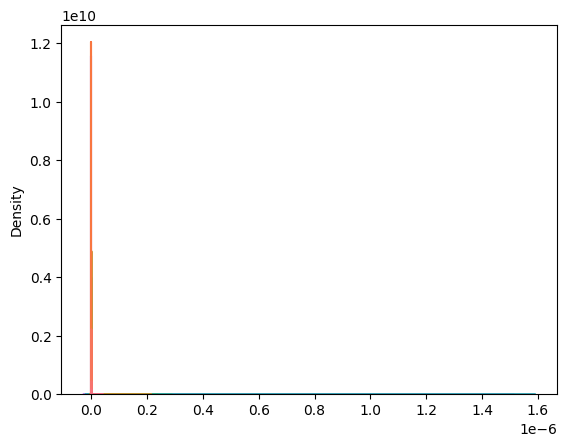

In [111]:
sns.kdeplot(df.drop(["Class"],axis=1),legend=False)

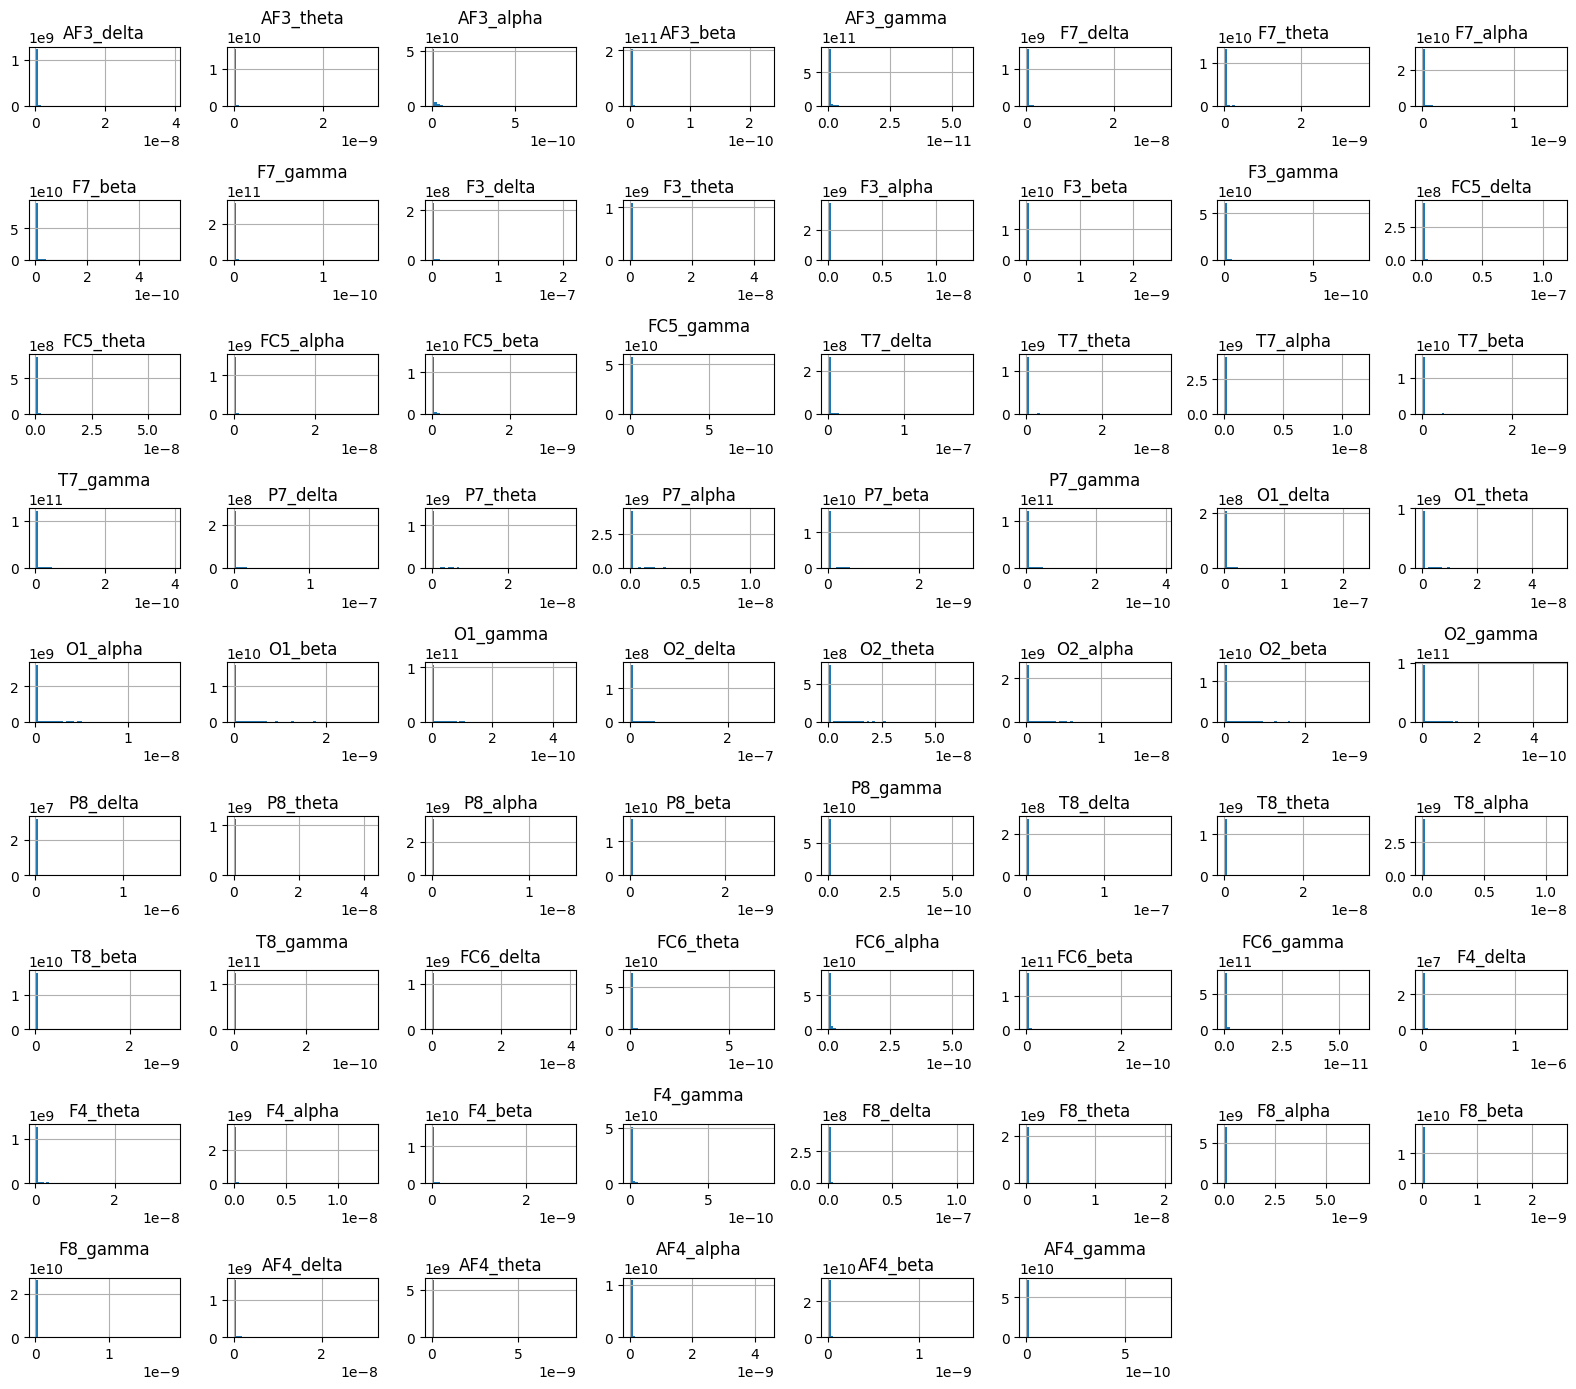

In [112]:
df.hist(bins=50, density=True, figsize=(16, 14))
plt.tight_layout()
plt.show()

**Data Transformation**

Data Transformation -https://medium.com/@vinodkumargr/09-data-transformations-in-ml-different-transformations-in-machine-learning-log-transformer-d794d61d143d

https://www.geeksforgeeks.org/machine-learning/feature-transformation-techniques-in-machine-learning/

Try using Function Transformer:

    1.Log Transform
    2.Square Transform
    3.Square Root Transform
    4.Reciprocal Transform

In [113]:
# Log Transform
log_transformer = FunctionTransformer(np.log1p, validate=True)
df_log = log_transformer.fit_transform(df.drop("Class",axis=1))
df_log = pd.DataFrame(df_log, columns=df.drop("Class",axis=1).columns)
df_log.describe()

AF3_delta     AF3_theta     AF3_alpha      AF3_beta     AF3_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   1.584949e-10  3.108119e-11  1.444698e-11  2.719947e-12  5.595984e-13   
std    1.259073e-09  1.567605e-10  4.982294e-11  1.114813e-11  1.776281e-12   
min    2.175829e-13  4.036837e-14  2.989425e-14  4.909331e-14  4.137640e-14   
25%    3.557903e-12  6.207792e-13  7.973496e-13  2.280947e-13  1.441803e-13   
50%    8.389897e-12  1.463278e-12  2.321698e-12  4.729014e-13  2.439104e-13   
75%    3.025112e-11  3.818233e-12  7.987016e-12  1.057731e-12  4.267787e-13   
max    3.935815e-08  3.069549e-09  8.269376e-10  2.298132e-10  5.550941e-11   

           F7_delta      F7_theta      F7_alpha       F7_beta      F7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   1.673400e-10  2.455631e-11  1.084416e-11  2.740199e-12  9.151773e-13   
std    1.076551e-09  1.271924e-10  4.474473e-11  1.435863e-11  4.865531e-12   
min    1.677623e-13  4.580646e-14  3.477908e-14  6.794699e-14  4.301239e-14   
25%    4.348339e-12  6.516099e-13  8.252543e-13  2.837932e-13  1.956725e-13   
50%    1.263803e-11  1.307522e-12  1.919794e-12  5.205683e-13  3.227805e-13   
75%    5.358377e-11  3.302861e-12  5.360801e-12  1.005293e-12  6.840579e-13   
max    3.142027e-08  3.572802e-09  1.504413e-09  5.324105e-10  1.544439e-10   

           F3_delta      F3_theta      F3_alpha       F3_beta      F3_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   9.388051e-10  3.950115e-10  1.266218e-10  3.181611e-11  4.801455e-12   
std    6.271714e-09  2.395956e-09  6.798354e-10  1.729334e-10  3.320715e-11   
min    1.986921e-13  5.796365e-14  5.072770e-14  4.805997e-14  2.846771e-14   
25%    4.090110e-12  7.418315e-13  1.043464e-12  2.823597e-13  1.564214e-13   
50%    1.044462e-11  1.494049e-12  2.514092e-12  5.089569e-13  2.550810e-13   
75%    5.111421e-11  4.817539e-12  9.047346e-12  1.254378e-12  5.575502e-13   
max    2.089361e-07  4.447243e-08  1.268553e-08  2.569840e-09  7.765661e-10   

          FC5_delta     FC5_theta     FC5_alpha      FC5_beta     FC5_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   3.736330e-10  8.791859e-11  3.704482e-11  7.889986e-12  2.021149e-12   
std    3.733342e-09  1.242530e-09  6.705009e-10  7.545641e-11  1.864567e-11   
min    2.059234e-13  3.255454e-14  3.798638e-14  5.798166e-14  3.581942e-14   
25%    3.250620e-12  4.507584e-13  5.318040e-13  2.115738e-13  1.546575e-13   
50%    9.052226e-12  8.619453e-13  1.274329e-12  3.976685e-13  2.661746e-13   
75%    4.497908e-11  2.863488e-12  3.237152e-12  1.807812e-12  1.207615e-12   
max    1.145551e-07  6.116601e-08  3.373105e-08  3.532271e-09  8.670284e-10   

           T7_delta      T7_theta      T7_alpha       T7_beta      T7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   7.130340e-10  3.177469e-10  1.067782e-10  2.779343e-11  3.099317e-12   
std    5.357339e-09  1.983447e-09  6.184403e-10  1.655859e-10  1.656025e-11   
min    4.074054e-13  8.768140e-14  1.540543e-13  1.179532e-13  6.216827e-14   
25%    3.214510e-12  7.758559e-13  8.374527e-13  4.290248e-13  2.721844e-13   
50%    7.338123e-12  1.278790e-12  1.637183e-12  6.739768e-13  4.425641e-13   
75%    3.065464e-11  2.766842e-12  3.775610e-12  1.125641e-12  9.082873e-13   
max    1.814019e-07  3.622301e-08  1.163898e-08  3.059305e-09  3.942508e-10   

           P7_delta      P7_theta      P7_alpha       P7_beta      P7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   7.095957e-10  3.161152e-10  1.067278e-10  2.727685e-11  2.947654e-12   
std    5.354308e-09  1.973606e-09  6.114620e-10  1.634826e-10  1.631658e-11   
min    2.168043e-13  5.588364e-14  6.057598e-14  7.894651e-14  5.111086e-14   
25%    2.750301e-12  6.372320e-13  7.730568e-13  3.5453

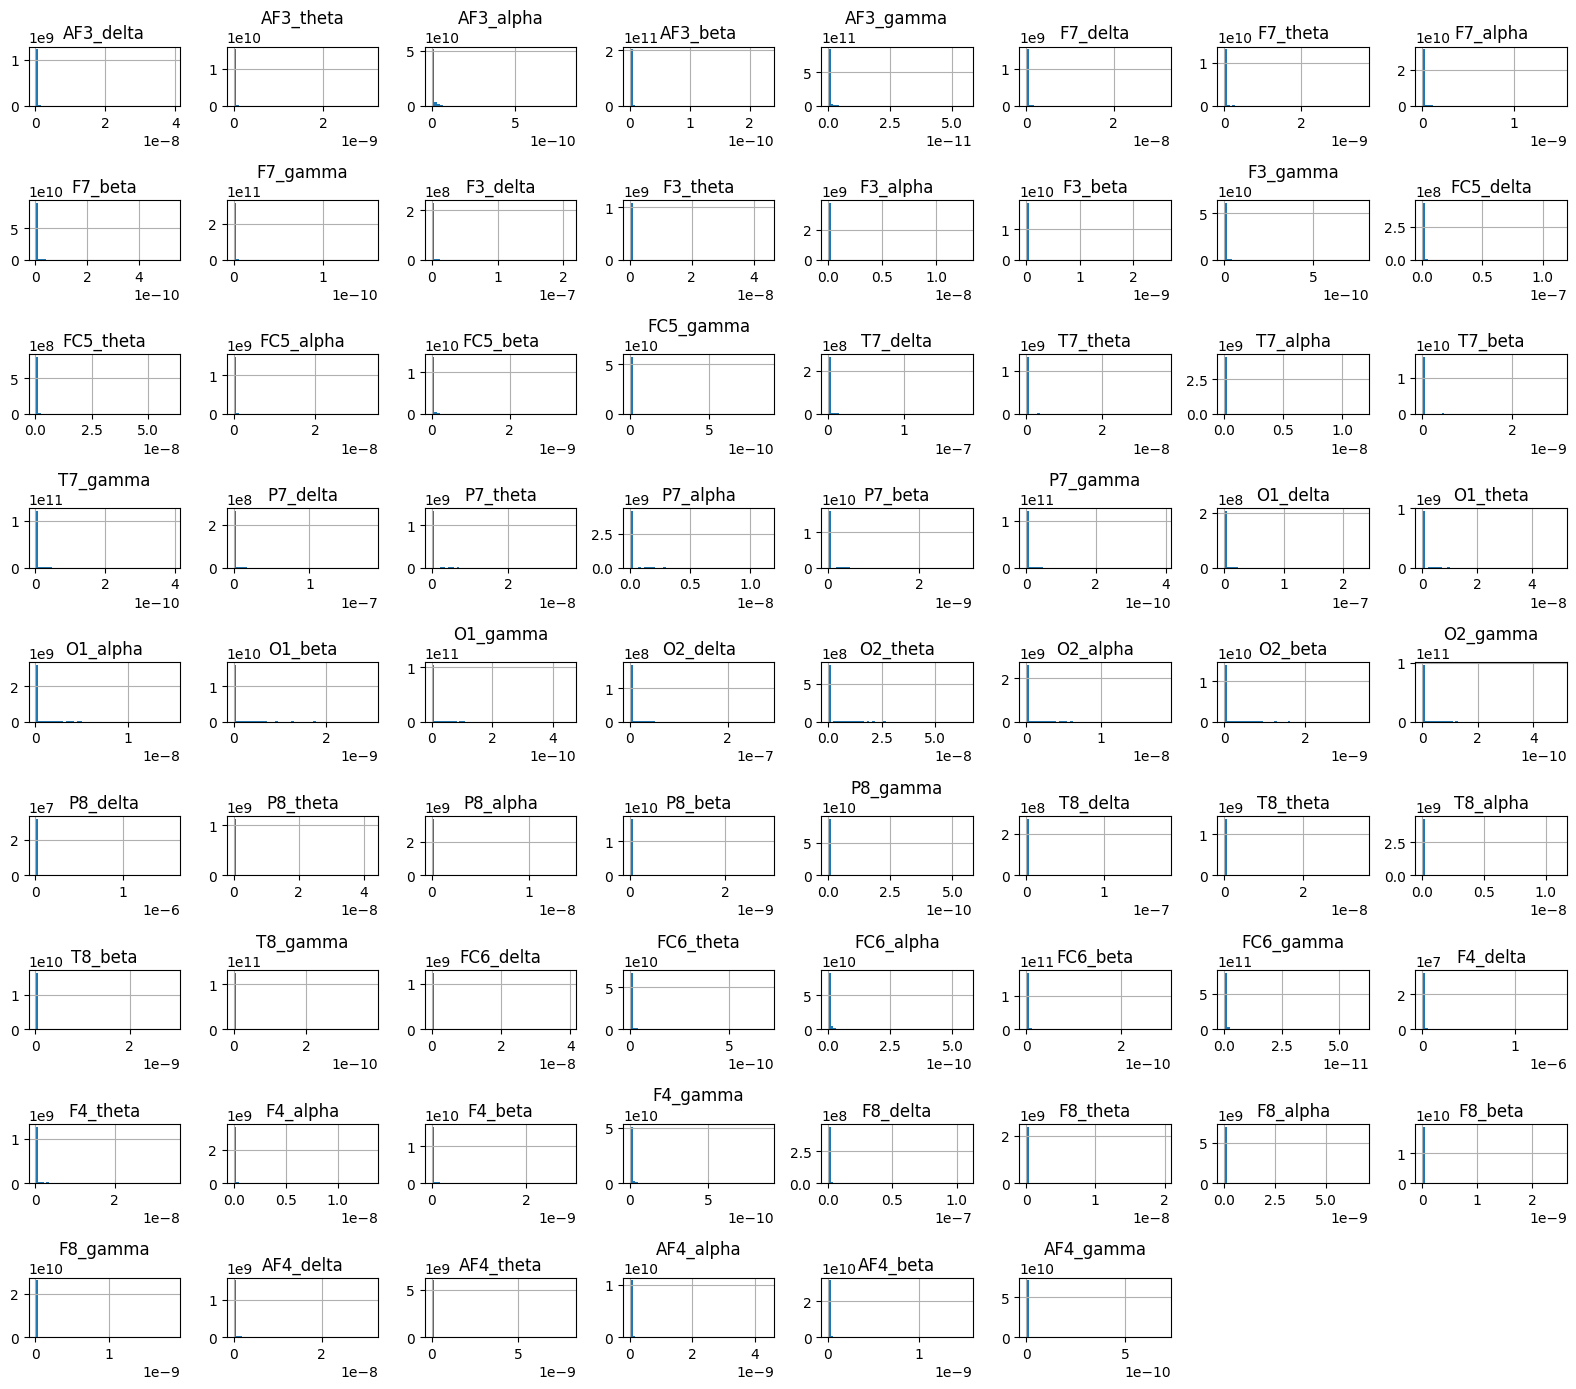

In [114]:
df_log.hist(bins=50, density=True, figsize=(16, 14))
plt.tight_layout()
plt.show()

In [115]:
#Square Transform
reciprocal_transformer = FunctionTransformer(lambda x: 1 / x, validate=True)
df_reciprocal = reciprocal_transformer.fit_transform(df.drop("Class",axis=1))
df_reciprocal = pd.DataFrame(df_reciprocal, columns=df.drop("Class",axis=1).columns)
df_reciprocal.describe()

AF3_delta     AF3_theta     AF3_alpha      AF3_beta     AF3_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   2.357325e+11  1.320649e+12  1.241590e+12  3.030638e+12  5.031276e+12   
std    3.638354e+11  1.948943e+12  2.343093e+12  2.807796e+12  3.733167e+12   
min    2.540769e+07  3.257807e+08  1.209281e+09  4.351361e+09  1.801496e+10   
25%    3.305663e+10  2.619012e+11  1.252032e+11  9.454203e+11  2.343135e+12   
50%    1.191910e+11  6.833971e+11  4.307193e+11  2.114606e+12  4.099866e+12   
75%    2.810644e+11  1.610879e+12  1.254155e+12  4.384145e+12  6.935759e+12   
max    4.595949e+12  2.477187e+13  3.345125e+13  2.036937e+13  2.416836e+13   

           F7_delta      F7_theta      F7_alpha       F7_beta      F7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   2.003953e+11  1.188606e+12  1.033578e+12  2.566594e+12  3.763649e+12   
std    3.581555e+11  1.434114e+12  1.624160e+12  2.213425e+12  3.002240e+12   
min    3.182659e+07  2.798924e+08  6.647112e+08  1.878250e+09  6.474843e+09   
25%    1.866237e+10  3.027678e+11  1.865393e+11  9.947351e+11  1.461864e+12   
50%    7.912625e+10  7.648053e+11  5.208893e+11  1.920978e+12  3.098080e+12   
75%    2.299729e+11  1.534660e+12  1.211748e+12  3.523692e+12  5.110581e+12   
max    5.960813e+12  2.183098e+13  2.875292e+13  1.471736e+13  2.324911e+13   

           F3_delta      F3_theta      F3_alpha       F3_beta      F3_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   1.953618e+11  1.045127e+12  7.936436e+11  2.542026e+12  4.565163e+12   
std    3.118514e+11  1.344945e+12  1.217540e+12  2.379201e+12  3.721245e+12   
min    4.786153e+06  2.248584e+07  7.882999e+07  3.891292e+08  1.287720e+09   
25%    1.956403e+10  2.075749e+11  1.105297e+11  7.972078e+11  1.793561e+12   
50%    9.574306e+10  6.693219e+11  3.977578e+11  1.964803e+12  3.920323e+12   
75%    2.444922e+11  1.348015e+12  9.583464e+11  3.541581e+12  6.392989e+12   
max    5.032912e+12  1.725219e+13  1.971310e+13  2.080734e+13  3.512751e+13   

          FC5_delta     FC5_theta     FC5_alpha      FC5_beta     FC5_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   2.355031e+11  1.628055e+12  1.526863e+12  3.064063e+12  4.385933e+12   
std    3.606491e+11  1.844729e+12  2.109571e+12  2.849637e+12  3.905002e+12   
min    8.729424e+06  1.634895e+07  2.964627e+07  2.831040e+08  1.153365e+09   
25%    2.223256e+10  3.492245e+11  3.089136e+11  5.531548e+11  8.280785e+11   
50%    1.104701e+11  1.160166e+12  7.847268e+11  2.514657e+12  3.756933e+12   
75%    3.076337e+11  2.218483e+12  1.880392e+12  4.726482e+12  6.465899e+12   
max    4.856174e+12  3.071768e+13  2.632523e+13  1.724683e+13  2.791782e+13   

           T7_delta      T7_theta      T7_alpha       T7_beta      T7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   2.206321e+11  9.461537e+11  8.638402e+11  1.699650e+12  2.632743e+12   
std    2.698031e+11  8.649880e+11  8.616954e+11  1.156865e+12  1.984503e+12   
min    5.512621e+06  2.760676e+07  8.591820e+07  3.268717e+08  2.536457e+09   
25%    3.262149e+10  3.614229e+11  2.648579e+11  8.883826e+11  1.100973e+12   
50%    1.362746e+11  7.819891e+11  6.108053e+11  1.483731e+12  2.259559e+12   
75%    3.110894e+11  1.288899e+12  1.194097e+12  2.330868e+12  3.673980e+12   
max    2.454558e+12  1.140493e+13  6.491219e+12  8.477942e+12  1.608538e+13   

           P7_delta      P7_theta      P7_alpha       P7_beta      P7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   2.873800e+11  1.211929e+12  9.700847e+11  2.090153e+12  3.322196e+12   
std    4.094313e+11  1.259314e+12  1.319271e+12  1.506946e+12  2.580891e+12   
min    5.505635e+06  2.784095e+07  8.732509e+07  3.323207e+08  2.532150e+09   
25%    3.638553e+10  4.381556e+11  1.957251e+11  1.0399

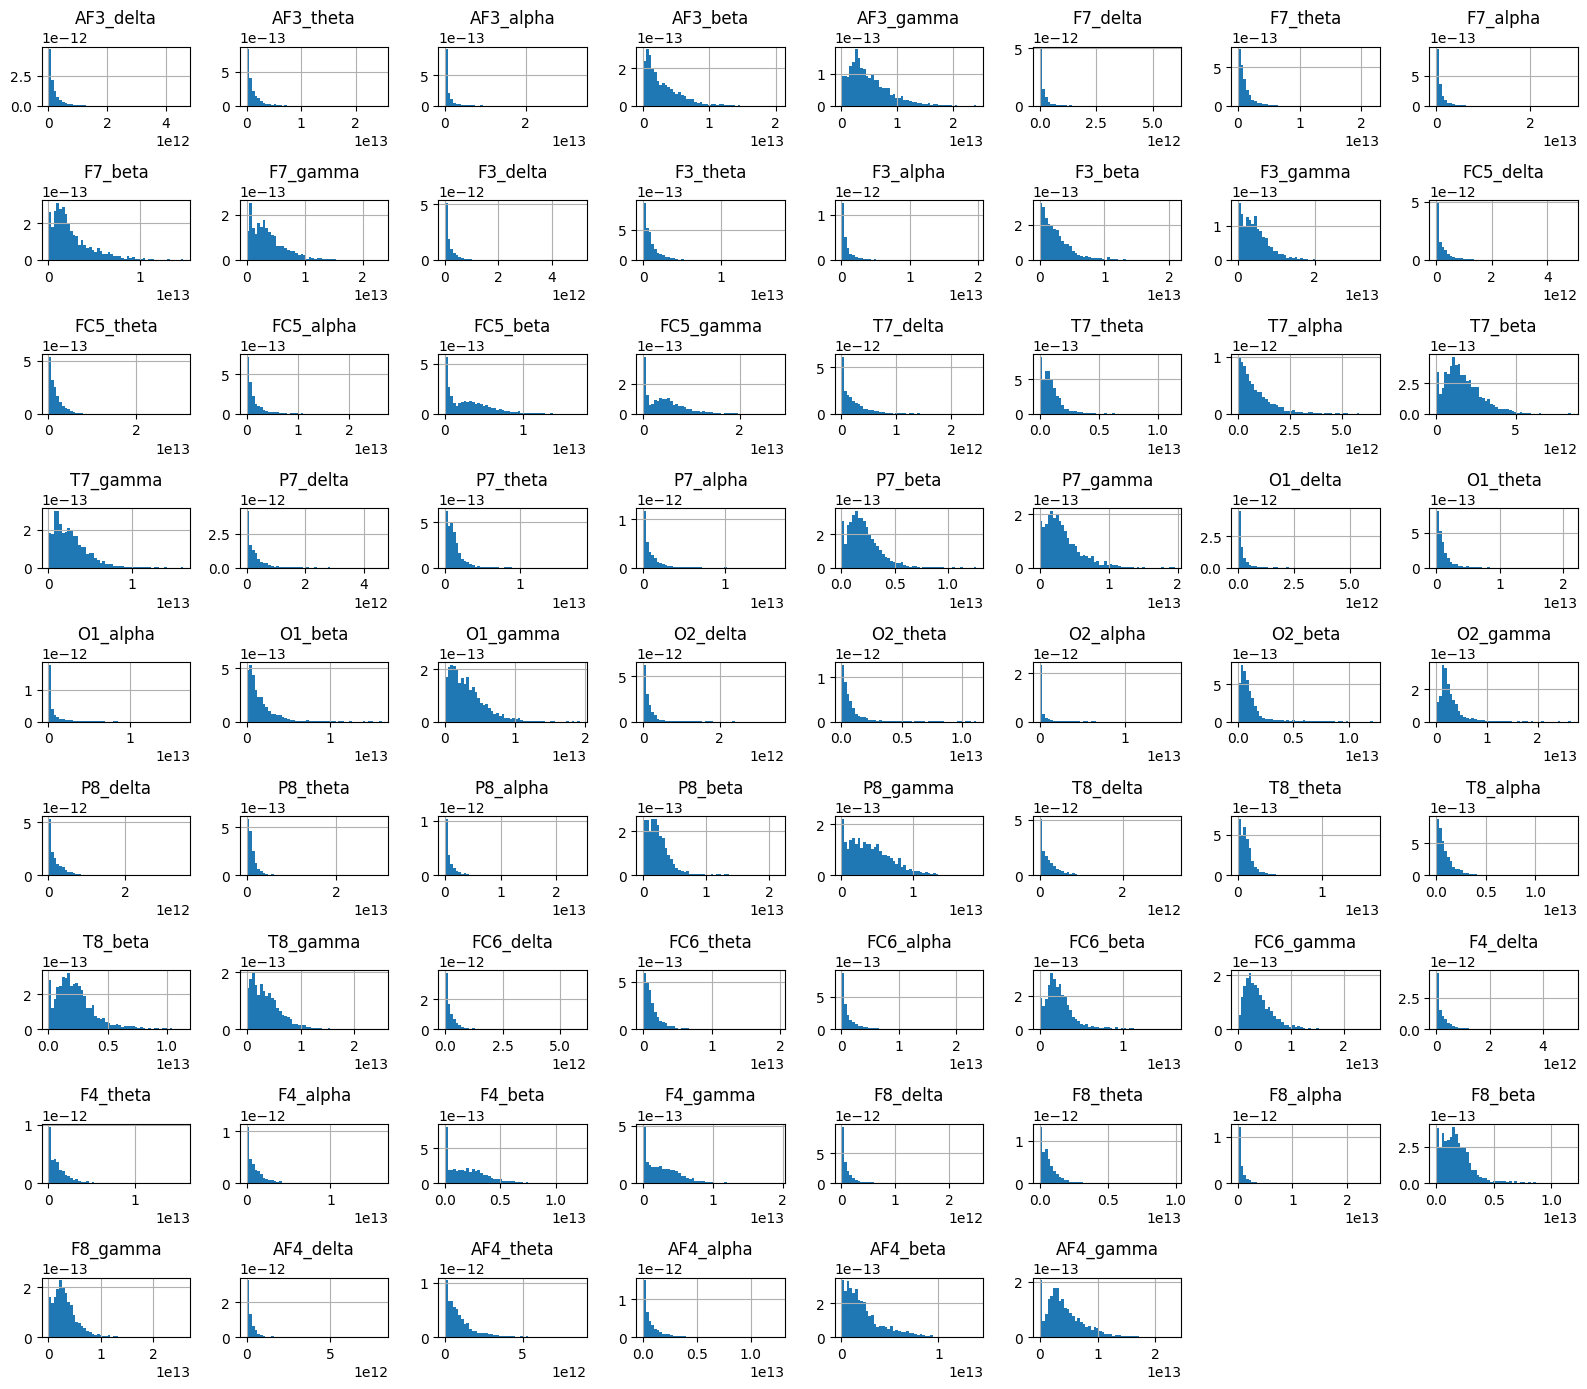

In [116]:
df_reciprocal.hist(bins=50, density=True, figsize=(16, 14))
plt.tight_layout()
plt.show()

In [117]:
#Square Root Transform
sqrt_transformer = FunctionTransformer(np.sqrt, validate=True)

df_sqrt_transformer = sqrt_transformer.fit_transform(df.drop("Class",axis=1))
df_sqrt_transformer = pd.DataFrame(df_sqrt_transformer, columns=df.drop("Class",axis=1).columns)
df_sqrt_transformer.describe()

AF3_delta     AF3_theta     AF3_alpha      AF3_beta     AF3_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   6.191044e-06  2.573121e-06  2.457060e-06  1.031842e-06  6.042874e-07   
std    1.096411e-05  4.946671e-06  2.900524e-06  1.286810e-06  4.410319e-07   
min    4.664578e-07  2.009188e-07  1.728995e-07  2.215701e-07  2.034119e-07   
25%    1.886240e-06  7.878954e-07  8.929444e-07  4.775926e-07  3.797108e-07   
50%    2.896532e-06  1.209660e-06  1.523712e-06  6.876783e-07  4.938729e-07   
75%    5.500102e-06  1.954030e-06  2.826131e-06  1.028460e-06  6.532830e-07   
max    1.983889e-04  5.540351e-05  2.875652e-05  1.515959e-05  7.450464e-06   

           F7_delta      F7_theta      F7_alpha       F7_beta      F7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   6.995884e-06  2.420678e-06  2.142747e-06  1.044667e-06  7.314870e-07   
std    1.088314e-05  4.324784e-06  2.501036e-06  1.284328e-06  6.166432e-07   
min    4.095880e-07  2.140244e-07  1.864915e-07  2.606664e-07  2.073943e-07   
25%    2.085267e-06  8.072236e-07  9.084351e-07  5.327225e-07  4.423488e-07   
50%    3.555001e-06  1.143469e-06  1.385566e-06  7.215042e-07  5.681378e-07   
75%    7.320094e-06  1.817378e-06  2.315340e-06  1.002643e-06  8.270779e-07   
max    1.772576e-04  5.977292e-05  3.878676e-05  2.307402e-05  1.242755e-05   

           F3_delta      F3_theta      F3_alpha       F3_beta      F3_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   1.137598e-05  5.838973e-06  4.315559e-06  2.035422e-06  1.007369e-06   
std    2.845524e-05  1.900146e-05  1.039418e-05  5.261531e-06  1.946306e-06   
min    4.457490e-07  2.407564e-07  2.252281e-07  2.192259e-07  1.687238e-07   
25%    2.022402e-06  8.612964e-07  1.021501e-06  5.313753e-07  3.955014e-07   
50%    3.231814e-06  1.222313e-06  1.585589e-06  7.134122e-07  5.050554e-07   
75%    7.149420e-06  2.194889e-06  3.007881e-06  1.119990e-06  7.466928e-07   
max    4.570953e-04  2.108849e-04  1.126300e-04  5.069359e-05  2.786694e-05   

          FC5_delta     FC5_theta     FC5_alpha      FC5_beta     FC5_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   7.889197e-06  3.086919e-06  2.320867e-06  1.368731e-06  8.941260e-07   
std    1.764971e-05  8.855473e-06  5.627651e-06  2.453336e-06  1.105511e-06   
min    4.537879e-07  1.804288e-07  1.949009e-07  2.407938e-07  1.892602e-07   
25%    1.802947e-06  6.713854e-07  7.292489e-07  4.599716e-07  3.932652e-07   
50%    3.008692e-06  9.284101e-07  1.128862e-06  6.306096e-07  5.159211e-07   
75%    6.706644e-06  1.692184e-06  1.799209e-06  1.344549e-06  1.098915e-06   
max    3.384599e-04  2.473176e-04  1.836602e-04  5.943291e-05  2.944535e-05   

           T7_delta      T7_theta      T7_alpha       T7_beta      T7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   9.431395e-06  4.974243e-06  3.475900e-06  1.878694e-06  1.013783e-06   
std    2.498641e-05  1.712062e-05  9.733057e-06  4.926783e-06  1.439566e-06   
min    6.382832e-07  2.961105e-07  3.924975e-07  3.434431e-07  2.493357e-07   
25%    1.792905e-06  8.808268e-07  9.151244e-07  6.549998e-07  5.217129e-07   
50%    2.708897e-06  1.130836e-06  1.279525e-06  8.209609e-07  6.652549e-07   
75%    5.536664e-06  1.663383e-06  1.943093e-06  1.060962e-06  9.530411e-07   
max    4.259130e-04  1.903234e-04  1.078841e-04  5.531098e-05  1.985575e-05   

           P7_delta      P7_theta      P7_alpha       P7_beta      P7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   9.214795e-06  4.876238e-06  3.634444e-06  1.801140e-06  9.428455e-07   
std    2.499843e-05  1.710114e-05  9.672345e-06  4.903254e-06  1.435089e-06   
min    4.656225e-07  2.363972e-07  2.461219e-07  2.809742e-07  2.260771e-07   
25%    1.658403e-06  7.982681e-07  8.792365e-07  5.9542

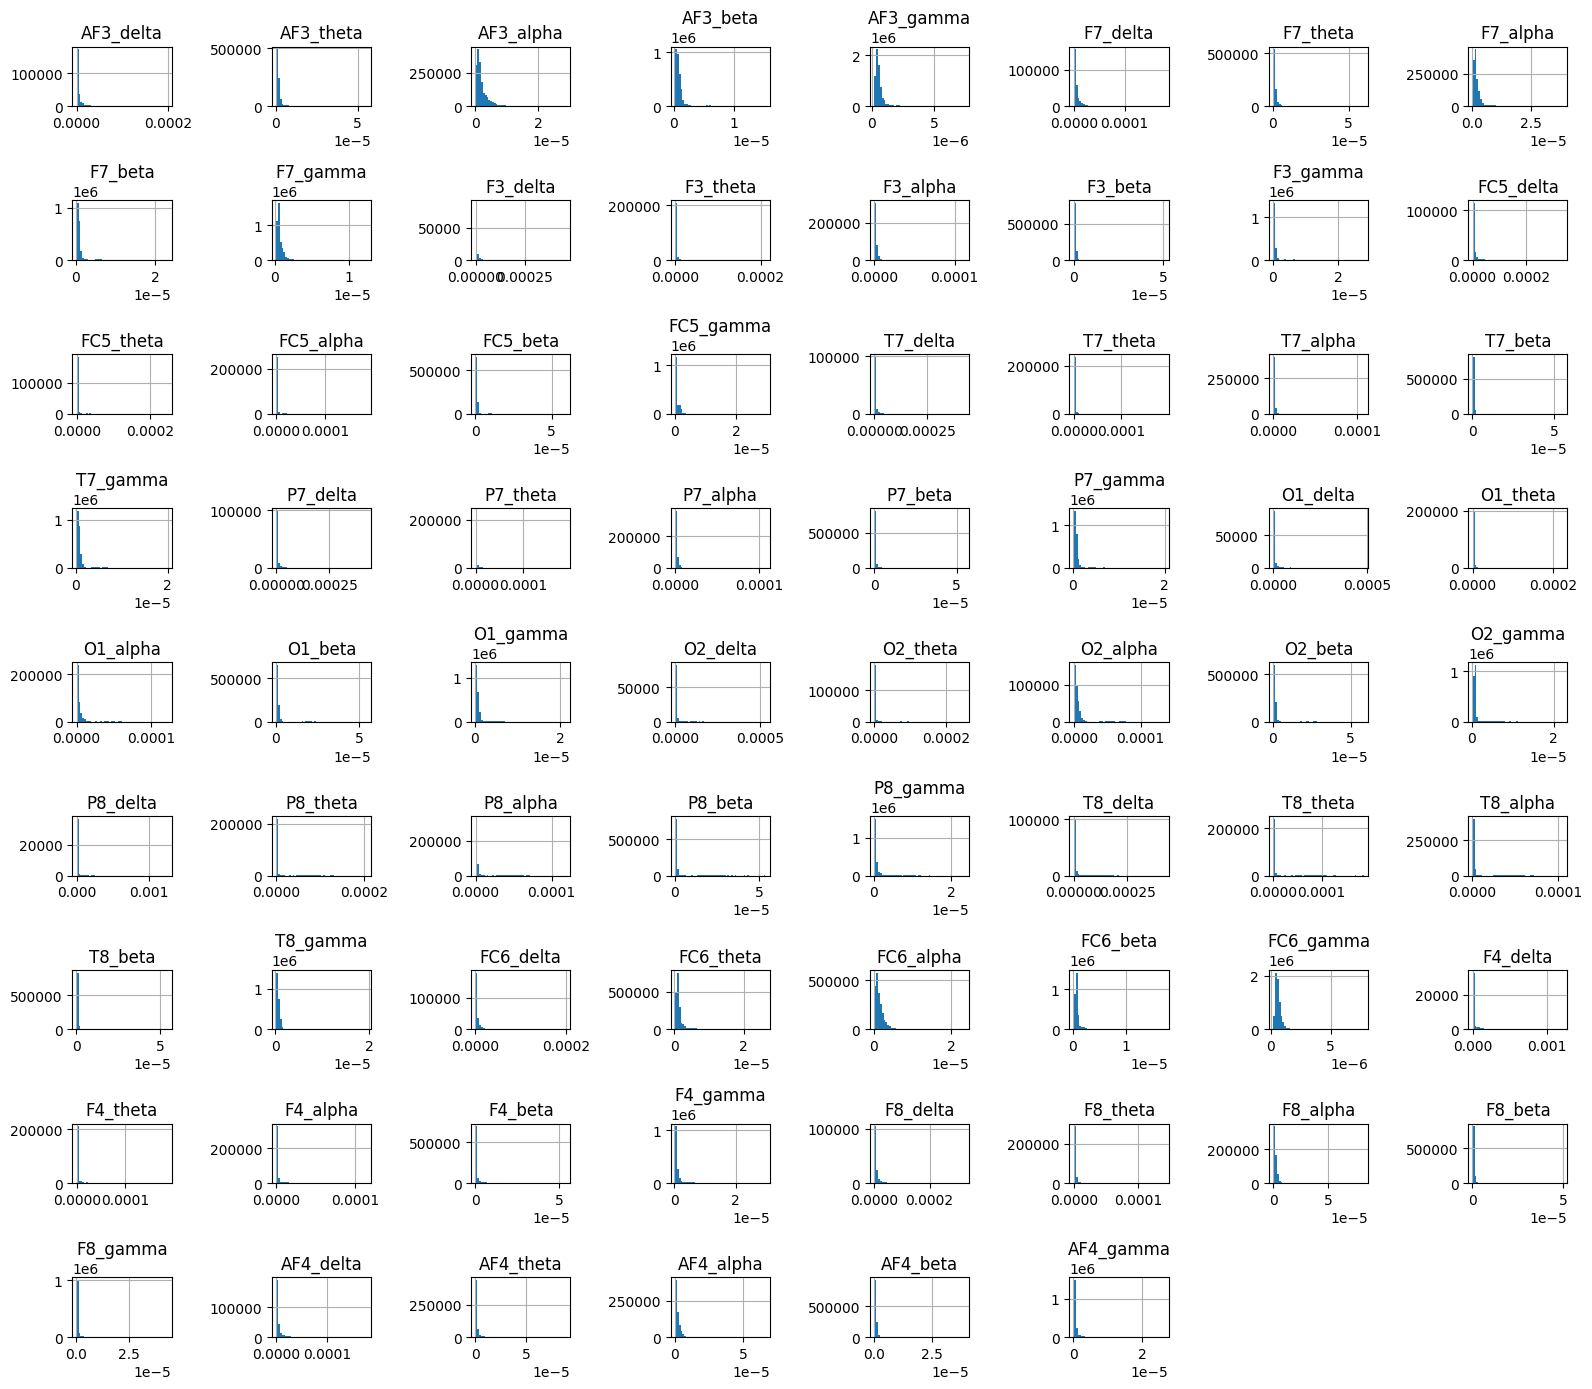

In [118]:
df_sqrt_transformer.hist(bins=50, density=True, figsize=(16, 14))
plt.tight_layout()
plt.show()

**Power Transfomers**

    1.Box-Cox Transform
    2.Yeo Johnson Transform

In [119]:
boxcox = PowerTransformer(method='box-cox')
df_boxcox = boxcox.fit_transform(df.drop("Class",axis=1))
df_boxcox = pd.DataFrame(df_boxcox, columns=df.drop("Class",axis=1).columns)
df_boxcox.describe()

AF3_delta     AF3_theta     AF3_alpha      AF3_beta     AF3_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   1.840644e-16  5.657274e-16 -1.172057e-15 -4.209120e-16  8.661854e-17   
std    1.000191e+00  1.000191e+00  1.000191e+00  1.000191e+00  1.000191e+00   
min   -3.406542e+00 -3.727900e+00 -3.099601e+00 -3.059997e+00 -3.043769e+00   
25%   -6.595814e-01 -6.416836e-01 -6.763414e-01 -7.288988e-01 -6.889021e-01   
50%   -6.913818e-02 -1.600991e-03 -1.360278e-02  3.214357e-02  2.027016e-02   
75%    6.525859e-01  5.833908e-01  6.860962e-01  6.880854e-01  6.378509e-01   
max    2.602387e+00  2.485419e+00  2.781399e+00  2.506613e+00  2.880513e+00   

           F7_delta      F7_theta      F7_alpha       F7_beta      F7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   1.400784e-16  2.436147e-17  2.923376e-16 -2.436147e-17  2.165464e-17   
std    1.000191e+00  1.000191e+00  1.000191e+00  1.000191e+00  1.000191e+00   
min   -3.438253e+00 -4.364010e+00 -3.891235e+00 -3.053107e+00 -3.315846e+00   
25%   -7.023949e-01 -6.302673e-01 -6.543481e-01 -6.622451e-01 -6.647150e-01   
50%   -3.889063e-02 -3.681491e-02 -1.868557e-02  3.254551e-02 -4.322356e-02   
75%    7.189384e-01  5.901895e-01  6.545689e-01  6.318788e-01  7.158392e-01   
max    2.742509e+00  2.377693e+00  2.973945e+00  2.625194e+00  2.956673e+00   

           F3_delta      F3_theta      F3_alpha       F3_beta      F3_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   2.490283e-16 -8.797196e-17 -1.772973e-16 -1.373716e-16 -3.315866e-16   
std    1.000191e+00  1.000191e+00  1.000191e+00  1.000191e+00  1.000191e+00   
min   -3.721580e+00 -3.925408e+00 -3.938445e+00 -3.581265e+00 -4.053168e+00   
25%   -6.919703e-01 -6.349392e-01 -6.524514e-01 -6.626539e-01 -6.648435e-01   
50%   -8.666316e-02 -8.251456e-02 -3.525537e-02 -5.340173e-02 -7.873488e-02   
75%    6.985156e-01  6.239460e-01  6.779364e-01  6.507340e-01  6.310261e-01   
max    2.312775e+00  2.247586e+00  2.449920e+00  2.274134e+00  2.279273e+00   

          FC5_delta     FC5_theta     FC5_alpha      FC5_beta     FC5_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean  -4.100847e-16  1.231607e-16  1.759439e-17  1.461688e-16 -3.139922e-16   
std    1.000191e+00  1.000191e+00  1.000191e+00  1.000191e+00  1.000191e+00   
min   -3.316564e+00 -4.570053e+00 -3.685612e+00 -2.513794e+00 -2.890363e+00   
25%   -7.318211e-01 -6.616148e-01 -6.406902e-01 -7.799414e-01 -7.347185e-01   
50%   -7.099817e-02 -1.047588e-01  2.930495e-02 -1.711114e-01 -1.740779e-01   
75%    7.348975e-01  6.668840e-01  6.126123e-01  8.582880e-01  9.316020e-01   
max    2.475985e+00  2.254597e+00  2.798065e+00  2.294873e+00  2.376476e+00   

           T7_delta      T7_theta      T7_alpha       T7_beta      T7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   1.136868e-16 -2.151929e-16  2.706829e-16 -1.028595e-16  2.368476e-16   
std    1.000191e+00  1.000191e+00  1.000191e+00  1.000191e+00  1.000191e+00   
min   -3.053044e+00 -4.754875e+00 -3.233578e+00 -3.684917e+00 -3.772062e+00   
25%   -7.213582e-01 -6.292593e-01 -6.658644e-01 -6.546298e-01 -6.802569e-01   
50%   -9.775011e-02 -9.505396e-02 -1.731417e-04  2.962644e-03 -3.313154e-02   
75%    7.019944e-01  5.448463e-01  6.390787e-01  5.820998e-01  7.005077e-01   
max    2.235559e+00  2.258135e+00  2.417269e+00  2.413827e+00  2.515101e+00   

           P7_delta      P7_theta      P7_alpha       P7_beta      P7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean  -2.382010e-16  6.090366e-18 -1.894781e-17 -2.124861e-16 -8.932537e-17   
std    1.000191e+00  1.000191e+00  1.000191e+00  1.000191e+00  1.000191e+00   
min   -3.336708e+00 -4.755381e+00 -3.828224e+00 -4.062869e+00 -3.558044e+00   
25%   -6.668287e-01 -5.865713e-01 -6.915091e-01 -6.2432

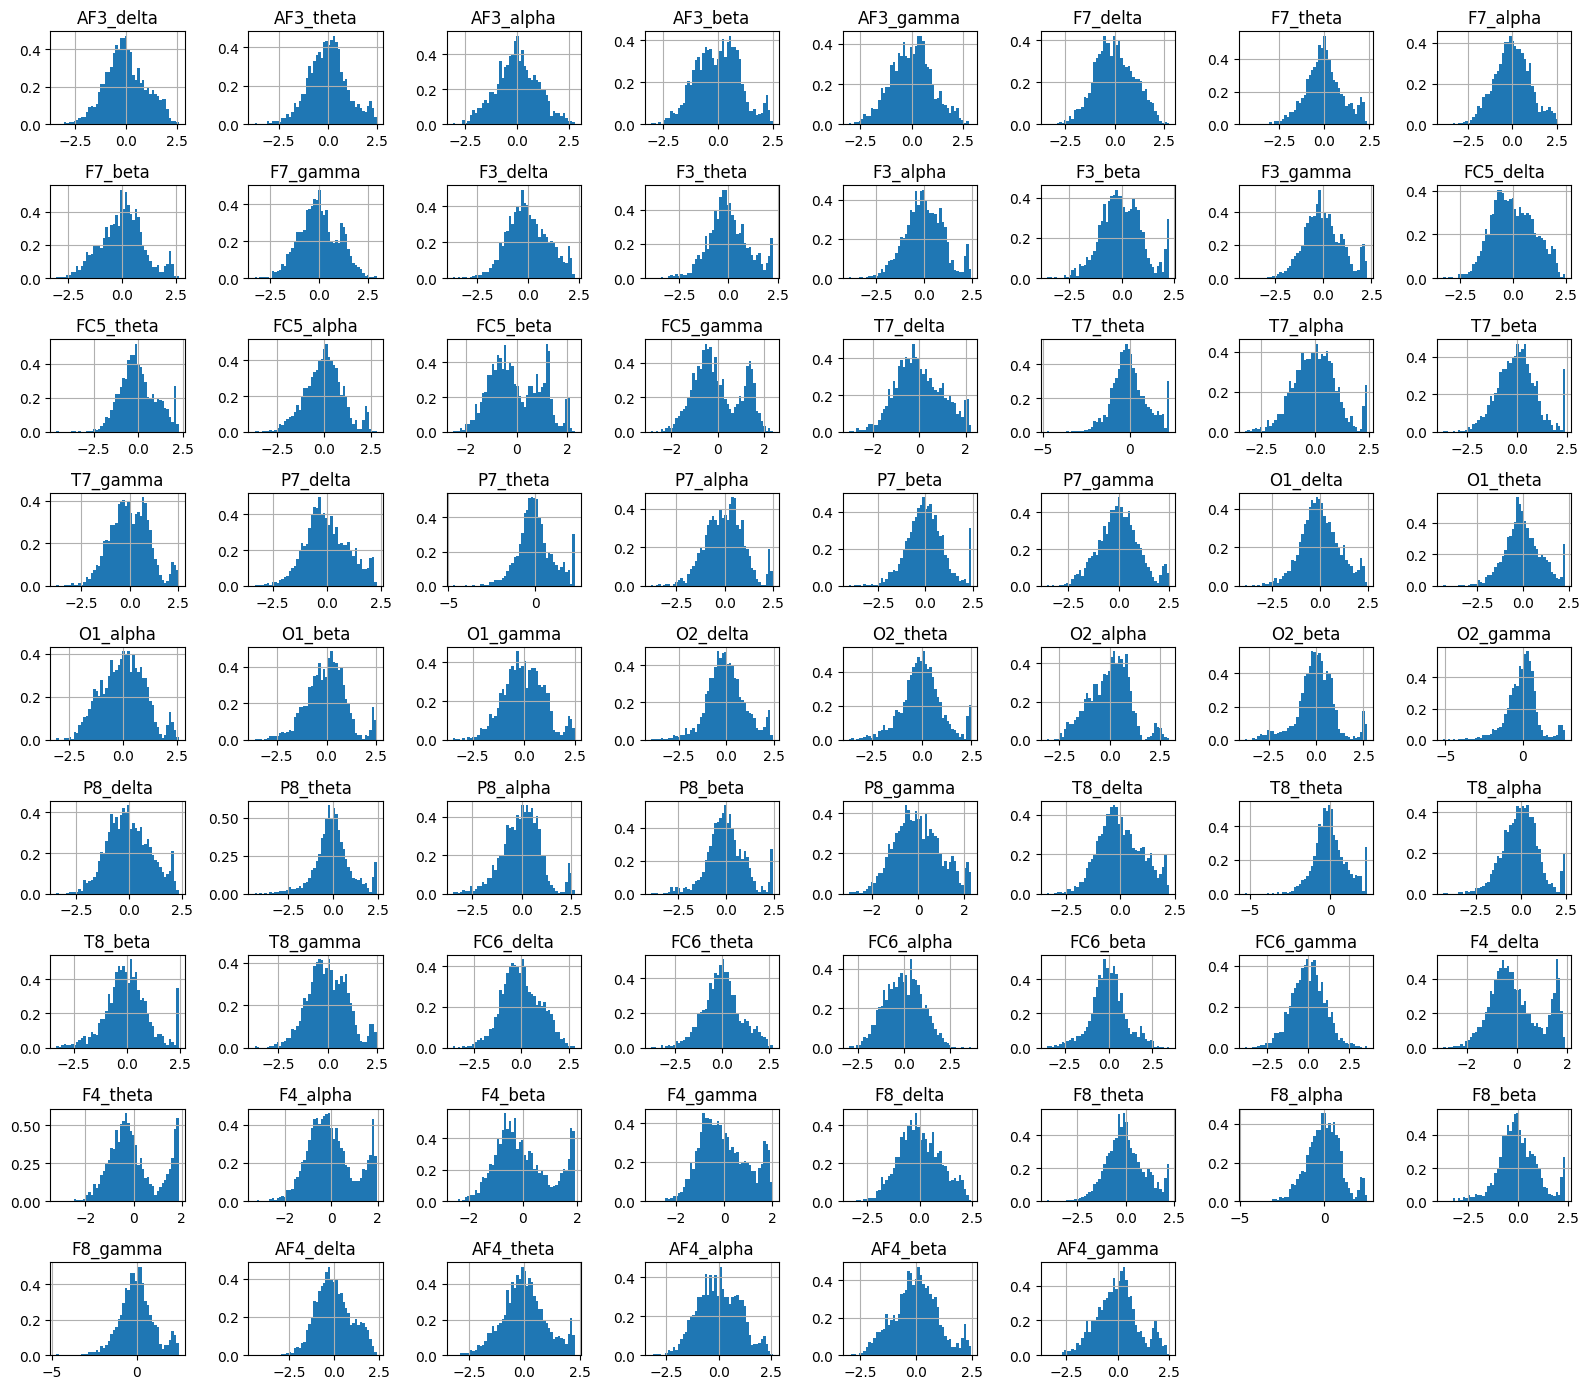

In [120]:
df_boxcox.hist(bins=50, density=True, figsize=(16, 14))
plt.tight_layout()
plt.show()

In [121]:
yeo_john = PowerTransformer()
df_yeo_john = yeo_john.fit_transform(df.drop("Class",axis=1))
df_yeo_john = pd.DataFrame(df_yeo_john, columns=df.drop("Class",axis=1).columns)
df_yeo_john.describe()

AF3_delta     AF3_theta     AF3_alpha      AF3_beta     AF3_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   8.120488e-18 -5.413659e-18  7.037757e-17  3.789561e-17 -1.082732e-16   
std    1.000191e+00  1.000191e+00  1.000191e+00  1.000191e+00  1.000191e+00   
min   -3.266800e-01 -3.366029e-01 -6.340209e-01 -4.762751e-01 -7.193337e-01   
25%   -3.139312e-01 -3.194711e-01 -5.631992e-01 -4.068962e-01 -5.131705e-01   
50%   -2.955202e-01 -2.947023e-01 -4.257538e-01 -3.134121e-01 -3.192785e-01   
75%   -2.126998e-01 -2.260651e-01  4.931550e-02 -9.682797e-02  2.167364e-02   
max    8.616723e+00  5.062058e+00  3.941811e+00  4.858656e+00  6.006742e+00   

           F7_delta      F7_theta      F7_alpha       F7_beta      F7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   6.225708e-17 -1.353415e-18  4.060244e-18  2.030122e-17 -8.661854e-17   
std    1.000191e+00  1.000191e+00  1.000191e+00  1.000191e+00  1.000191e+00   
min   -3.882456e-01 -3.309805e-01 -4.712349e-01 -3.732617e-01 -6.212441e-01   
25%   -3.708514e-01 -3.141953e-01 -4.154867e-01 -3.237585e-01 -4.641612e-01   
50%   -3.364735e-01 -2.960802e-01 -3.391088e-01 -2.698543e-01 -3.351245e-01   
75%   -1.688898e-01 -2.413167e-01 -1.049682e-01 -1.607161e-01  2.167653e-02   
max    7.398236e+00  5.565208e+00  5.868730e+00  6.916537e+00  8.919136e+00   

           F3_delta      F3_theta      F3_alpha      F3_beta      F3_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2625.000000  2.625000e+03   
mean   5.278317e-17  1.218073e-17  1.894781e-17     0.000000 -1.421085e-17   
std    1.000191e+00  1.000191e+00  1.000191e+00     1.000191  1.000191e+00   
min   -2.579412e-01 -2.394869e-01 -2.767087e-01    -0.274624 -2.996156e-01   
25%   -2.557093e-01 -2.380338e-01 -2.696624e-01    -0.266867 -2.807693e-01   
50%   -2.520662e-01 -2.364358e-01 -2.592415e-01    -0.259386 -2.662449e-01   
75%   -2.287937e-01 -2.293817e-01 -2.131894e-01    -0.234842 -2.219831e-01   
max    6.872488e+00  5.382935e+00  5.083416e+00     4.787032  6.517570e+00   

          FC5_delta     FC5_theta     FC5_alpha      FC5_beta     FC5_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean  -8.120488e-18  2.706829e-17  1.488756e-17 -5.413659e-18 -7.849805e-17   
std    1.000191e+00  1.000191e+00  1.000191e+00  1.000191e+00  1.000191e+00   
min   -2.692496e-01 -2.089764e-01 -2.065522e-01 -2.658301e-01 -3.674759e-01   
25%   -2.645925e-01 -2.073171e-01 -2.017931e-01 -2.576362e-01 -3.347211e-01   
50%   -2.557239e-01 -2.056853e-01 -1.946394e-01 -2.477215e-01 -3.041124e-01   
75%   -2.009739e-01 -1.977458e-01 -1.757412e-01 -1.728651e-01 -4.820683e-02   
max    1.015752e+01  1.423299e+01  1.913545e+01  1.094459e+01  1.384493e+01   

           T7_delta      T7_theta      T7_alpha       T7_beta      T7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   2.842171e-17 -5.413659e-18 -8.120488e-18  6.767074e-18  2.436147e-17   
std    1.000191e+00  1.000191e+00  1.000191e+00  1.000191e+00  1.000191e+00   
min   -2.403248e-01 -2.230011e-01 -2.360494e-01 -2.377217e-01 -3.631013e-01   
25%   -2.383295e-01 -2.211991e-01 -2.306136e-01 -2.281122e-01 -3.062941e-01   
50%   -2.353993e-01 -2.198825e-01 -2.242609e-01 -2.205583e-01 -2.606079e-01   
75%   -2.188519e-01 -2.159884e-01 -2.073065e-01 -2.066551e-01 -1.373223e-01   
max    7.431848e+00  5.421095e+00  5.273930e+00  5.389265e+00  6.008525e+00   

           P7_delta      P7_theta      P7_alpha       P7_beta      P7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   4.060244e-18  2.165464e-17  2.977512e-17 -2.842171e-17  2.030122e-17   
std    1.000191e+00  1.000191e+00  1.000191e+00  1.000191e+00  1.000191e+00   
min   -2.387214e-01 -2.228046e-01 -2.456969e-01 -2.352385e-01 -3.387816e-01   
25%   -2.369192e-01 -2.212710e-01 -2.399345e-01 -2.265804e-01 -2

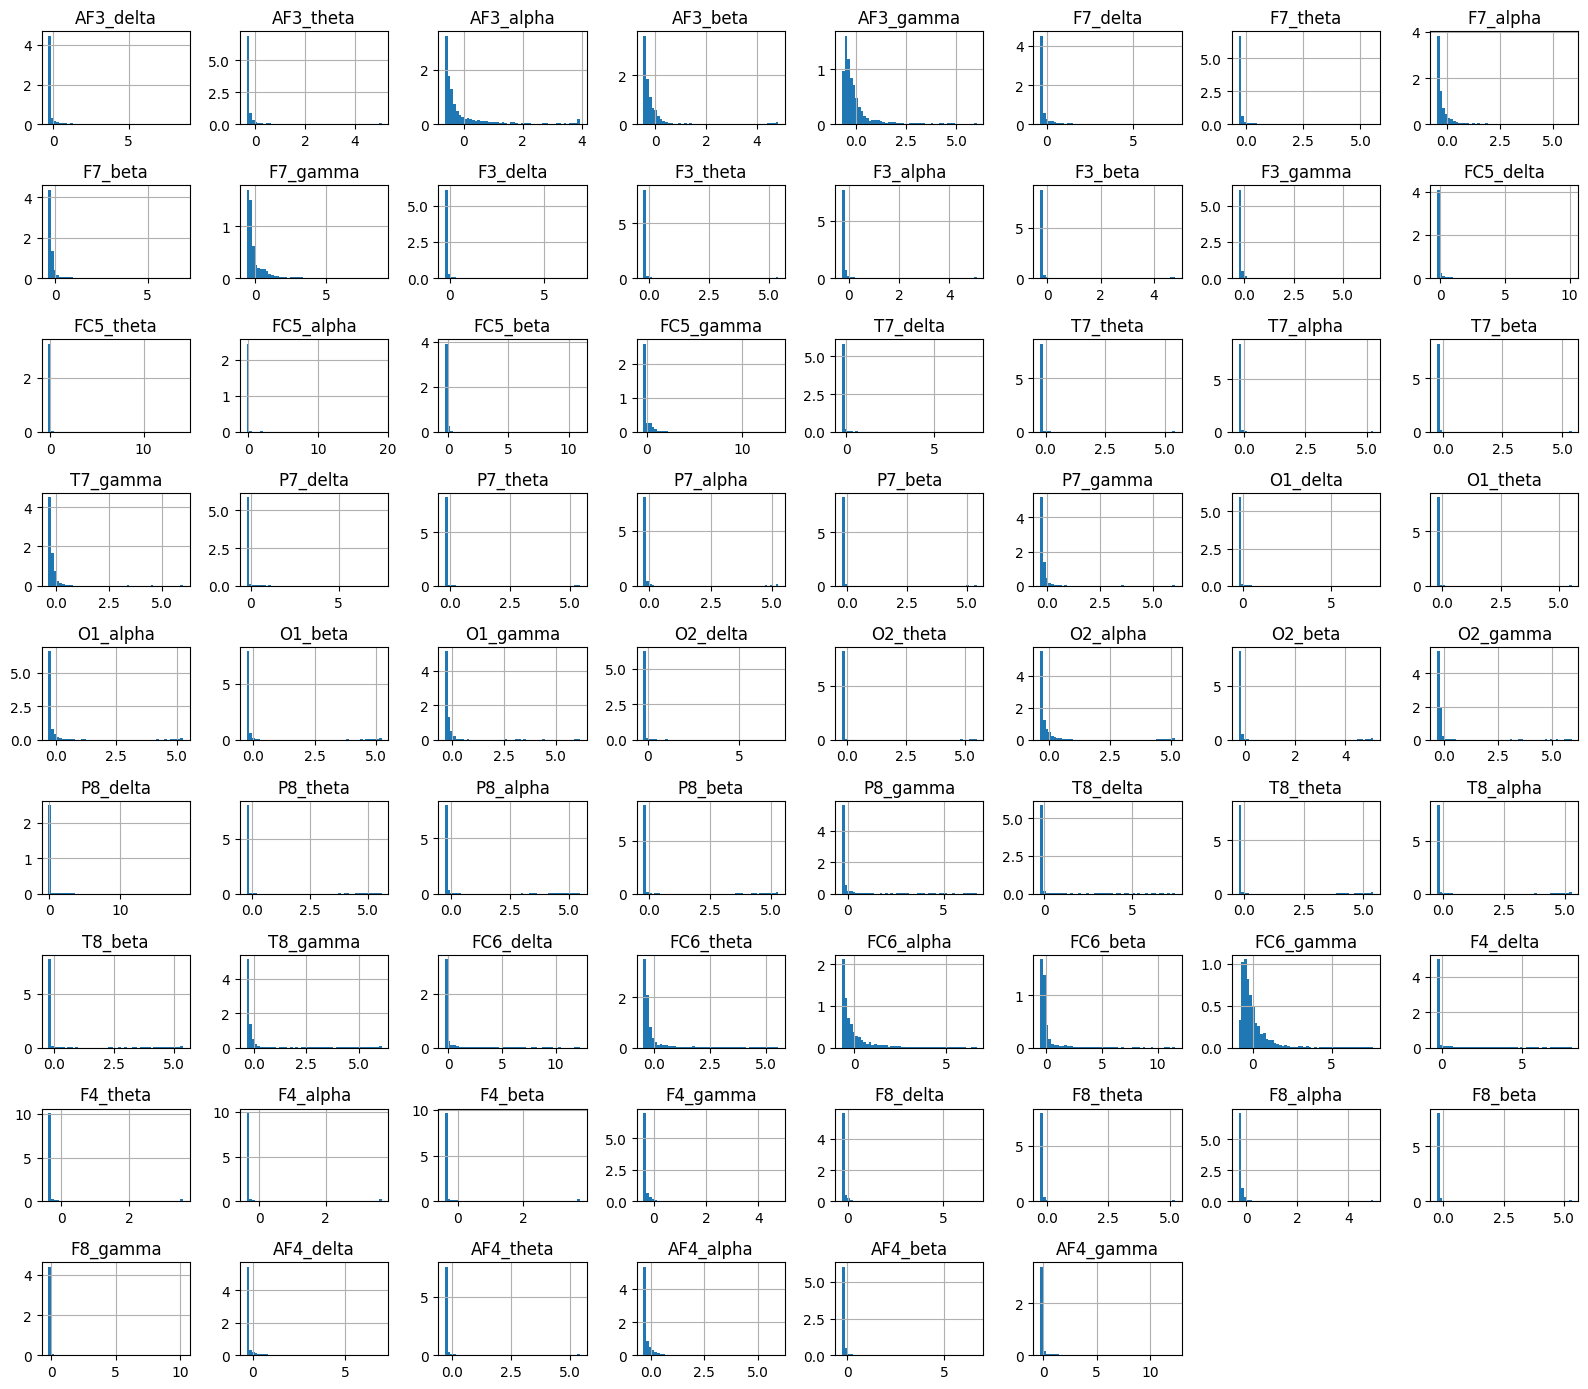

In [122]:
df_yeo_john.hist(bins=50, density=True, figsize=(16, 14))
plt.tight_layout()
plt.show()

In [123]:

df = df_log
df = df_sqrt_transformer

# df = df_boxcox
# df = df_yeo_john
df["Class"]= original_df["Class"]

**Data Preprocessing**


Data scaling - https://mkang32.github.io/python/2020/12/27/feature-scaling.html 


feature engineering - https://github.com/mkang32/feature-engineering

# Data scaling using reciporcal transformed data


In [124]:
df = df_reciprocal
df["Class"]= original_df["Class"]

**Minmax**


AF3_delta    AF3_theta    AF3_alpha     AF3_beta    AF3_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.051286     0.053300     0.037082     0.148602     0.207585   
std       0.079165     0.078677     0.070048     0.137873     0.154580   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.007187     0.010560     0.003707     0.046210     0.096277   
50%       0.025929     0.027575     0.012840     0.103622     0.169018   
75%       0.061150     0.065016     0.037457     0.215065     0.286445   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          F7_delta     F7_theta     F7_alpha      F7_beta     F7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.033614     0.054434     0.035925     0.174287     0.161650   
std       0.060085     0.065693     0.056488     0.150415     0.129169   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.003126     0.013856     0.006465     0.067470     0.062617   
50%       0.013269     0.035021     0.018093     0.130414     0.133014   
75%       0.038576     0.070285     0.042121     0.239327     0.219601   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          F3_delta     F3_theta     F3_alpha      F3_beta     F3_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.038816     0.060578     0.040256     0.122153     0.129928   
std       0.061962     0.077958     0.061763     0.114346     0.105939   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.003886     0.012031     0.005603     0.038296     0.051024   
50%       0.019022     0.038795     0.020173     0.094411     0.111570   
75%       0.048578     0.078135     0.048611     0.170193     0.181964   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         FC5_delta    FC5_theta    FC5_alpha     FC5_beta    FC5_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.048494     0.053000     0.057999     0.177646     0.157067   
std       0.074266     0.060054     0.080135     0.165229     0.139881   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.004576     0.011368     0.011733     0.032057     0.029621   
50%       0.022747     0.037768     0.029808     0.145790     0.134535   
75%       0.063347     0.072221     0.071428     0.274037     0.231573   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          T7_delta     T7_theta     T7_alpha      T7_beta     T7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.089885     0.082958     0.133067     0.200448     0.163541   
std       0.109919     0.075844     0.132750     0.136461     0.123393   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.013288     0.031688     0.040790     0.104753     0.068299   
50%       0.055517     0.068564     0.094085     0.174979     0.140337   
75%       0.126738     0.113010     0.183945     0.274905     0.228283   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          P7_delta     P7_theta     P7_alpha      P7_beta     P7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.062304     0.067726     0.058759     0.164988     0.169693   
std       0.088767     0.070375     0.079917     0.118971     0.131929   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.007887     0.024484     0.011851     0.082075     0.074955   
50%       0.034916     0.051835     0.032066     0.144983     0.139516   
75%       0.078828     0.087696     0.078354     0.222659     0.232590   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       

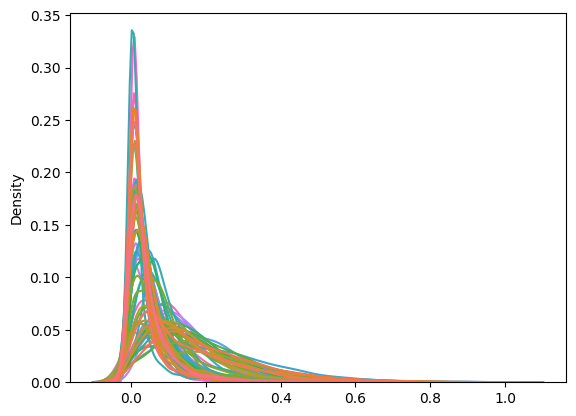

In [125]:
# Minmax 
scaler_minmax = MinMaxScaler().fit(df.drop(["Class"],axis=1))

# transform data
X_train_scaled_minmax = scaler_minmax.transform(df.drop(["Class"],axis=1))

# put them in dataframe 
X_train_scaled_minmax = pd.DataFrame(X_train_scaled_minmax, columns=df.drop(["Class"],axis=1).columns)

# plot
sns.kdeplot(X_train_scaled_minmax,legend=False)
X_train_scaled_minmax.describe()


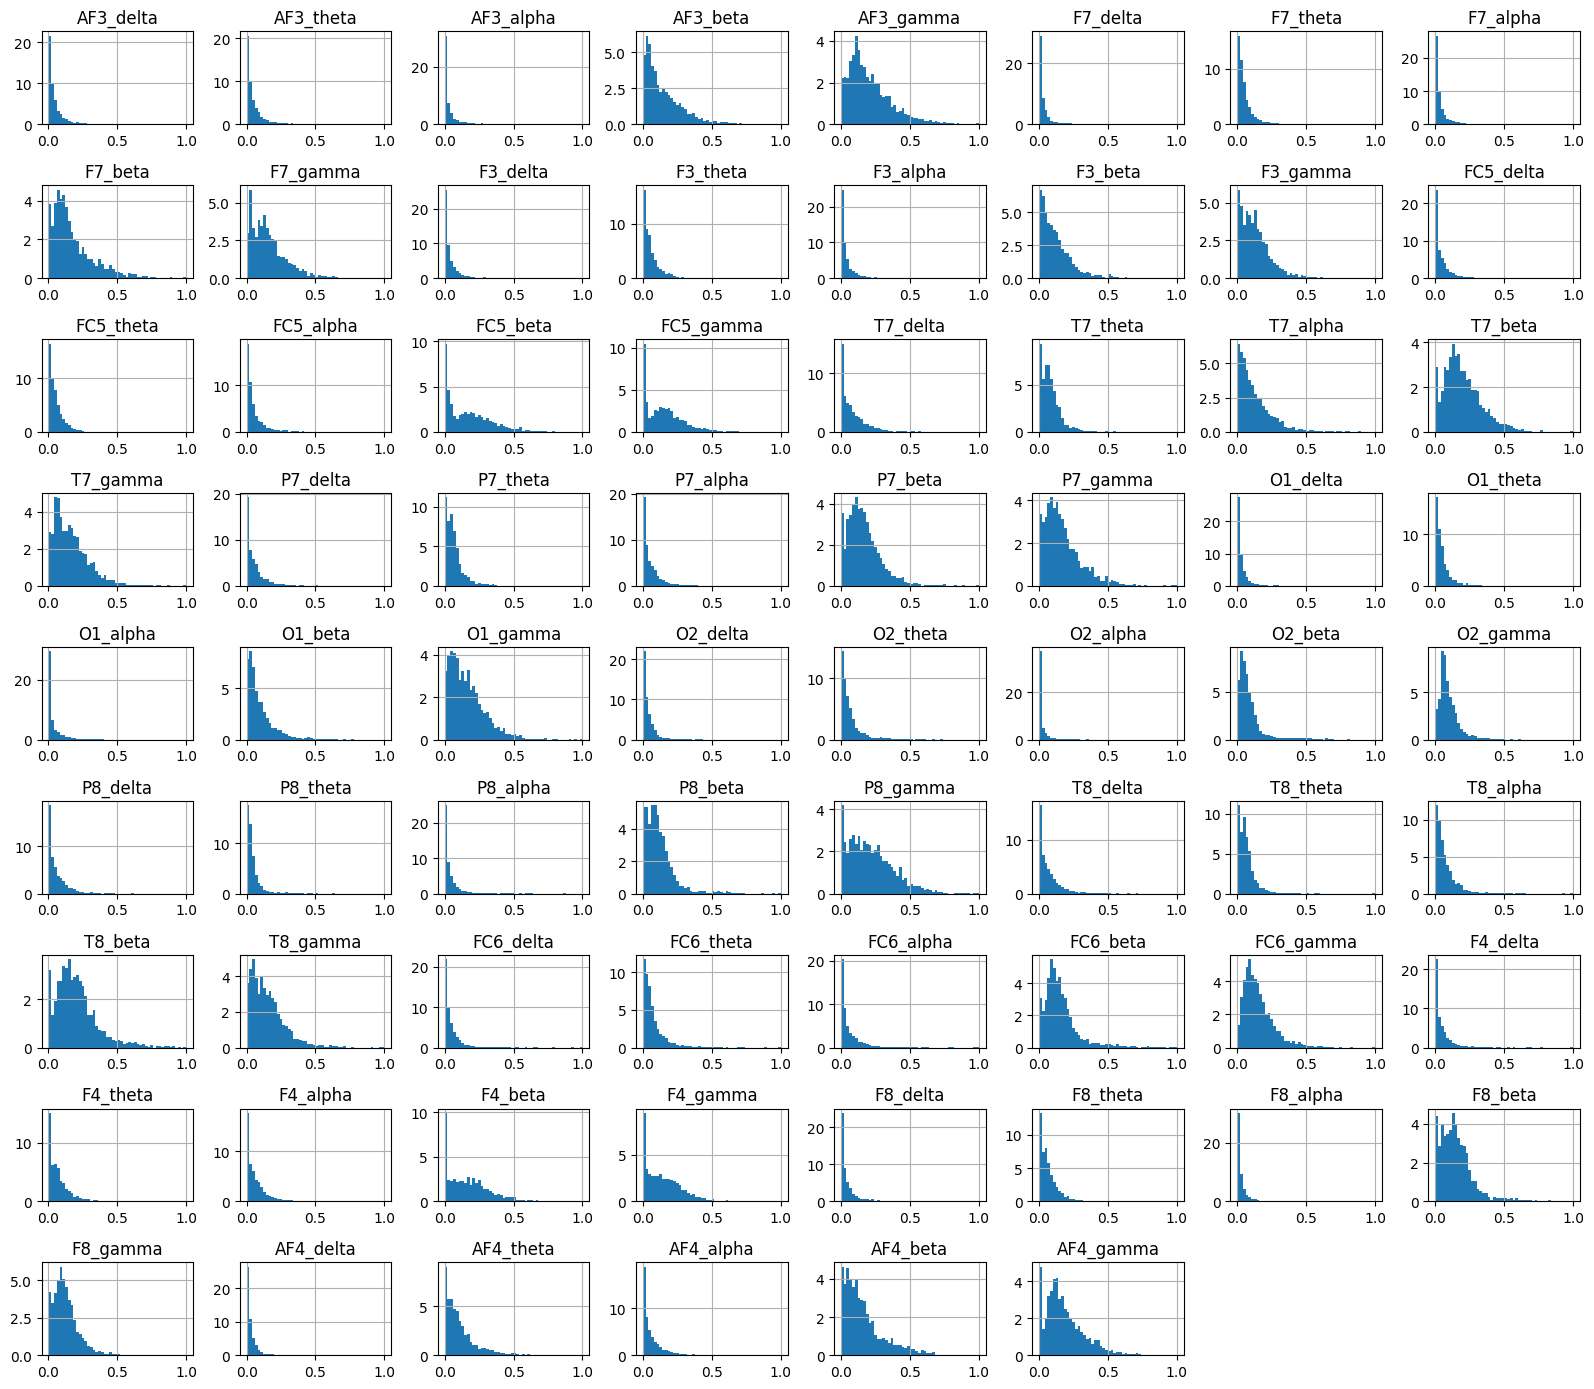

In [126]:
X_train_scaled_minmax.hist(bins=50, density=True, figsize=(16, 14))
plt.tight_layout()
plt.show()

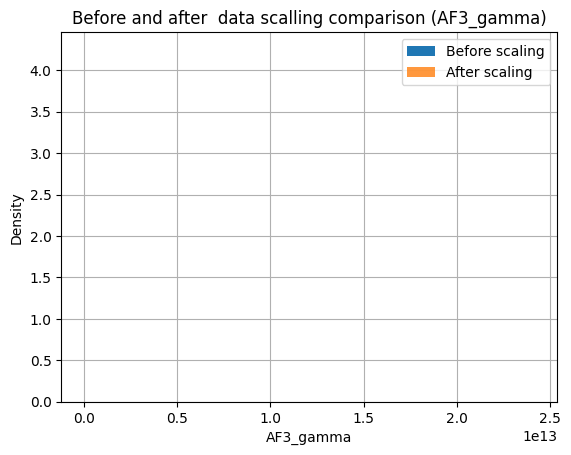

In [127]:
# check the data before and after: Histogram 
fig, ax = plt.subplots()
df['AF3_gamma'].hist(bins=50, density=True)
X_train_scaled_minmax['AF3_gamma'].hist(bins=50, density=True, alpha=0.8)

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after  data scalling comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

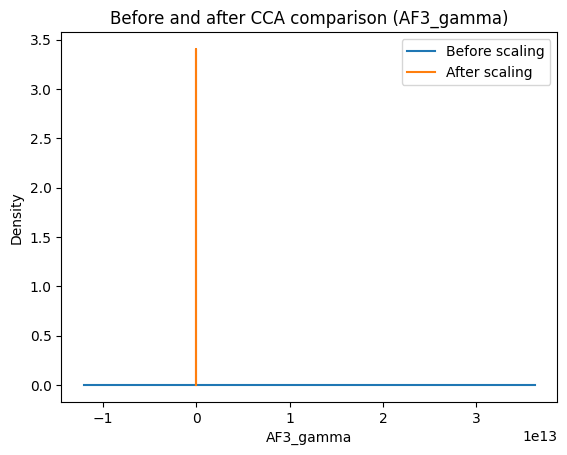

In [128]:
#check the data before and after: Density Plot 
fig, ax = plt.subplots()
df['AF3_gamma'].plot.density()
X_train_scaled_minmax['AF3_gamma'].plot.density()

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after CCA comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

**MaxAbsScaler**

AF3_delta    AF3_theta    AF3_alpha     AF3_beta    AF3_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.051291     0.053312     0.037116     0.148784     0.208176   
std       0.079164     0.078676     0.070045     0.137844     0.154465   
min       0.000006     0.000013     0.000036     0.000214     0.000745   
25%       0.007193     0.010573     0.003743     0.046414     0.096950   
50%       0.025934     0.027588     0.012876     0.103813     0.169638   
75%       0.061155     0.065029     0.037492     0.215232     0.286977   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          F7_delta     F7_theta     F7_alpha      F7_beta     F7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.033619     0.054446     0.035947     0.174392     0.161884   
std       0.060085     0.065692     0.056487     0.150396     0.129134   
min       0.000005     0.000013     0.000023     0.000128     0.000278   
25%       0.003131     0.013869     0.006488     0.067589     0.062878   
50%       0.013274     0.035033     0.018116     0.130525     0.133256   
75%       0.038581     0.070297     0.042143     0.239424     0.219818   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           F3_delta     F3_theta     F3_alpha      F3_beta     F3_gamma  \
count  2.625000e+03  2625.000000  2625.000000  2625.000000  2625.000000   
mean   3.881686e-02     0.060579     0.040260     0.122170     0.129960   
std    6.196243e-02     0.077958     0.061763     0.114344     0.105935   
min    9.509709e-07     0.000001     0.000004     0.000019     0.000037   
25%    3.887219e-03     0.012032     0.005607     0.038314     0.051059   
50%    1.902339e-02     0.038796     0.020177     0.094428     0.111603   
75%    4.857868e-02     0.078136     0.048615     0.170208     0.181994   
max    1.000000e+00     1.000000     1.000000     1.000000     1.000000   

         FC5_delta     FC5_theta    FC5_alpha     FC5_beta    FC5_gamma  \
count  2625.000000  2.625000e+03  2625.000000  2625.000000  2625.000000   
mean      0.048496  5.300058e-02     0.058000     0.177659     0.157102   
std       0.074266  6.005430e-02     0.080135     0.165227     0.139875   
min       0.000002  5.322325e-07     0.000001     0.000016     0.000041   
25%       0.004578  1.136884e-02     0.011735     0.032073     0.029661   
50%       0.022748  3.776869e-02     0.029809     0.145804     0.134571   
75%       0.063349  7.222171e-02     0.071429     0.274049     0.231605   
max       1.000000  1.000000e+00     1.000000     1.000000     1.000000   

          T7_delta     T7_theta     T7_alpha      T7_beta     T7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.089887     0.082960     0.133078     0.200479     0.163673   
std       0.109919     0.075843     0.132748     0.136456     0.123373   
min       0.000002     0.000002     0.000013     0.000039     0.000158   
25%       0.013290     0.031690     0.040802     0.104788     0.068446   
50%       0.055519     0.068566     0.094097     0.175011     0.140473   
75%       0.126739     0.113012     0.183956     0.274933     0.228405   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          P7_delta     P7_theta     P7_alpha      P7_beta     P7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.062305     0.067727     0.058764     0.165010     0.169800   
std       0.088766     0.070375     0.079916     0.118968     0.131912   
min       0.000001     0.000002     0.000005     0.000026     0.000129   
25%       0.007889     0.024486     0.011856     0.082099     0.075075   
50%       0.034917     0.051836     0.032071     0.145005     0.139627   
75%       0.078829     0.087697     0.078359     0.222679     0.232690   
max       1.000000     1.000000     1.000000     1.000000     1.

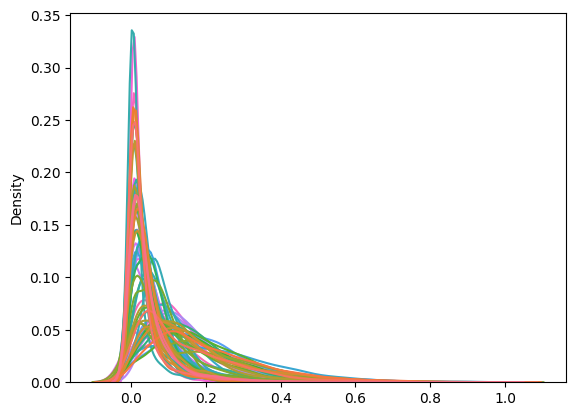

In [129]:
scaler_maxabs = MaxAbsScaler().fit(df.drop(["Class"],axis=1))

# transform data
X_train_scaled_maxabs = scaler_maxabs.transform(df.drop(["Class"],axis=1))

# put them in dataframe 
X_train_scaled_maxabs = pd.DataFrame(X_train_scaled_maxabs, columns=df.drop(["Class"],axis=1).columns)

# plot
sns.kdeplot(X_train_scaled_maxabs,legend=False)
X_train_scaled_maxabs.describe()

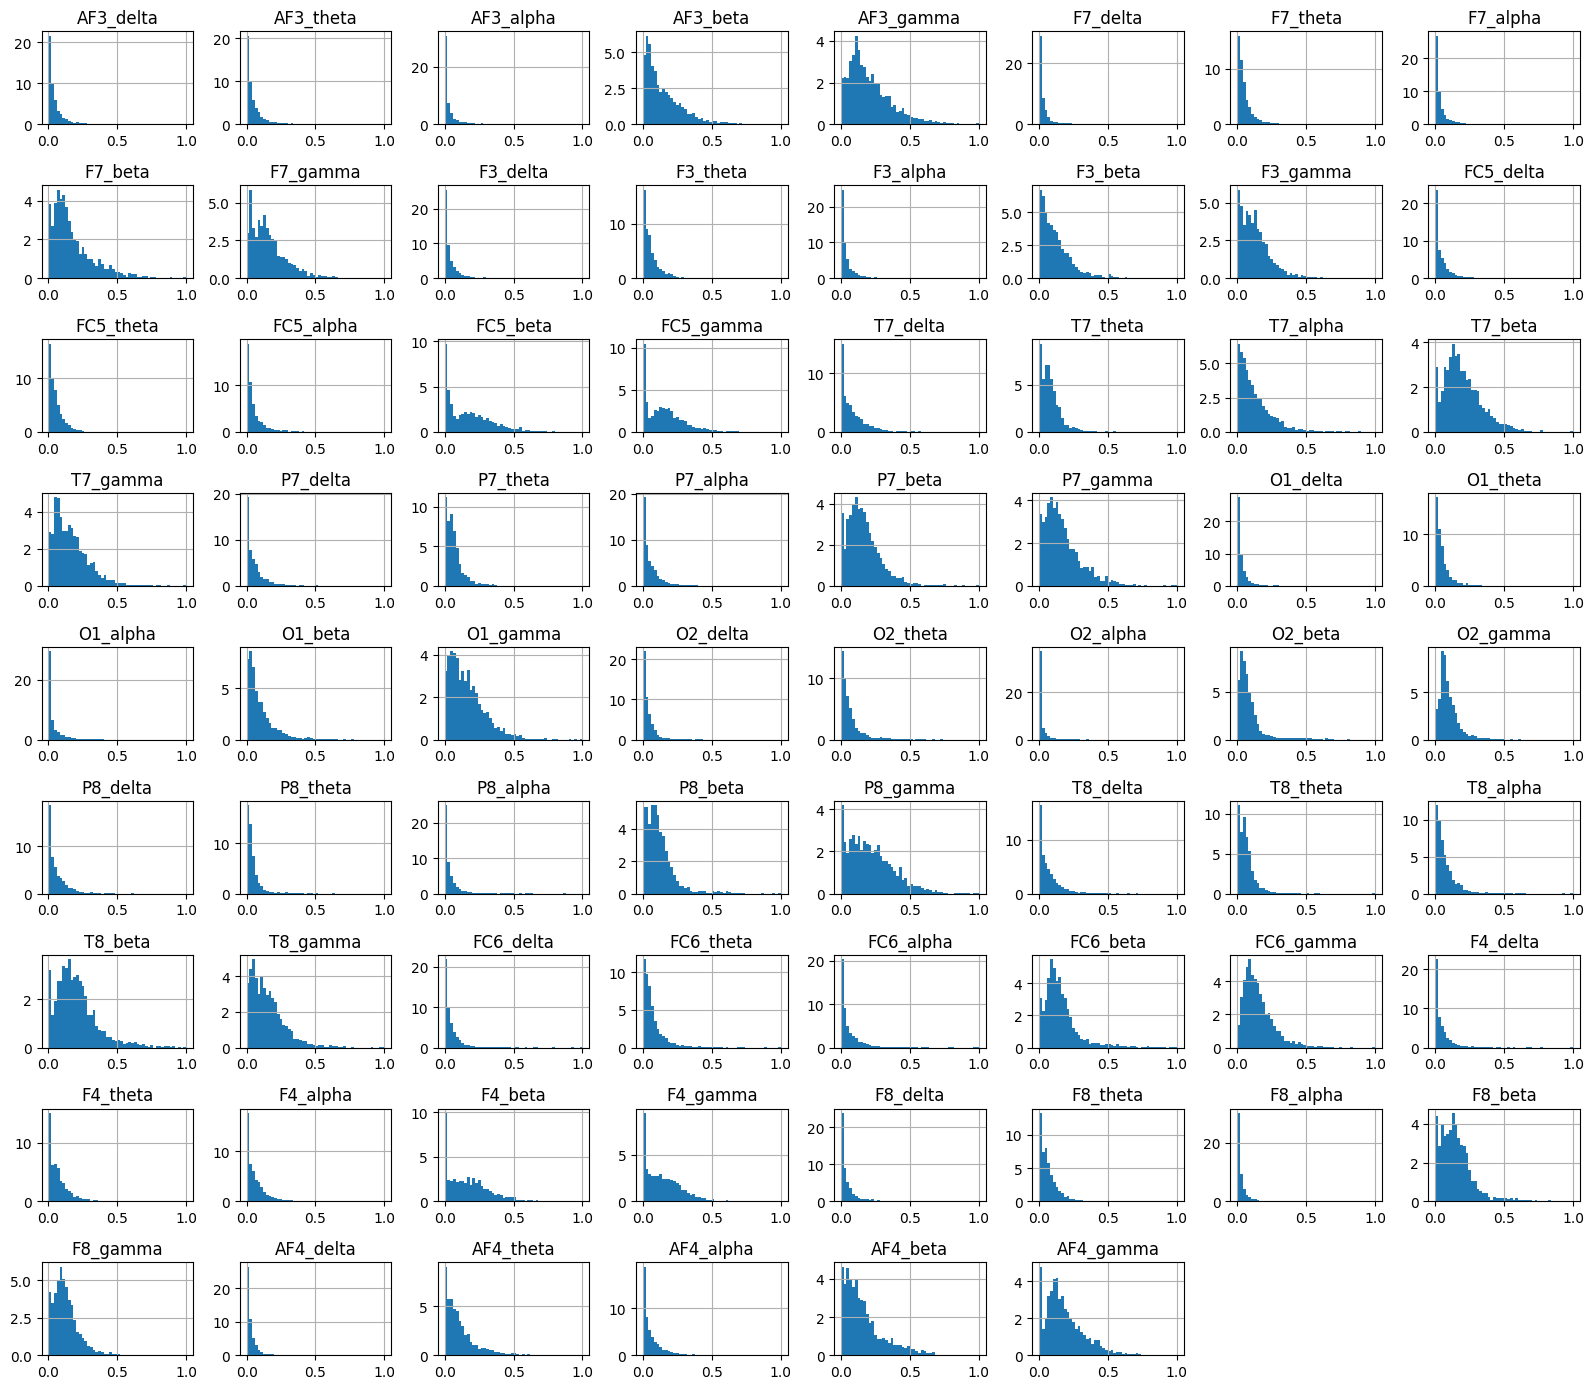

In [130]:
X_train_scaled_maxabs.hist(bins=50, density=True, figsize=(16, 14))
plt.tight_layout()
plt.show()

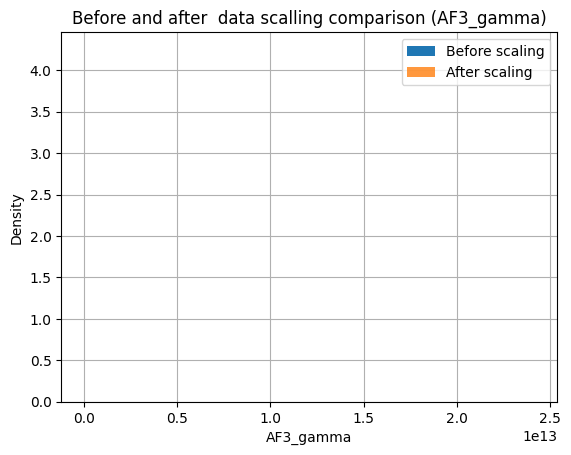

In [131]:
# check the data before and after: Histogram 
fig, ax = plt.subplots()
df['AF3_gamma'].hist(bins=50, density=True)
X_train_scaled_minmax['AF3_gamma'].hist(bins=50, density=True, alpha=0.8)

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after  data scalling comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

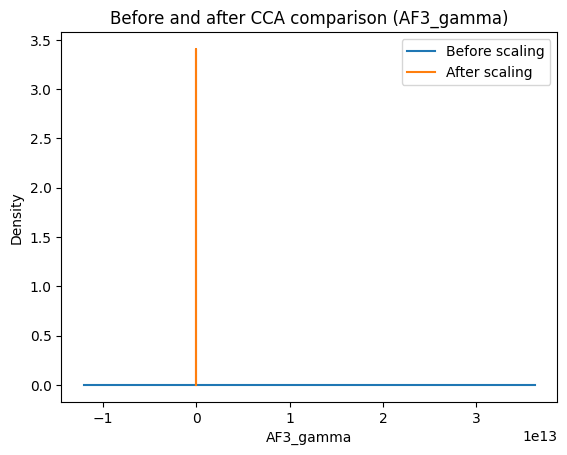

In [132]:
#check the data before and after: Density Plot 
fig, ax = plt.subplots()
df['AF3_gamma'].plot.density()
X_train_scaled_maxabs['AF3_gamma'].plot.density()

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after CCA comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

**StandardScaler**

<Axes: ylabel='Density'>

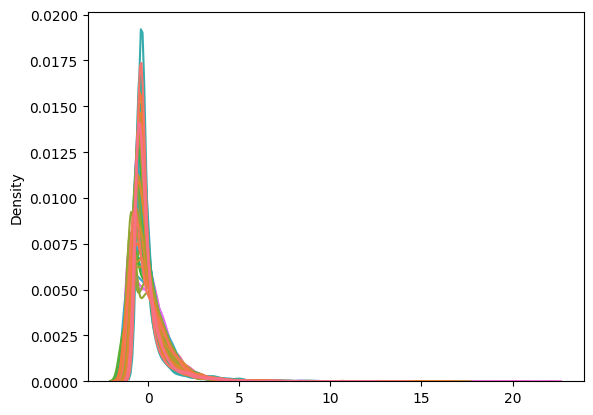

In [133]:
scaler_std = StandardScaler().fit(df.drop(["Class"],axis=1))

# transform data
X_train_scaled_std = scaler_std.transform(df.drop(["Class"],axis=1))

# put them in dataframe 
X_train_scaled_std = pd.DataFrame(X_train_scaled_std, columns=df.drop(["Class"],axis=1).columns)

# plot 
sns.kdeplot(X_train_scaled_std,legend=False)

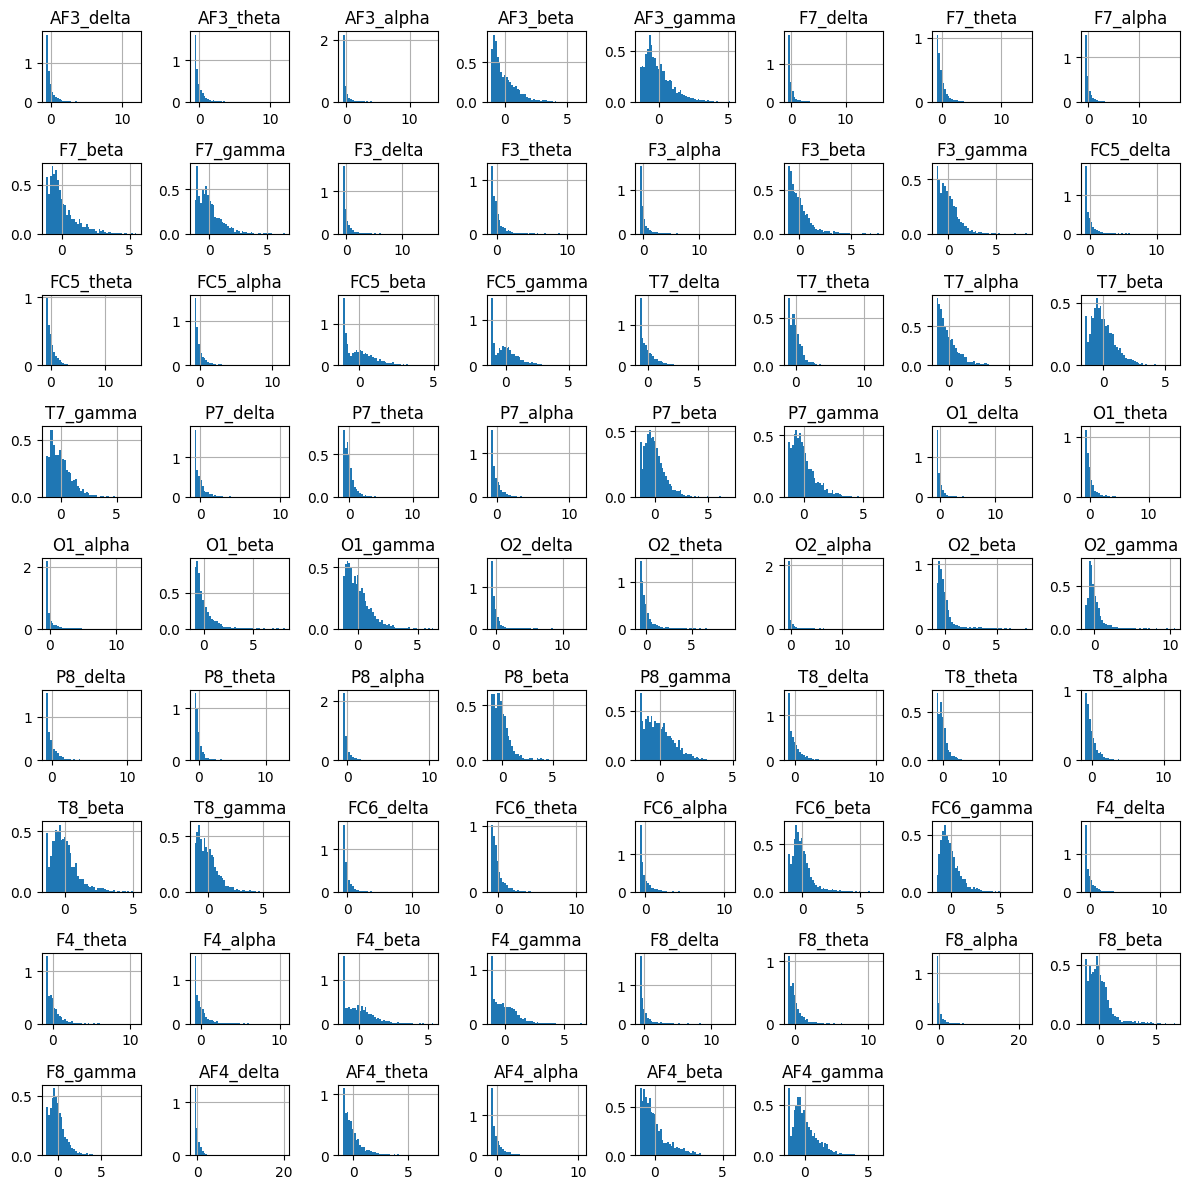

In [134]:
X_train_scaled_std.hist(bins=50, density=True, figsize=(12, 12))
plt.tight_layout()
plt.show()

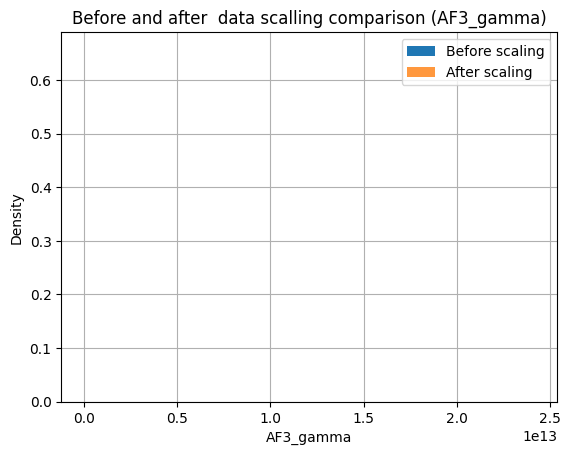

In [135]:
# check the data before and after: Histogram 
fig, ax = plt.subplots()
df['AF3_gamma'].hist(bins=50, density=True)
X_train_scaled_std['AF3_gamma'].hist(bins=50, density=True, alpha=0.8)

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after  data scalling comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

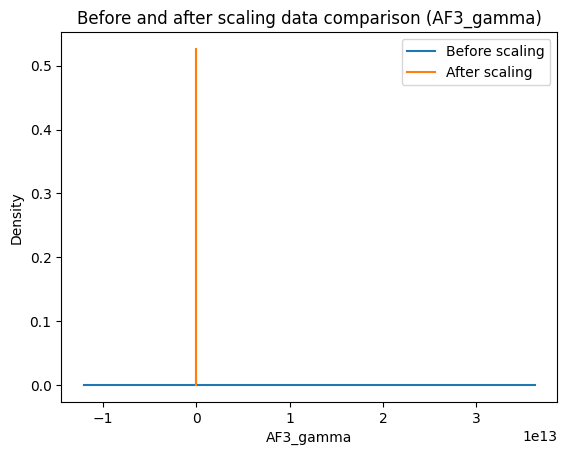

In [136]:
#check the data before and after: Density Plot 
fig, ax = plt.subplots()
df['AF3_gamma'].plot.density()
X_train_scaled_std['AF3_gamma'].plot.density()

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after scaling data comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

# Data scaling using Log transformed data

In [137]:

df = df_log
df["Class"]= original_df["Class"]

**Minmax**


AF3_delta    AF3_theta    AF3_alpha     AF3_beta    AF3_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.004021     0.010113     0.017435     0.011624     0.009343   
std       0.031990     0.051070     0.060252     0.048520     0.032024   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000085     0.000189     0.000928     0.000779     0.001853   
50%       0.000208     0.000464     0.002772     0.001845     0.003651   
75%       0.000763     0.001231     0.009623     0.004390     0.006948   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          F7_delta     F7_theta     F7_alpha      F7_beta     F7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.005321     0.006860     0.007185     0.005020     0.005649   
std       0.034263     0.035601     0.029743     0.026973     0.031512   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000133     0.000170     0.000525     0.000405     0.000989   
50%       0.000397     0.000353     0.001253     0.000850     0.001812   
75%       0.001700     0.000912     0.003540     0.001761     0.004152   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          F3_delta     F3_theta     F3_alpha      F3_beta     F3_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.004492     0.008881     0.009978     0.012362     0.006146   
std       0.030017     0.053875     0.053592     0.067295     0.042763   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000019     0.000015     0.000078     0.000091     0.000165   
50%       0.000049     0.000032     0.000194     0.000179     0.000292   
75%       0.000244     0.000107     0.000709     0.000469     0.000681   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         FC5_delta    FC5_theta    FC5_alpha     FC5_beta    FC5_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.003260     0.001437     0.001097     0.002217     0.002290   
std       0.032590     0.020314     0.019878     0.021362     0.021506   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000027     0.000007     0.000015     0.000043     0.000137   
50%       0.000077     0.000014     0.000037     0.000096     0.000266   
75%       0.000391     0.000046     0.000095     0.000495     0.001352   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          T7_delta     T7_theta     T7_alpha      T7_beta     T7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.003928     0.008770     0.009161     0.009047     0.007705   
std       0.029533     0.054757     0.053136     0.054127     0.042011   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000015     0.000019     0.000059     0.000102     0.000533   
50%       0.000038     0.000033     0.000127     0.000182     0.000965   
75%       0.000167     0.000074     0.000311     0.000329     0.002146   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          P7_delta     P7_theta     P7_alpha      P7_beta     P7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.003906     0.008799     0.009315     0.009039     0.007335   
std       0.029479     0.054947     0.053396     0.054330     0.041321   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000014     0.000016     0.000062     0.000092     0.000427   
50%       0.000033     0.000028     0.000160     0.000155     0.000798   
75%       0.000150     0.000062     0.000441     0.000293     0.001595   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       

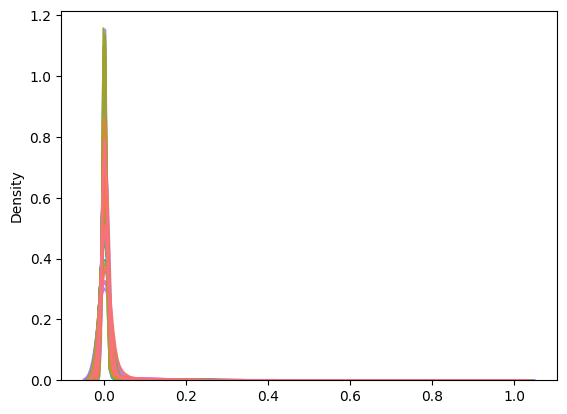

In [138]:
# Minmax 
scaler_minmax = MinMaxScaler().fit(df.drop(["Class"],axis=1))

# transform data
X_train_scaled_minmax = scaler_minmax.transform(df.drop(["Class"],axis=1))

# put them in dataframe 
X_train_scaled_minmax = pd.DataFrame(X_train_scaled_minmax, columns=df.drop(["Class"],axis=1).columns)

# plot
sns.kdeplot(X_train_scaled_minmax,legend=False)
X_train_scaled_minmax.describe()


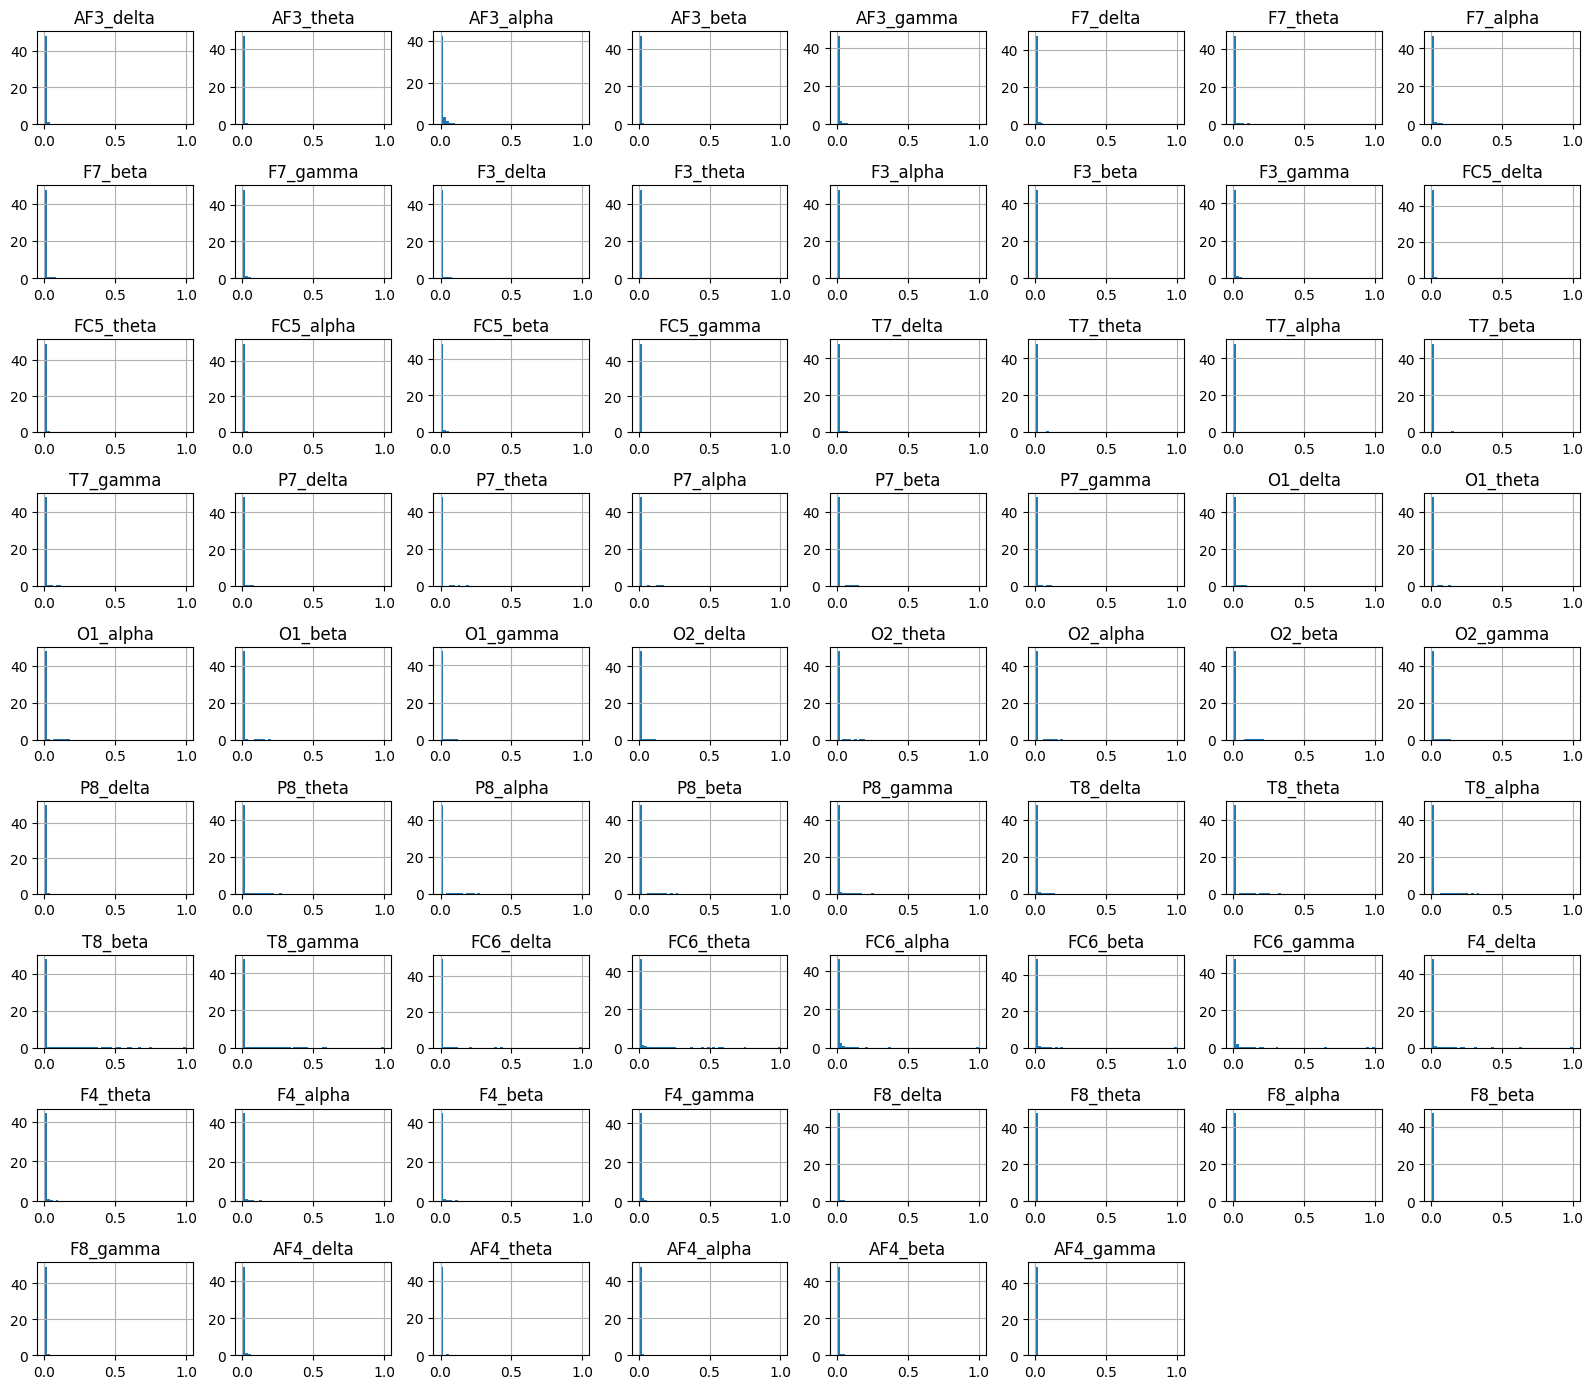

In [139]:
X_train_scaled_minmax.hist(bins=50, density=True, figsize=(16, 14))
plt.tight_layout()
plt.show()

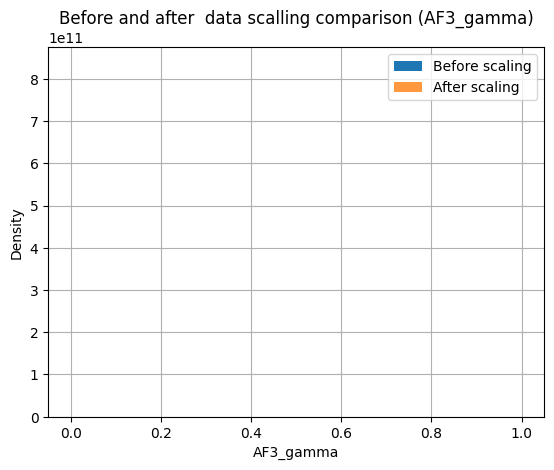

In [140]:
# check the data before and after: Histogram 
fig, ax = plt.subplots()
df['AF3_gamma'].hist(bins=50, density=True)
X_train_scaled_minmax['AF3_gamma'].hist(bins=50, density=True, alpha=0.8)

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after  data scalling comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

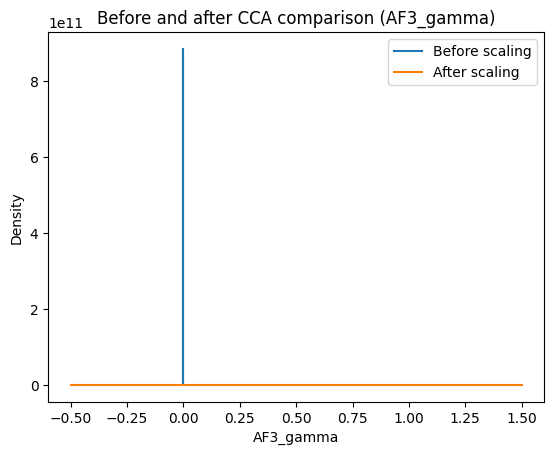

In [141]:
#check the data before and after: Density Plot 
fig, ax = plt.subplots()
df['AF3_gamma'].plot.density()
X_train_scaled_minmax['AF3_gamma'].plot.density()

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after CCA comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

**MaxAbsScaler**

AF3_delta    AF3_theta    AF3_alpha     AF3_beta    AF3_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.004027     0.010126     0.017470     0.011835     0.010081   
std       0.031990     0.051070     0.060250     0.048510     0.032000   
min       0.000006     0.000013     0.000036     0.000214     0.000745   
25%       0.000090     0.000202     0.000964     0.000993     0.002597   
50%       0.000213     0.000477     0.002808     0.002058     0.004394   
75%       0.000769     0.001244     0.009659     0.004603     0.007688   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          F7_delta     F7_theta     F7_alpha      F7_beta     F7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.005326     0.006873     0.007208     0.005147     0.005926   
std       0.034263     0.035600     0.029742     0.026969     0.031504   
min       0.000005     0.000013     0.000023     0.000128     0.000278   
25%       0.000138     0.000182     0.000549     0.000533     0.001267   
50%       0.000402     0.000366     0.001276     0.000978     0.002090   
75%       0.001705     0.000924     0.003563     0.001888     0.004429   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           F3_delta     F3_theta     F3_alpha      F3_beta     F3_gamma  \
count  2.625000e+03  2625.000000  2625.000000  2625.000000  2625.000000   
mean   4.493265e-03     0.008882     0.009982     0.012381     0.006183   
std    3.001738e-02     0.053875     0.053591     0.067293     0.042762   
min    9.509710e-07     0.000001     0.000004     0.000019     0.000037   
25%    1.957589e-05     0.000017     0.000082     0.000110     0.000201   
50%    4.998956e-05     0.000034     0.000198     0.000198     0.000328   
75%    2.446404e-04     0.000108     0.000713     0.000488     0.000718   
max    1.000000e+00     1.000000     1.000000     1.000000     1.000000   

         FC5_delta     FC5_theta    FC5_alpha     FC5_beta    FC5_gamma  \
count  2625.000000  2.625000e+03  2625.000000  2625.000000  2625.000000   
mean      0.003262  1.437376e-03     0.001098     0.002234     0.002331   
std       0.032590  2.031406e-02     0.019878     0.021362     0.021505   
min       0.000002  5.322325e-07     0.000001     0.000016     0.000041   
25%       0.000028  7.369426e-06     0.000016     0.000060     0.000178   
50%       0.000079  1.409190e-05     0.000038     0.000113     0.000307   
75%       0.000393  4.681502e-05     0.000096     0.000512     0.001393   
max       1.000000  1.000000e+00     1.000000     1.000000     1.000000   

          T7_delta     T7_theta     T7_alpha      T7_beta     T7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.003931     0.008772     0.009174     0.009085     0.007861   
std       0.029533     0.054757     0.053135     0.054125     0.042004   
min       0.000002     0.000002     0.000013     0.000039     0.000158   
25%       0.000018     0.000021     0.000072     0.000140     0.000690   
50%       0.000040     0.000035     0.000141     0.000220     0.001123   
75%       0.000169     0.000076     0.000324     0.000368     0.002304   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          P7_delta     P7_theta     P7_alpha      P7_beta     P7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.003907     0.008801     0.009320     0.009065     0.007464   
std       0.029479     0.054947     0.053396     0.054329     0.041316   
min       0.000001     0.000002     0.000005     0.000026     0.000129   
25%       0.000015     0.000018     0.000068     0.000118     0.000556   
50%       0.000034     0.000030     0.000165     0.000181     0.000927   
75%       0.000151     0.000064     0.000446     0.000320     0.001724   
max       1.000000     1.000000     1.000000     1.000000     1.

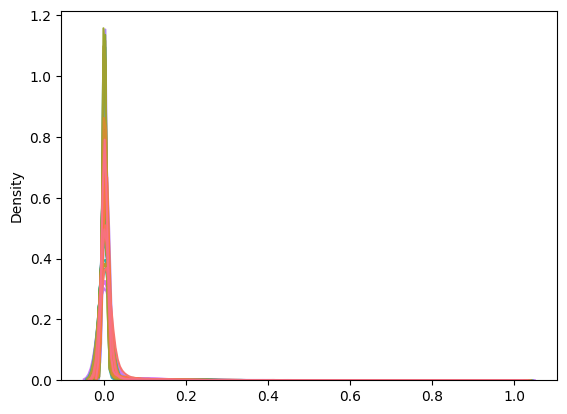

In [142]:
scaler_maxabs = MaxAbsScaler().fit(df.drop(["Class"],axis=1))

# transform data
X_train_scaled_maxabs = scaler_maxabs.transform(df.drop(["Class"],axis=1))

# put them in dataframe 
X_train_scaled_maxabs = pd.DataFrame(X_train_scaled_maxabs, columns=df.drop(["Class"],axis=1).columns)

# plot
sns.kdeplot(X_train_scaled_maxabs,legend=False)
X_train_scaled_maxabs.describe()


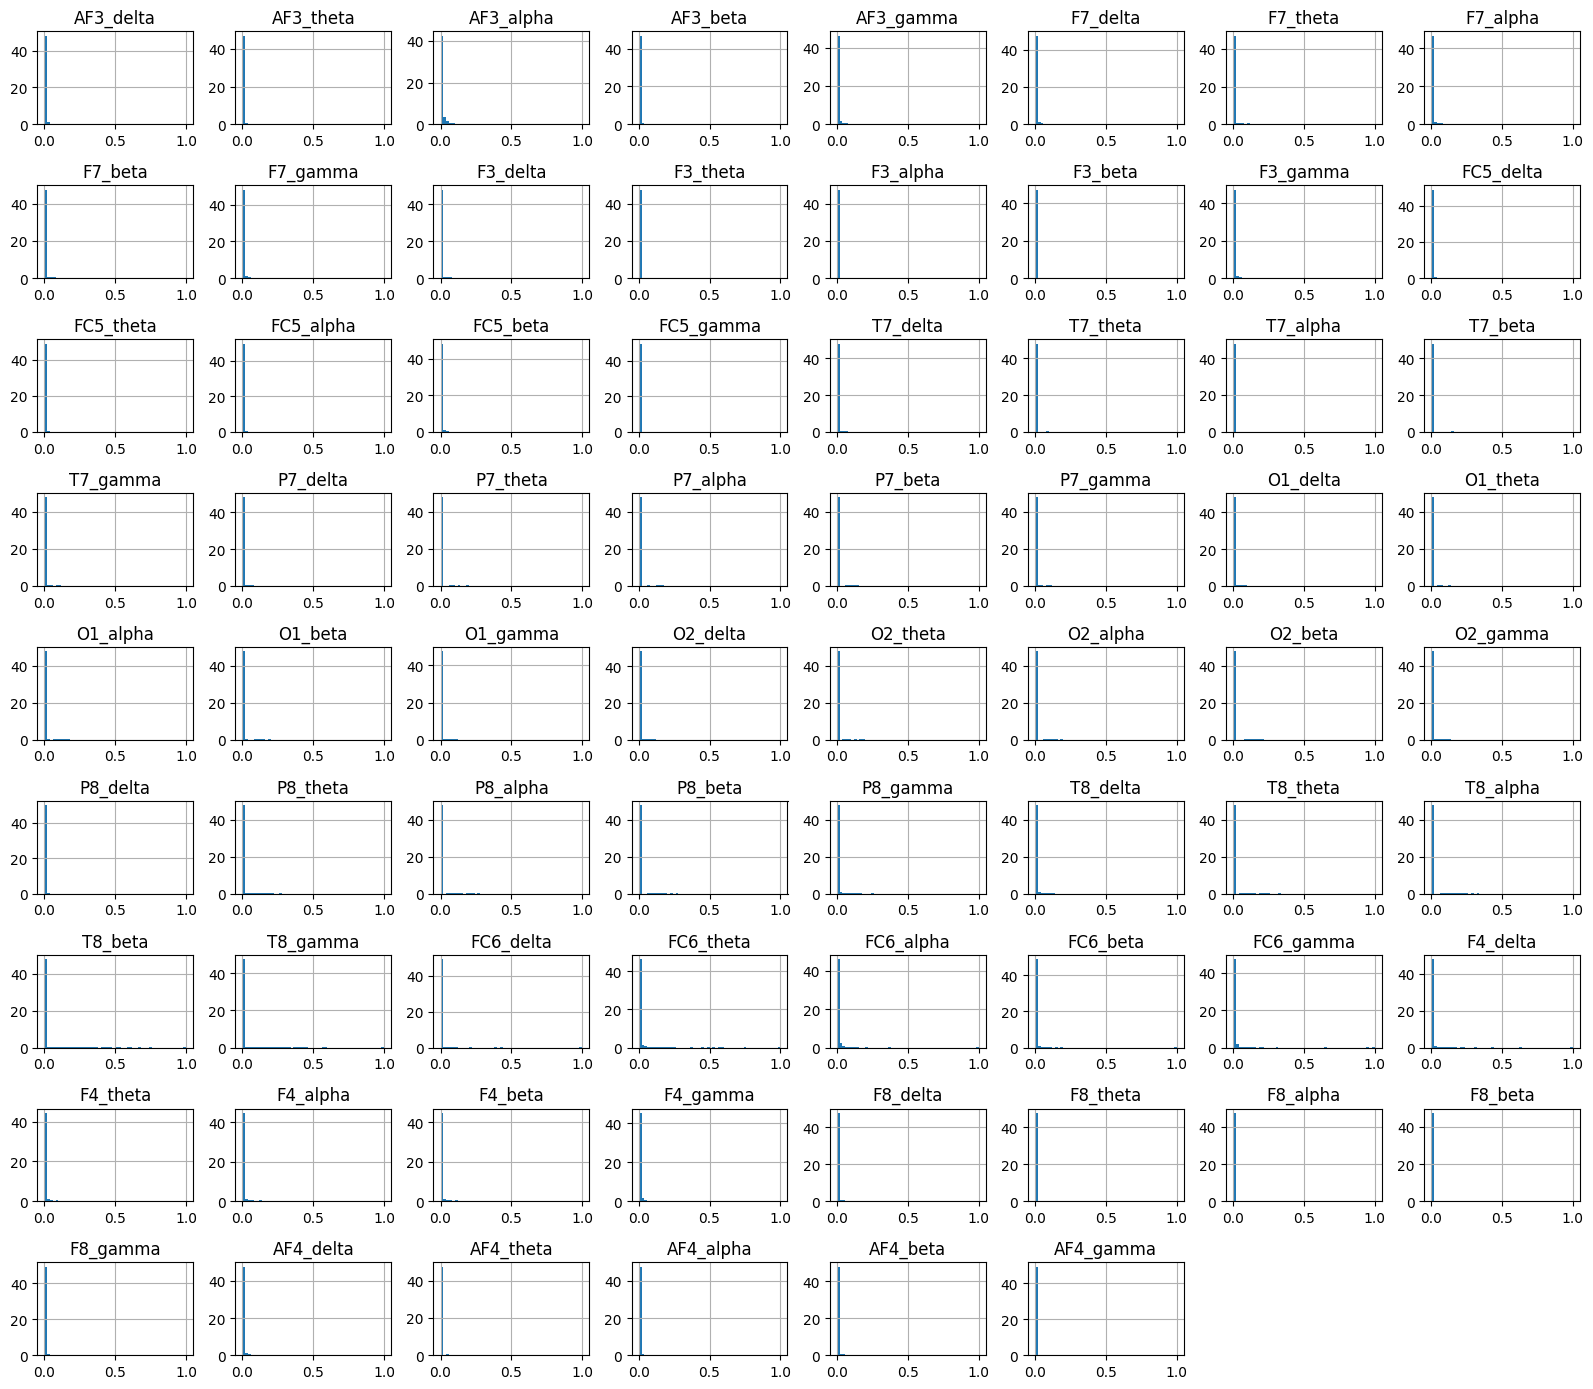

In [143]:
X_train_scaled_maxabs.hist(bins=50, density=True, figsize=(16, 14))
plt.tight_layout()
plt.show()

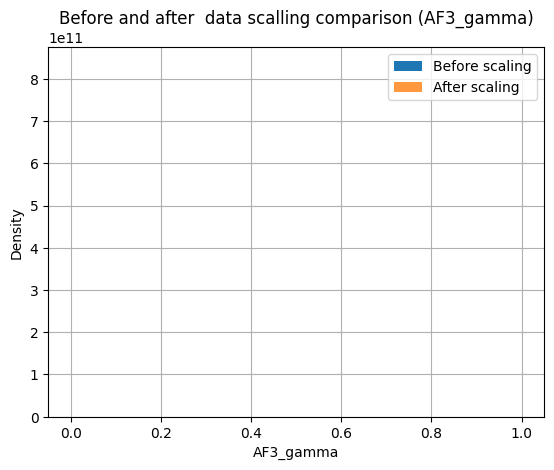

In [144]:
# check the data before and after: Histogram 
fig, ax = plt.subplots()
df['AF3_gamma'].hist(bins=50, density=True)
X_train_scaled_minmax['AF3_gamma'].hist(bins=50, density=True, alpha=0.8)

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after  data scalling comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

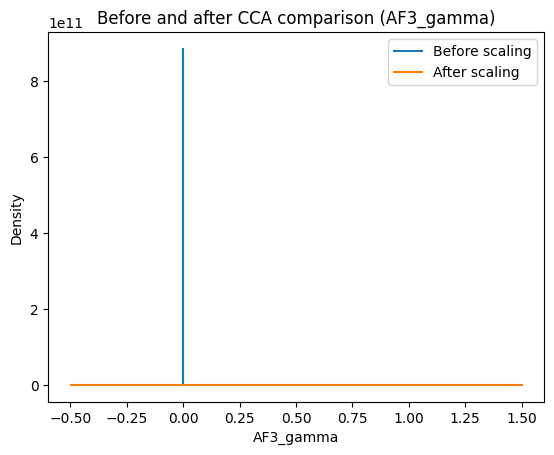

In [145]:
#check the data before and after: Density Plot 
fig, ax = plt.subplots()
df['AF3_gamma'].plot.density()
X_train_scaled_maxabs['AF3_gamma'].plot.density()

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after CCA comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

**StandardScaler**

<Axes: ylabel='Density'>

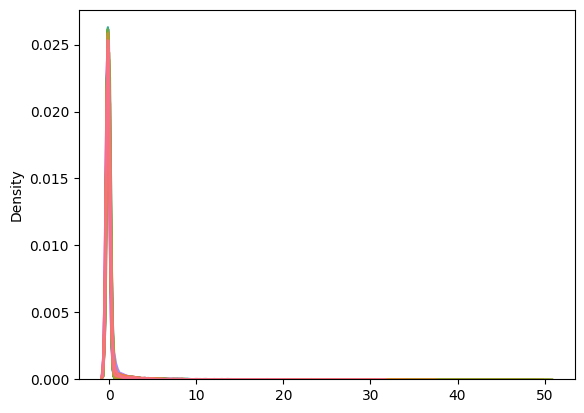

In [146]:
scaler_std = StandardScaler().fit(df.drop(["Class"],axis=1))

# transform data
X_train_scaled_std = scaler_std.transform(df.drop(["Class"],axis=1))

# put them in dataframe 
X_train_scaled_std = pd.DataFrame(X_train_scaled_std, columns=df.drop(["Class"],axis=1).columns)

# plot 
sns.kdeplot(X_train_scaled_std,legend=False)

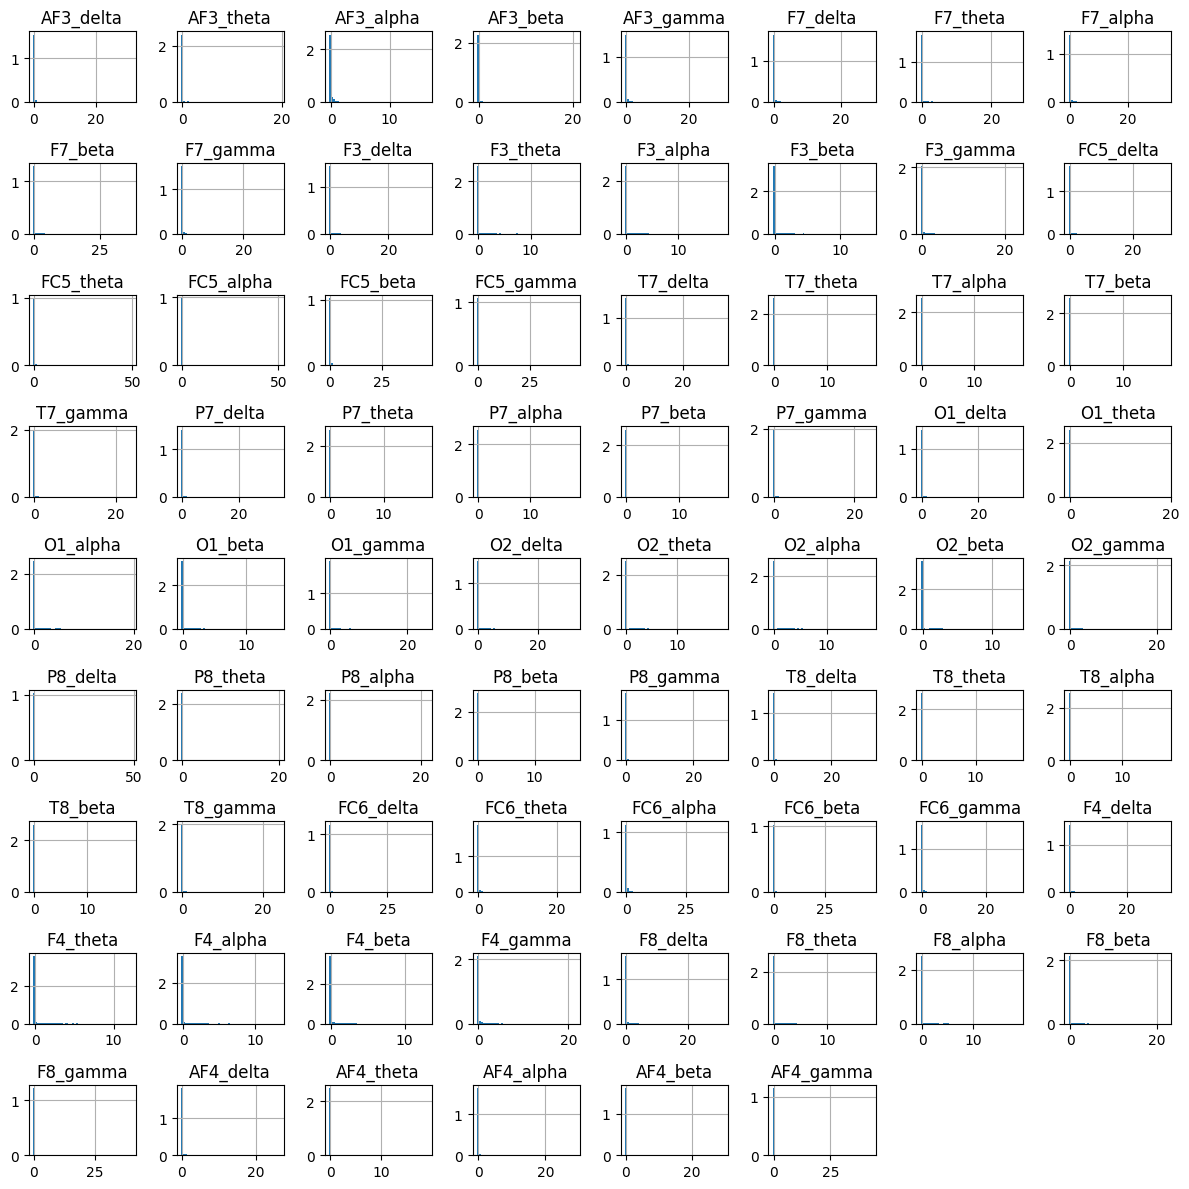

In [147]:
X_train_scaled_std.hist(bins=50, density=True, figsize=(12, 12))
plt.tight_layout()
plt.show()

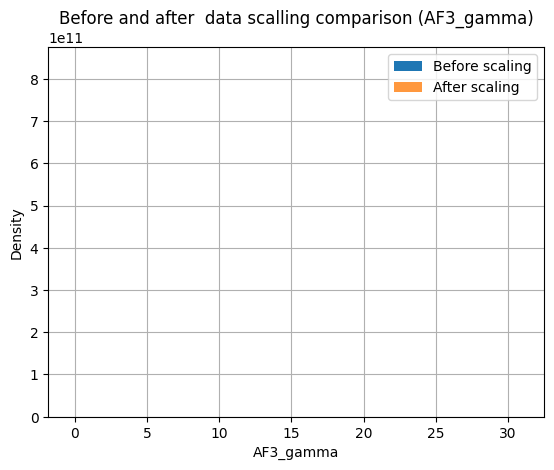

In [148]:
# check the data before and after: Histogram 
fig, ax = plt.subplots()
df['AF3_gamma'].hist(bins=50, density=True)
X_train_scaled_std['AF3_gamma'].hist(bins=50, density=True, alpha=0.8)

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after  data scalling comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

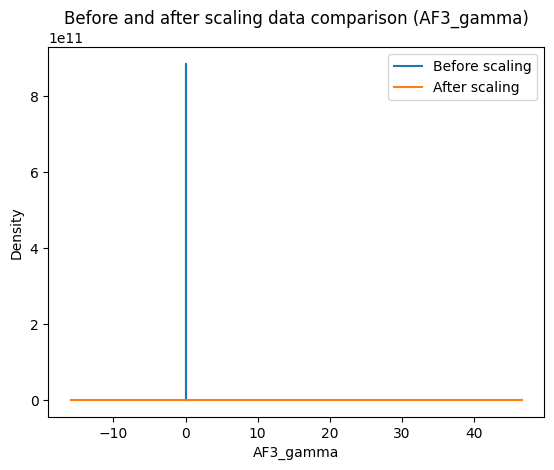

In [149]:
#check the data before and after: Density Plot 
fig, ax = plt.subplots()
df['AF3_gamma'].plot.density()
X_train_scaled_std['AF3_gamma'].plot.density()

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after scaling data comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

# Data scaling using square root transformed data

In [150]:

df = df_sqrt_transformer
df["Class"]= original_df["Class"]

**Minmax**


AF3_delta    AF3_theta    AF3_alpha     AF3_beta    AF3_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.028923     0.042973     0.079912     0.054242     0.055316   
std       0.055396     0.089609     0.101475     0.086143     0.060857   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.007173     0.010633     0.025191     0.017139     0.024327   
50%       0.012278     0.018273     0.047258     0.031203     0.040080   
75%       0.025432     0.031758     0.092823     0.054016     0.062076   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          F7_delta     F7_theta     F7_alpha      F7_beta     F7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.037243     0.037050     0.050680     0.034366     0.042888   
std       0.061539     0.072614     0.064793     0.056297     0.050461   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.009475     0.009960     0.018703     0.011925     0.019227   
50%       0.017786     0.015605     0.031064     0.020200     0.029520   
75%       0.039076     0.026920     0.055151     0.032524     0.050710   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          F3_delta     F3_theta     F3_alpha      F3_beta     F3_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.023936     0.026577     0.036389     0.035983     0.030278   
std       0.062313     0.090206     0.092471     0.104242     0.070268   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.003453     0.002946     0.007084     0.006184     0.008187   
50%       0.006101     0.004660     0.012102     0.009791     0.012143   
75%       0.014680     0.009277     0.024756     0.017846     0.020867   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         FC5_delta    FC5_theta    FC5_alpha     FC5_beta    FC5_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.021998     0.011761     0.011588     0.019056     0.024093   
std       0.052217     0.035832     0.030674     0.041447     0.037787   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.003992     0.001987     0.002913     0.003703     0.006973   
50%       0.007559     0.003027     0.005091     0.006586     0.011166   
75%       0.018499     0.006117     0.008744     0.018647     0.031093   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          T7_delta     T7_theta     T7_alpha      T7_beta     T7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.020676     0.024618     0.028685     0.027930     0.038990   
std       0.058754     0.090096     0.090547     0.089631     0.073423   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.002715     0.003077     0.004862     0.005668     0.013892   
50%       0.004869     0.004393     0.008252     0.008687     0.021213   
75%       0.011518     0.007195     0.014425     0.013054     0.035892   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          P7_delta     P7_theta     P7_alpha      P7_beta     P7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.020552     0.024512     0.031736     0.027855     0.036483   
std       0.058721     0.090346     0.090594     0.089845     0.073045   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.002802     0.002968     0.005930     0.005762     0.012348   
50%       0.004759     0.004237     0.010567     0.008372     0.019288   
75%       0.011221     0.006732     0.018866     0.012820     0.030490   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       

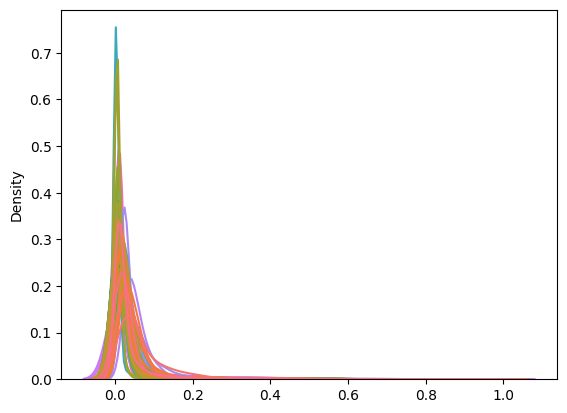

In [151]:
# Minmax 
scaler_minmax = MinMaxScaler().fit(df.drop(["Class"],axis=1))

# transform data
X_train_scaled_minmax = scaler_minmax.transform(df.drop(["Class"],axis=1))

# put them in dataframe 
X_train_scaled_minmax = pd.DataFrame(X_train_scaled_minmax, columns=df.drop(["Class"],axis=1).columns)

# plot
sns.kdeplot(X_train_scaled_minmax,legend=False)
X_train_scaled_minmax.describe()


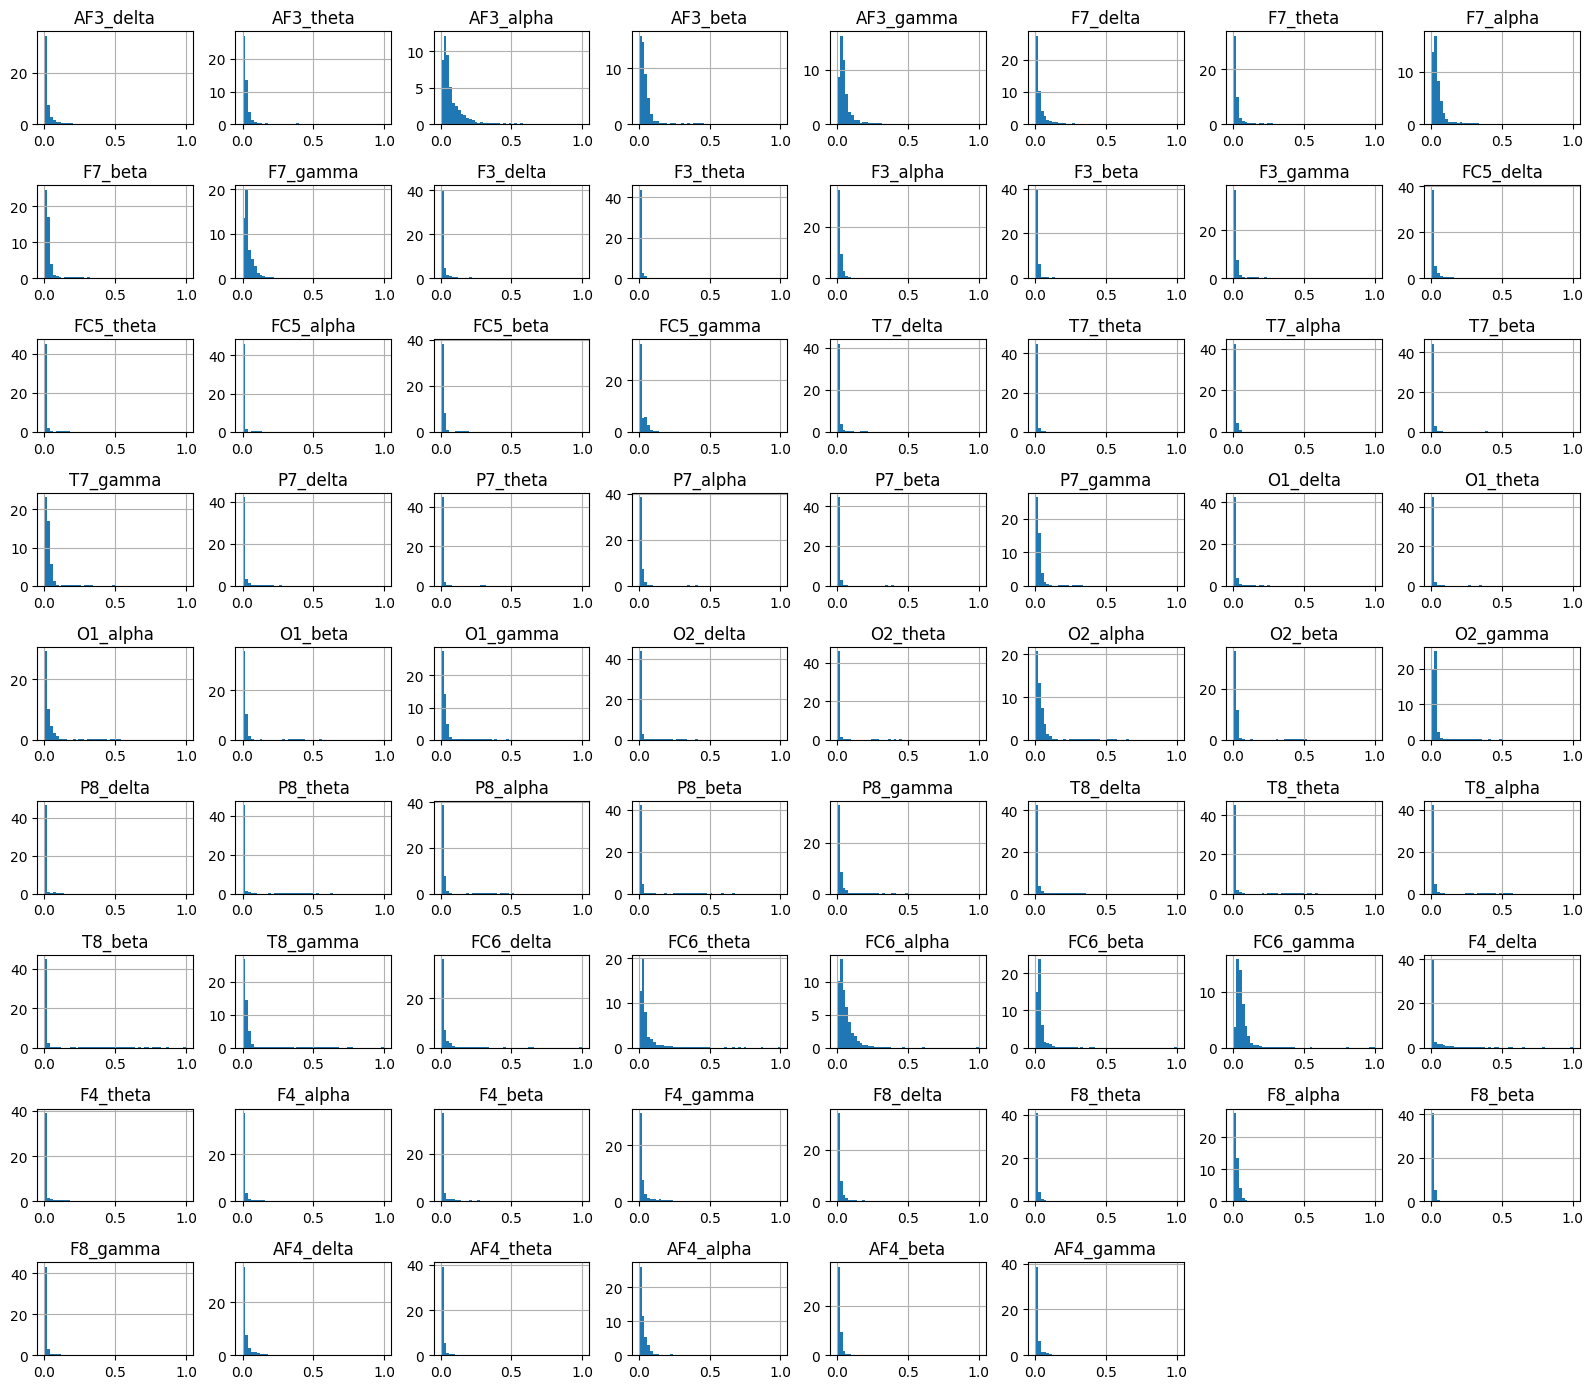

In [152]:
X_train_scaled_minmax.hist(bins=50, density=True, figsize=(16, 14))
plt.tight_layout()
plt.show()

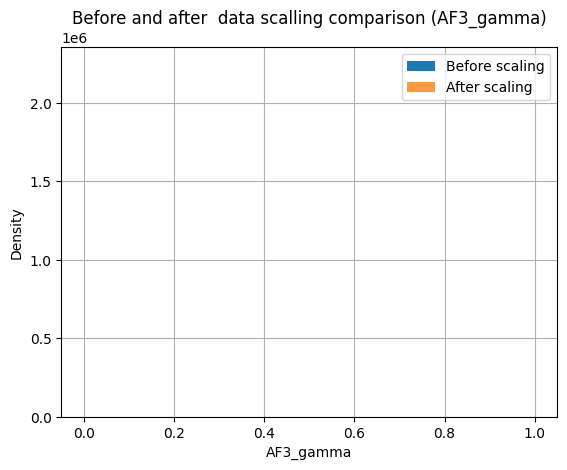

In [153]:
# check the data before and after: Histogram 
fig, ax = plt.subplots()
df['AF3_gamma'].hist(bins=50, density=True)
X_train_scaled_minmax['AF3_gamma'].hist(bins=50, density=True, alpha=0.8)

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after  data scalling comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

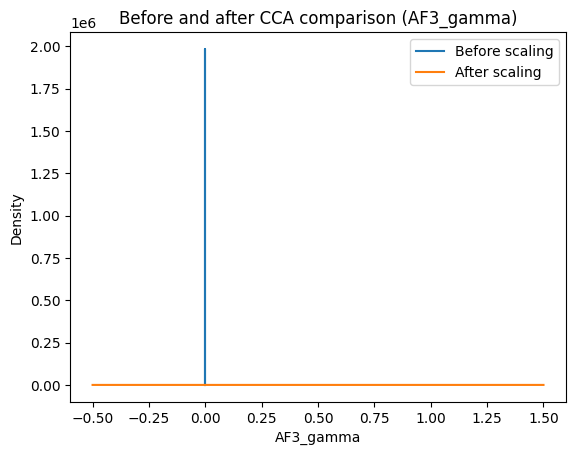

In [154]:
#check the data before and after: Density Plot 
fig, ax = plt.subplots()
df['AF3_gamma'].plot.density()
X_train_scaled_minmax['AF3_gamma'].plot.density()

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after CCA comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

**MaxAbsScaler**

AF3_delta    AF3_theta    AF3_alpha     AF3_beta    AF3_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.031207     0.046443     0.085444     0.068065     0.081107   
std       0.055266     0.089284     0.100865     0.084884     0.059195   
min       0.002351     0.003626     0.006013     0.014616     0.027302   
25%       0.009508     0.014221     0.031052     0.031504     0.050965   
50%       0.014600     0.021834     0.052987     0.045363     0.066288   
75%       0.027724     0.035269     0.098278     0.067842     0.087684   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          F7_delta     F7_theta     F7_alpha      F7_beta     F7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.039467     0.040498     0.055244     0.045275     0.058860   
std       0.061397     0.072354     0.064482     0.055661     0.049619   
min       0.002311     0.003581     0.004808     0.011297     0.016688   
25%       0.011764     0.013505     0.023421     0.023088     0.035594   
50%       0.020056     0.019130     0.035723     0.031269     0.045716   
75%       0.041296     0.030405     0.059694     0.043453     0.066552   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          F3_delta     F3_theta     F3_alpha      F3_beta     F3_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.024888     0.027688     0.038316     0.040151     0.036149   
std       0.062252     0.090103     0.092286     0.103791     0.069843   
min       0.000975     0.001142     0.002000     0.004325     0.006055   
25%       0.004424     0.004084     0.009070     0.010482     0.014192   
50%       0.007070     0.005796     0.014078     0.014073     0.018124   
75%       0.015641     0.010408     0.026706     0.022093     0.026795   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         FC5_delta    FC5_theta    FC5_alpha     FC5_beta    FC5_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.023309     0.012482     0.012637     0.023030     0.030366   
std       0.052147     0.035806     0.030642     0.041279     0.037544   
min       0.001341     0.000730     0.001061     0.004052     0.006428   
25%       0.005327     0.002715     0.003971     0.007739     0.013356   
50%       0.008889     0.003754     0.006146     0.010610     0.017521   
75%       0.019815     0.006842     0.009796     0.022623     0.037321   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          T7_delta     T7_theta     T7_alpha      T7_beta     T7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.022144     0.026136     0.032219     0.033966     0.051057   
std       0.058666     0.089955     0.090218     0.089074     0.072501   
min       0.001499     0.001556     0.003638     0.006209     0.012557   
25%       0.004210     0.004628     0.008482     0.011842     0.026275   
50%       0.006360     0.005942     0.011860     0.014843     0.033504   
75%       0.013000     0.008740     0.018011     0.019182     0.047998   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          P7_delta     P7_theta     P7_alpha      P7_beta     P7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.021622     0.025729     0.033963     0.032834     0.047444   
std       0.058657     0.090233     0.090386     0.089385     0.072214   
min       0.001093     0.001247     0.002300     0.005122     0.011376   
25%       0.003891     0.004212     0.008216     0.010854     0.023584   
50%       0.005847     0.005479     0.012843     0.013451     0.030445   
75%       0.012301     0.007971     0.021123     0.017876     0.041520   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       

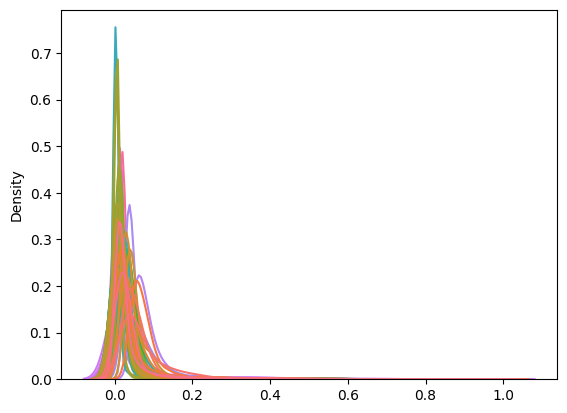

In [155]:
scaler_maxabs = MaxAbsScaler().fit(df.drop(["Class"],axis=1))

# transform data
X_train_scaled_maxabs = scaler_maxabs.transform(df.drop(["Class"],axis=1))

# put them in dataframe 
X_train_scaled_maxabs = pd.DataFrame(X_train_scaled_maxabs, columns=df.drop(["Class"],axis=1).columns)

# plot
sns.kdeplot(X_train_scaled_maxabs,legend=False)
X_train_scaled_maxabs.describe()


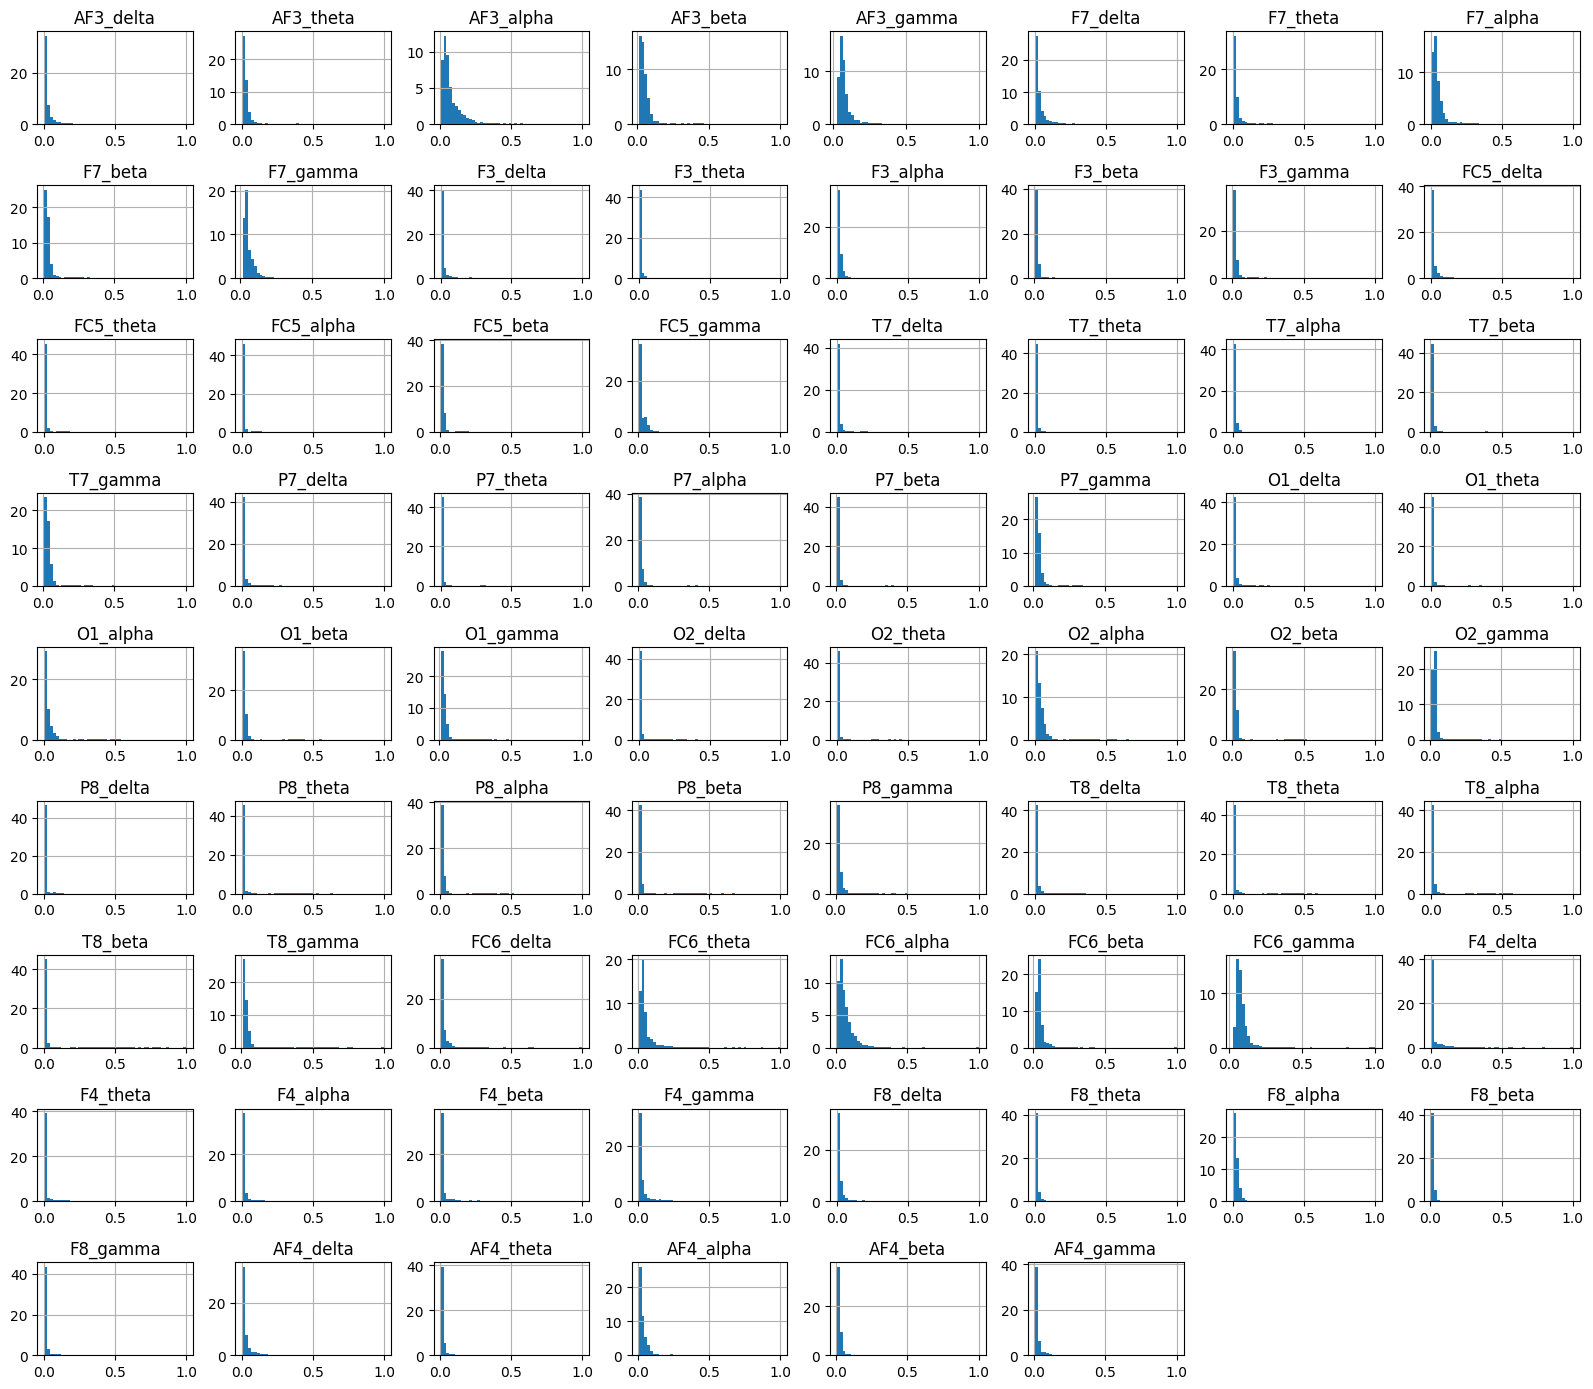

In [156]:
X_train_scaled_maxabs.hist(bins=50, density=True, figsize=(16, 14))
plt.tight_layout()
plt.show()

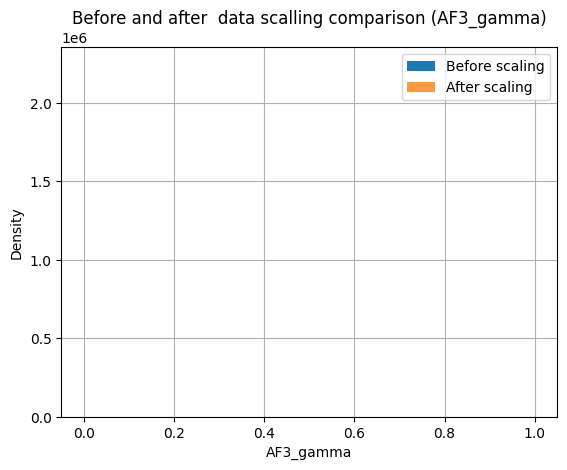

In [157]:
# check the data before and after: Histogram 
fig, ax = plt.subplots()
df['AF3_gamma'].hist(bins=50, density=True)
X_train_scaled_minmax['AF3_gamma'].hist(bins=50, density=True, alpha=0.8)

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after  data scalling comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

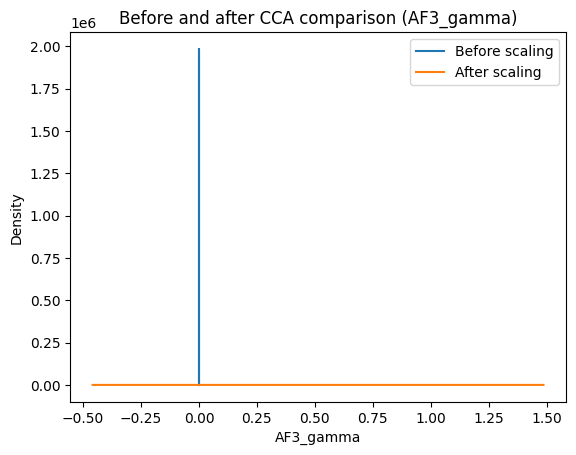

In [158]:
#check the data before and after: Density Plot 
fig, ax = plt.subplots()
df['AF3_gamma'].plot.density()
X_train_scaled_maxabs['AF3_gamma'].plot.density()

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after CCA comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

**StandardScaler**

<Axes: ylabel='Density'>

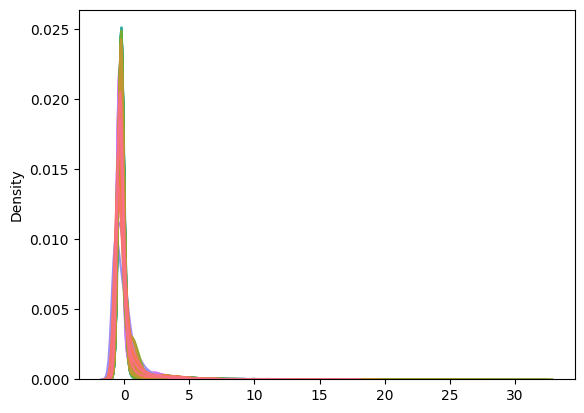

In [159]:
scaler_std = StandardScaler().fit(df.drop(["Class"],axis=1))

# transform data
X_train_scaled_std = scaler_std.transform(df.drop(["Class"],axis=1))

# put them in dataframe 
X_train_scaled_std = pd.DataFrame(X_train_scaled_std, columns=df.drop(["Class"],axis=1).columns)

# plot 
sns.kdeplot(X_train_scaled_std,legend=False)

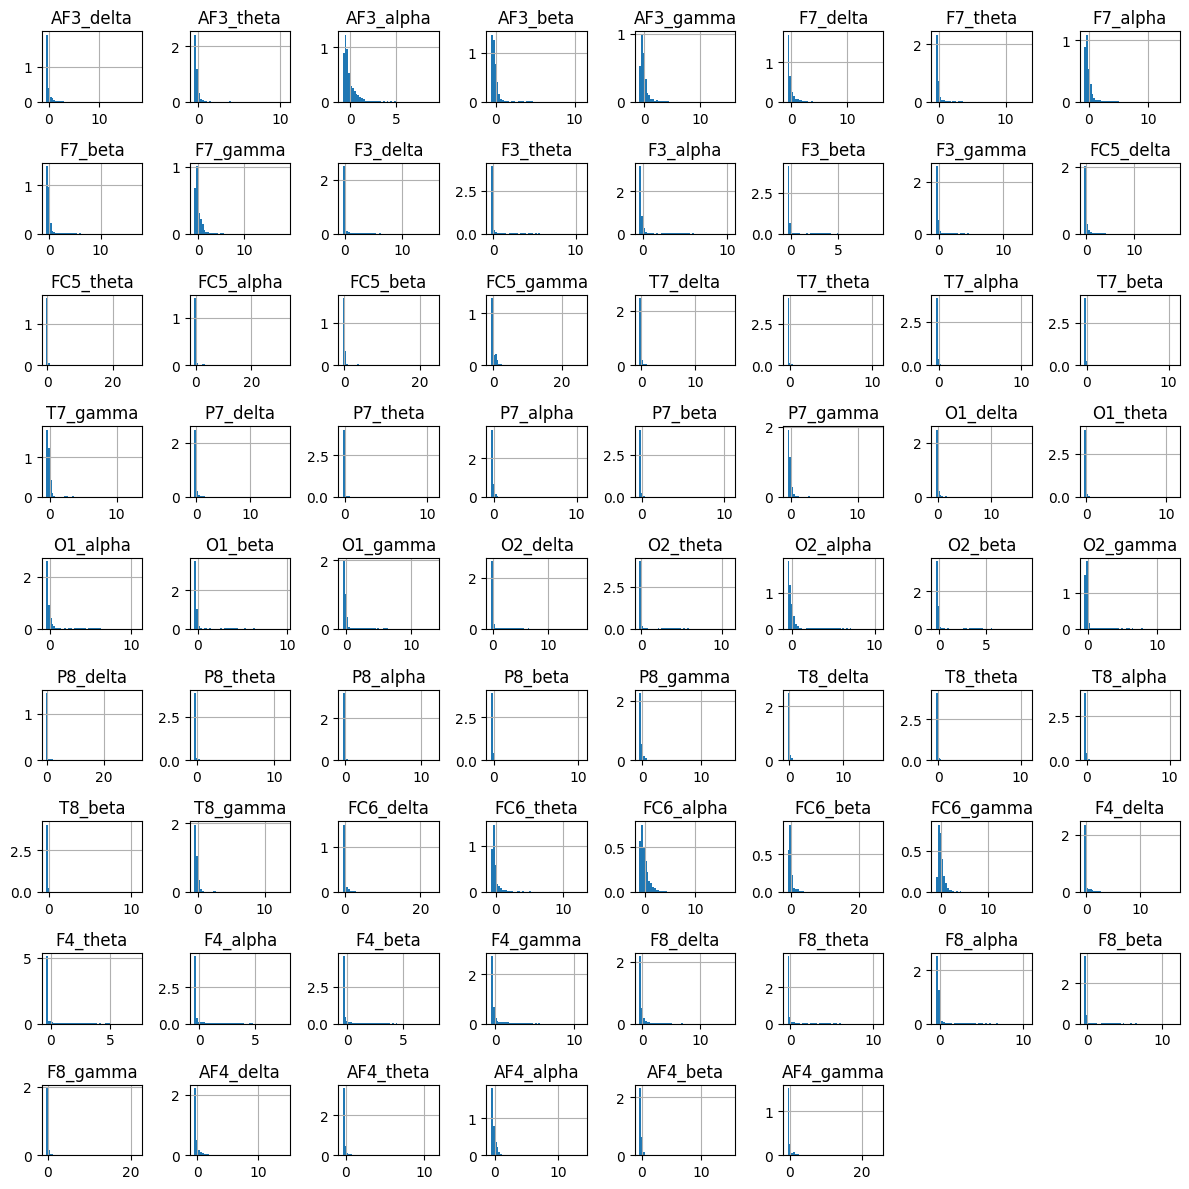

In [160]:
X_train_scaled_std.hist(bins=50, density=True, figsize=(12, 12))
plt.tight_layout()
plt.show()

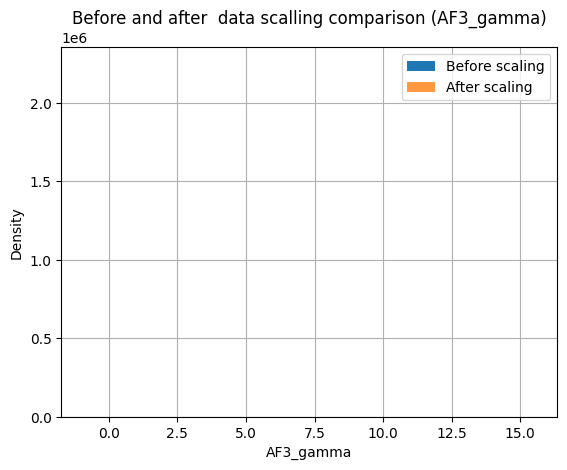

In [161]:
# check the data before and after: Histogram 
fig, ax = plt.subplots()
df['AF3_gamma'].hist(bins=50, density=True)
X_train_scaled_std['AF3_gamma'].hist(bins=50, density=True, alpha=0.8)

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after  data scalling comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

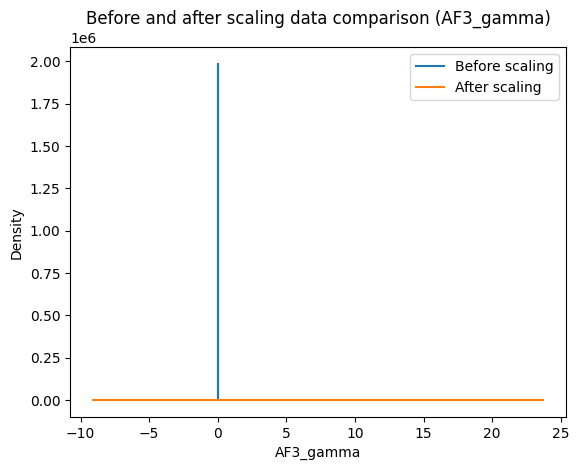

In [162]:
#check the data before and after: Density Plot 
fig, ax = plt.subplots()
df['AF3_gamma'].plot.density()
X_train_scaled_std['AF3_gamma'].plot.density()

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after scaling data comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

# Data scaling using boxcox transformed data

In [163]:
df = df_boxcox
df["Class"]= original_df["Class"]

**Minmax**


AF3_delta    AF3_theta    AF3_alpha     AF3_beta    AF3_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.566913     0.599985     0.527053     0.549706     0.513778   
std       0.166451     0.160975     0.170071     0.179677     0.168829   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.457147     0.496710     0.412049     0.418764     0.397494   
50%       0.555407     0.599728     0.524740     0.555480     0.517200   
75%       0.675516     0.693879     0.643717     0.673315     0.621446   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          F7_delta     F7_theta     F7_alpha      F7_beta     F7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.556283     0.647316     0.566807     0.537680     0.528631   
std       0.161823     0.148359     0.145690     0.176143     0.159456   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.442641     0.553828     0.471493     0.421052     0.422658   
50%       0.549991     0.641855     0.564086     0.543411     0.521740   
75%       0.672602     0.734859     0.662154     0.648959     0.642754   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          F3_delta     F3_theta     F3_alpha      F3_beta     F3_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.616732     0.635900     0.616503     0.611618     0.640064   
std       0.165749     0.162027     0.156564     0.170815     0.157947   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.502060     0.533043     0.514372     0.498448     0.535074   
50%       0.602370     0.622533     0.610984     0.602498     0.627631   
75%       0.732488     0.736977     0.722623     0.722752     0.739714   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         FC5_delta    FC5_theta    FC5_alpha     FC5_beta    FC5_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.572557     0.669639     0.568445     0.522763     0.548785   
std       0.172668     0.146556     0.154263     0.207997     0.189903   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.446219     0.572694     0.469629     0.360568     0.409286   
50%       0.560300     0.654289     0.572965     0.487179     0.515733   
75%       0.699426     0.767356     0.662930     0.701251     0.725666   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          T7_delta     T7_theta     T7_alpha      T7_beta     T7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.577287     0.678008     0.572229     0.604209     0.599962   
std       0.189122     0.142619     0.176998     0.163999     0.159085   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.440889     0.588280     0.454394     0.496871     0.491765   
50%       0.558804     0.664454     0.572198     0.604695     0.594693   
75%       0.710025     0.755699     0.685323     0.699655     0.711381   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          P7_delta     P7_theta     P7_alpha      P7_beta     P7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.593066     0.675712     0.604944     0.626556     0.587121   
std       0.177774     0.142121     0.158052     0.154245     0.165044   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.474544     0.592364     0.495670     0.530276     0.479663   
50%       0.574833     0.664745     0.606943     0.621820     0.587526   
75%       0.714326     0.746716     0.704795     0.716591     0.690067   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       

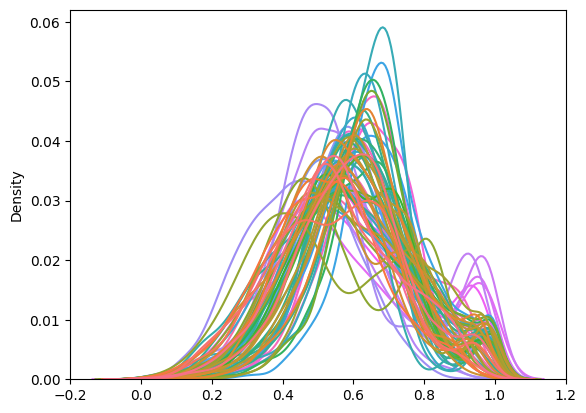

In [164]:
# Minmax 
scaler_minmax = MinMaxScaler().fit(df.drop(["Class"],axis=1))

# transform data
X_train_scaled_minmax = scaler_minmax.transform(df.drop(["Class"],axis=1))

# put them in dataframe 
X_train_scaled_minmax = pd.DataFrame(X_train_scaled_minmax, columns=df.drop(["Class"],axis=1).columns)

# plot
sns.kdeplot(X_train_scaled_minmax,legend=False)
X_train_scaled_minmax.describe()


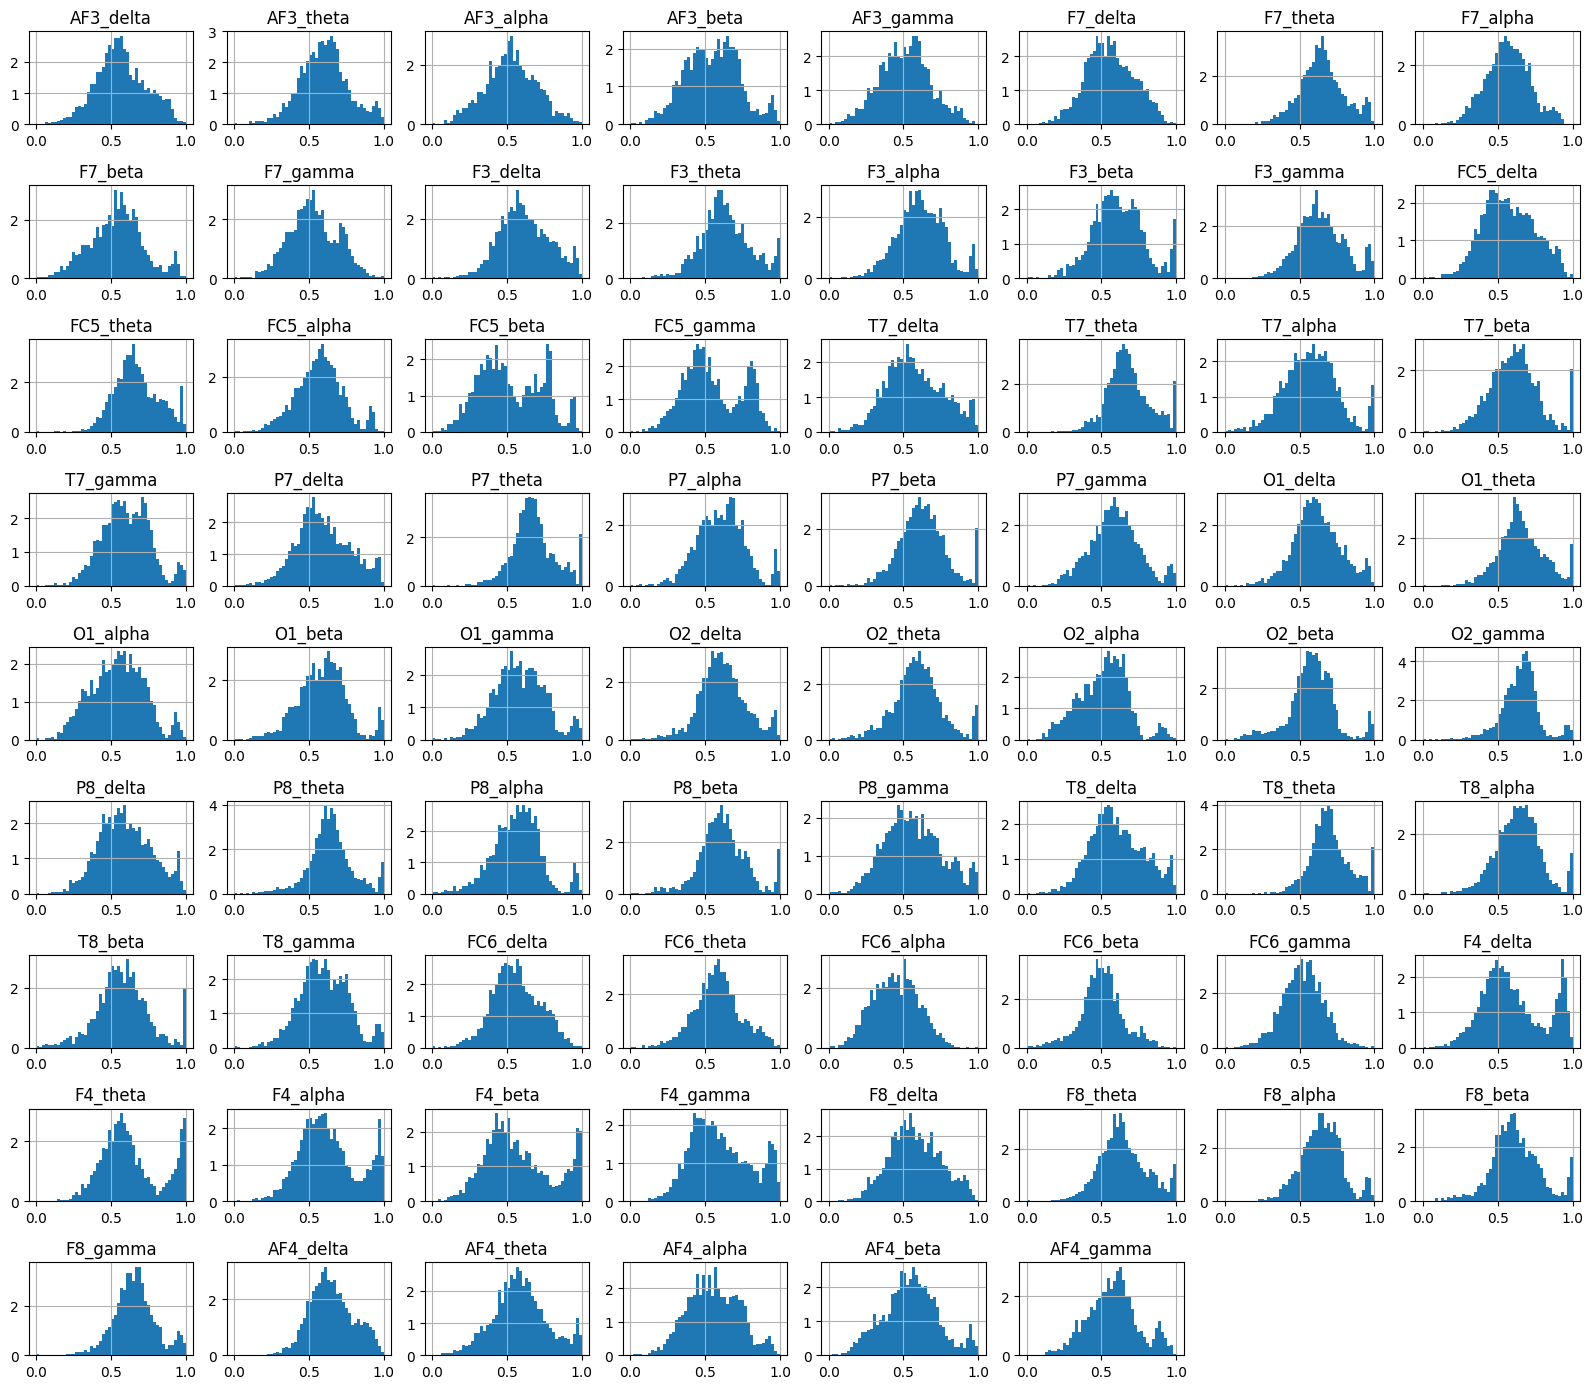

In [165]:
X_train_scaled_minmax.hist(bins=50, density=True, figsize=(16, 14))
plt.tight_layout()
plt.show()

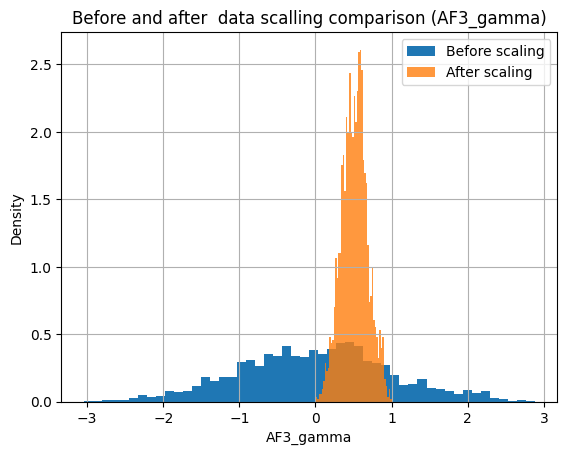

In [166]:
# check the data before and after: Histogram 
fig, ax = plt.subplots()
df['AF3_gamma'].hist(bins=50, density=True)
X_train_scaled_minmax['AF3_gamma'].hist(bins=50, density=True, alpha=0.8)

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after  data scalling comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

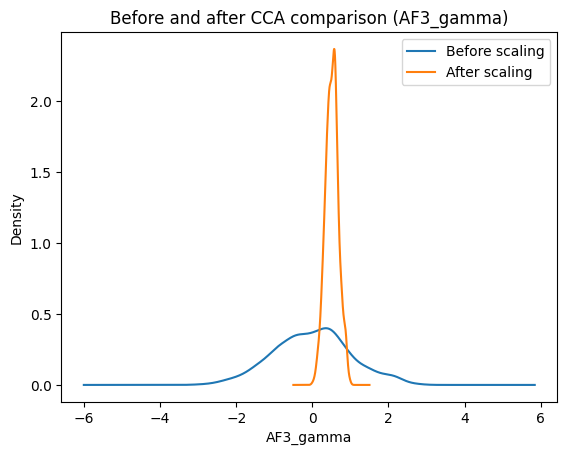

In [167]:
#check the data before and after: Density Plot 
fig, ax = plt.subplots()
df['AF3_gamma'].plot.density()
X_train_scaled_minmax['AF3_gamma'].plot.density()

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after CCA comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

**MaxAbsScaler**

AF3_delta     AF3_theta     AF3_alpha      AF3_beta     AF3_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   5.278317e-17  1.556427e-16 -3.843698e-16 -1.390634e-16  2.436147e-17   
std    2.936087e-01  2.682986e-01  3.226836e-01  3.268599e-01  3.286027e-01   
min   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
25%   -1.936220e-01 -1.721300e-01 -2.182027e-01 -2.382024e-01 -2.263319e-01   
50%   -2.029571e-02 -4.294620e-04 -4.388558e-03  1.050445e-02  6.659559e-03   
75%    1.915684e-01  1.564931e-01  2.213498e-01  2.248647e-01  2.095596e-01   
max    7.639379e-01  6.667075e-01  8.973409e-01  8.191554e-01  9.463641e-01   

           F7_delta      F7_theta      F7_alpha       F7_beta      F7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   4.161750e-17  3.383537e-18  7.443781e-17 -9.473903e-18  5.413659e-18   
std    2.909008e-01  2.291907e-01  2.570368e-01  3.275976e-01  3.016396e-01   
min   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
25%   -2.042883e-01 -1.444239e-01 -1.681595e-01 -2.169086e-01 -2.004662e-01   
50%   -1.131116e-02 -8.436027e-03 -4.801963e-03  1.065980e-02 -1.303546e-02   
75%    2.090999e-01  1.352402e-01  1.682162e-01  2.069625e-01  2.158843e-01   
max    7.976459e-01  5.448413e-01  7.642675e-01  8.598435e-01  8.916798e-01   

           F3_delta      F3_theta      F3_alpha       F3_beta      F3_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   6.496391e-17 -2.503817e-17 -4.567775e-17 -4.043327e-17 -8.188159e-17   
std    2.687543e-01  2.547991e-01  2.539557e-01  2.792842e-01  2.467676e-01   
min   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
25%   -1.859346e-01 -1.617511e-01 -1.656622e-01 -1.850335e-01 -1.640306e-01   
50%   -2.328666e-02 -2.102063e-02 -8.951597e-03 -1.491142e-02 -1.942552e-02   
75%    1.876933e-01  1.589506e-01  1.721330e-01  1.817051e-01  1.556871e-01   
max    6.214499e-01  5.725738e-01  6.220527e-01  6.350085e-01  5.623435e-01   

          FC5_delta     FC5_theta     FC5_alpha      FC5_beta     FC5_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean  -1.211306e-16  2.943677e-17  3.045183e-18  5.752013e-17 -1.069198e-16   
std    3.015743e-01  2.188575e-01  2.713771e-01  3.978809e-01  3.460433e-01   
min   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
25%   -2.206564e-01 -1.447718e-01 -1.738355e-01 -3.102647e-01 -2.541959e-01   
50%   -2.140715e-02 -2.292289e-02  7.951176e-03 -6.806899e-02 -6.022701e-02   
75%    2.215840e-01  1.459248e-01  1.662173e-01  3.414313e-01  3.223132e-01   
max    7.465514e-01  4.933414e-01  7.591860e-01  9.129119e-01  8.222069e-01   

           T7_delta      T7_theta      T7_alpha       T7_beta      T7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   3.654220e-17 -4.635445e-17  7.985147e-17 -2.774500e-17  6.124202e-17   
std    3.276043e-01  2.103505e-01  3.093139e-01  2.714283e-01  2.651575e-01   
min   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
25%   -2.362750e-01 -1.323398e-01 -2.059219e-01 -1.776512e-01 -1.803409e-01   
50%   -3.201726e-02 -1.999084e-02 -5.354494e-05  8.039920e-04 -8.783403e-03   
75%    2.299326e-01  1.145869e-01  1.976382e-01  1.579682e-01  1.857095e-01   
max    7.322392e-01  4.749093e-01  7.475525e-01  6.550562e-01  6.667710e-01   

           P7_delta      P7_theta      P7_alpha       P7_beta      P7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean  -6.902415e-17  1.184238e-18 -6.090366e-18 -4.939964e-17 -2.706829e-17   
std    2.997537e-01  2.103282e-01  2.612675e-01  2.461784e-01  2.811068e-01   
min   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00   
25%   -1.998463e-01 -1.233489e-01 -1.806345e-01 -1.5366

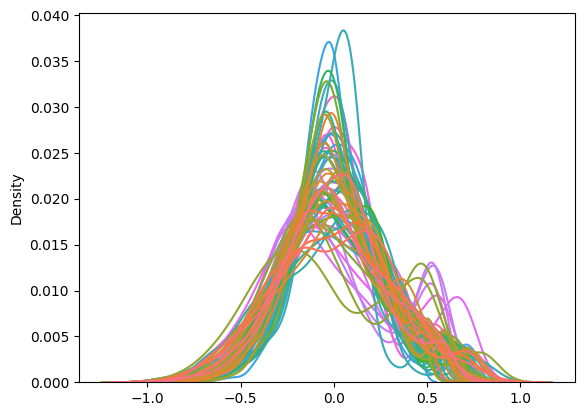

In [168]:
scaler_maxabs = MaxAbsScaler().fit(df.drop(["Class"],axis=1))

# transform data
X_train_scaled_maxabs = scaler_maxabs.transform(df.drop(["Class"],axis=1))

# put them in dataframe 
X_train_scaled_maxabs = pd.DataFrame(X_train_scaled_maxabs, columns=df.drop(["Class"],axis=1).columns)

# plot
sns.kdeplot(X_train_scaled_maxabs,legend=False)
X_train_scaled_maxabs.describe()


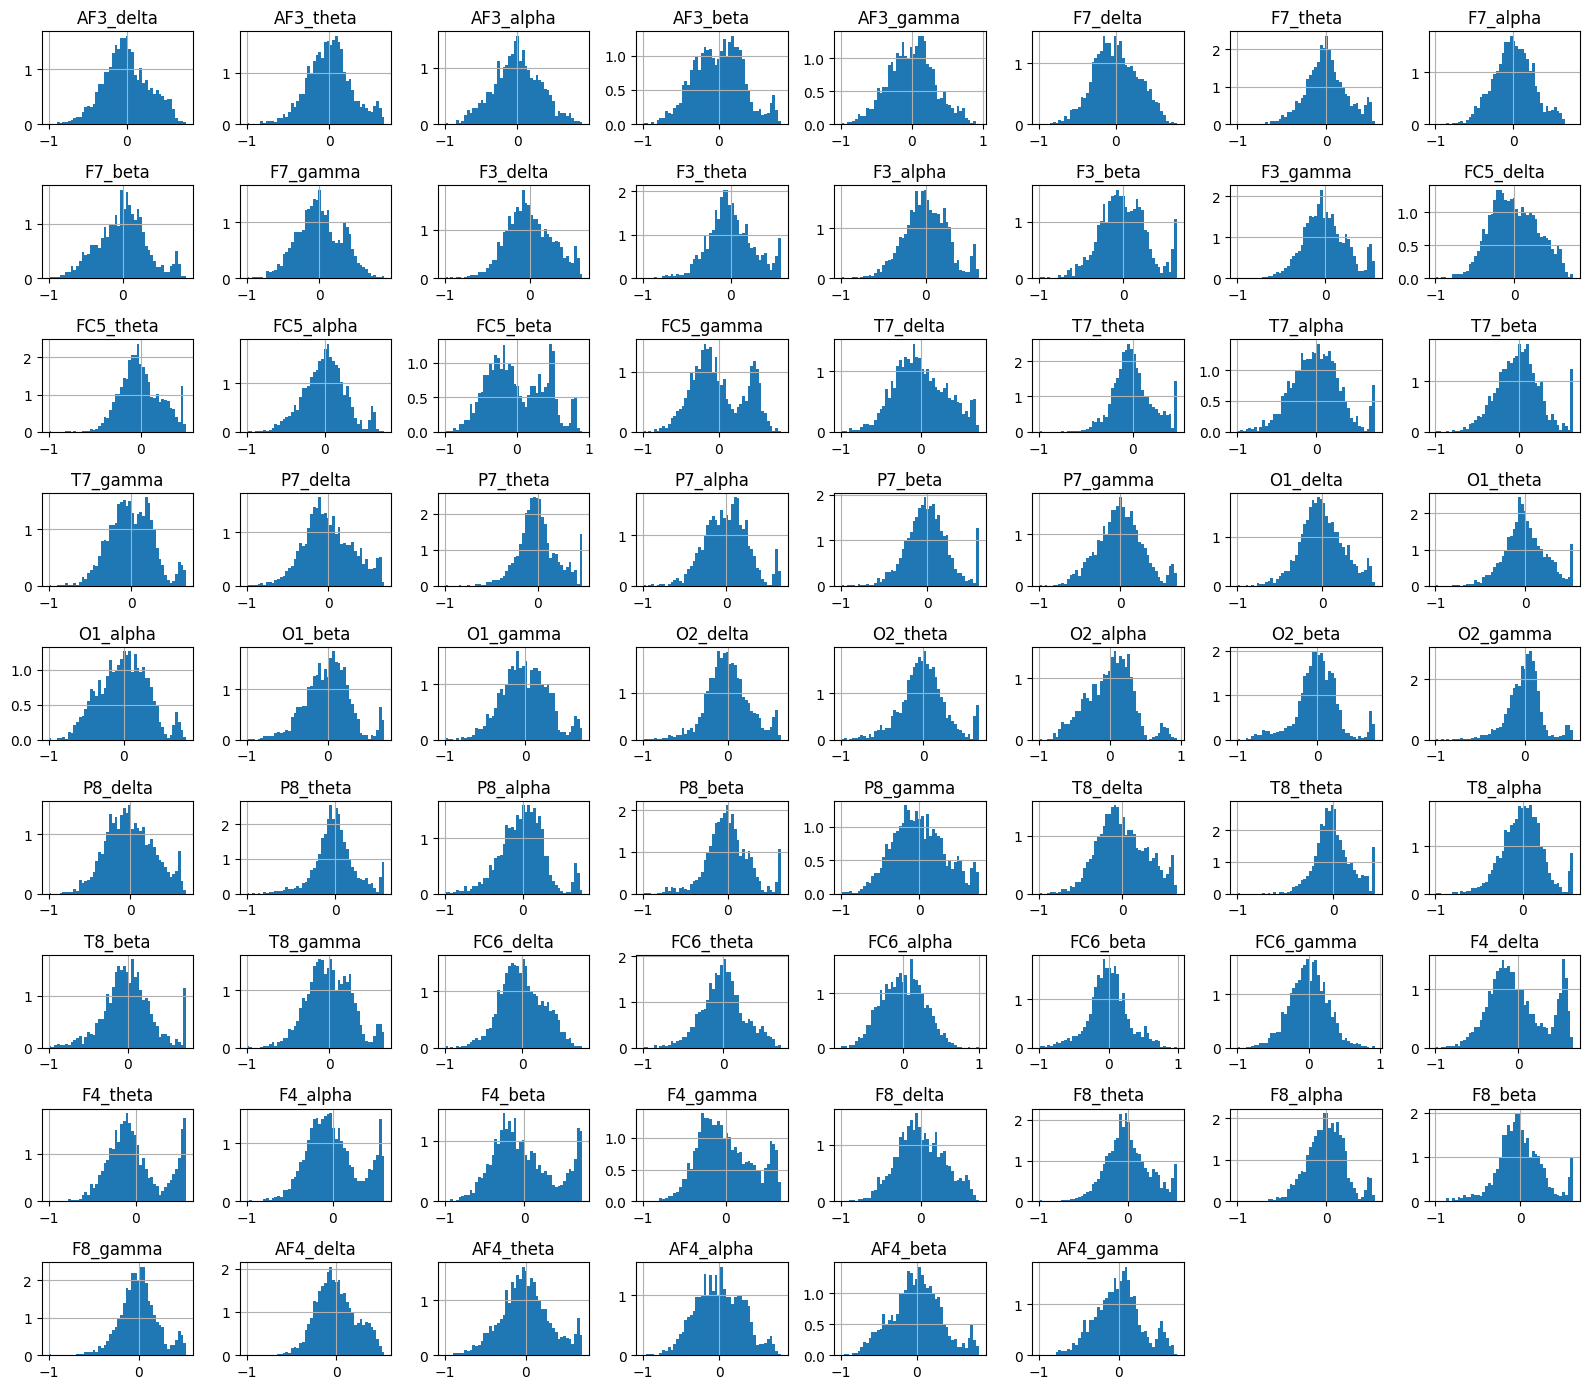

In [169]:
X_train_scaled_maxabs.hist(bins=50, density=True, figsize=(16, 14))
plt.tight_layout()
plt.show()

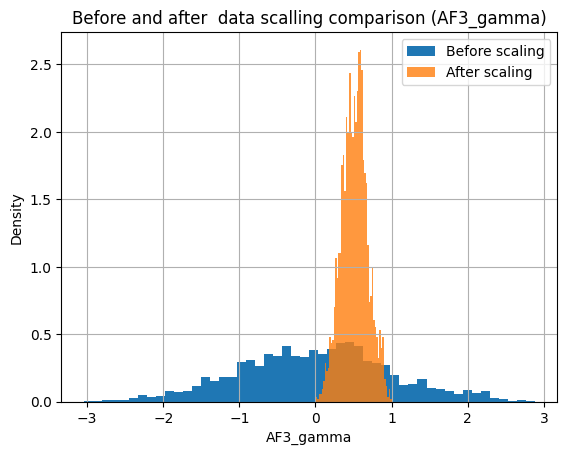

In [170]:
# check the data before and after: Histogram 
fig, ax = plt.subplots()
df['AF3_gamma'].hist(bins=50, density=True)
X_train_scaled_minmax['AF3_gamma'].hist(bins=50, density=True, alpha=0.8)

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after  data scalling comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

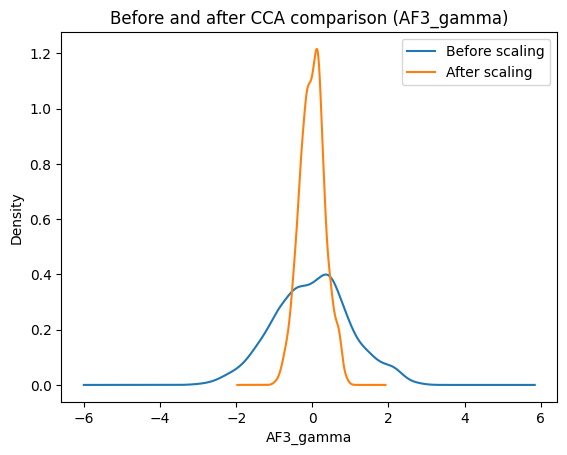

In [171]:
#check the data before and after: Density Plot 
fig, ax = plt.subplots()
df['AF3_gamma'].plot.density()
X_train_scaled_maxabs['AF3_gamma'].plot.density()

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after CCA comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

**StandardScaler**

<Axes: ylabel='Density'>

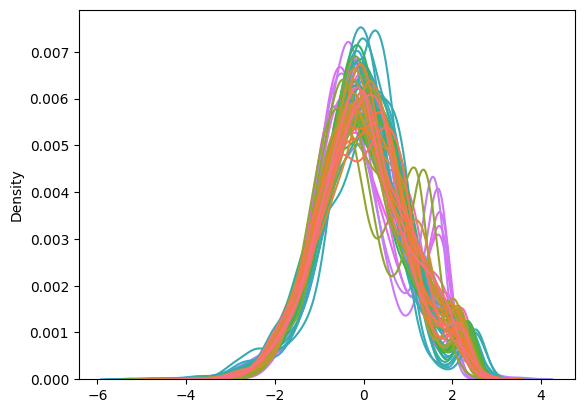

In [172]:
scaler_std = StandardScaler().fit(df.drop(["Class"],axis=1))

# transform data
X_train_scaled_std = scaler_std.transform(df.drop(["Class"],axis=1))

# put them in dataframe 
X_train_scaled_std = pd.DataFrame(X_train_scaled_std, columns=df.drop(["Class"],axis=1).columns)

# plot 
sns.kdeplot(X_train_scaled_std,legend=False)

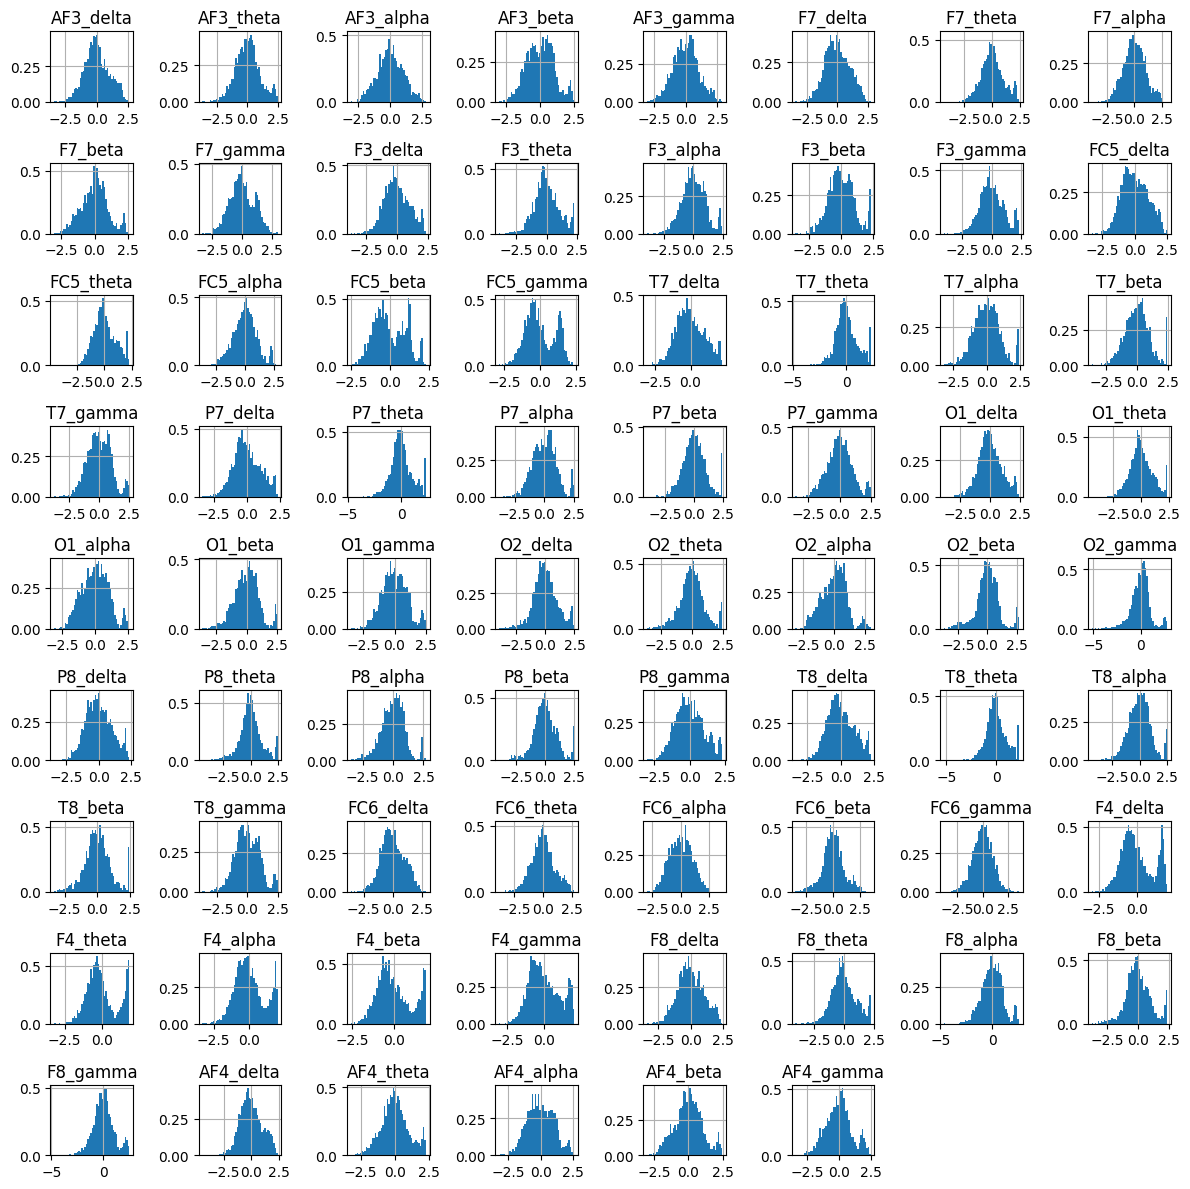

In [173]:
X_train_scaled_std.hist(bins=50, density=True, figsize=(12, 12))
plt.tight_layout()
plt.show()

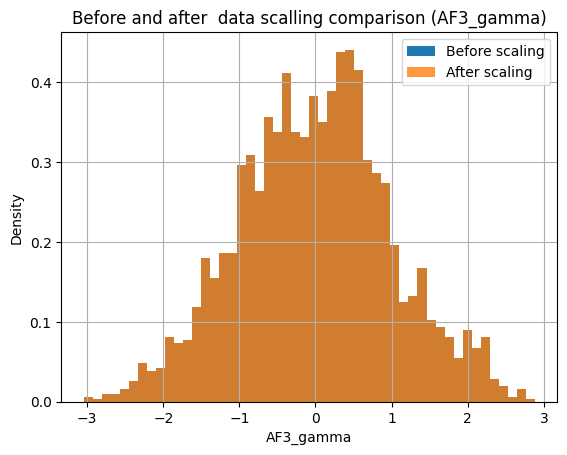

In [174]:
# check the data before and after: Histogram 
fig, ax = plt.subplots()
df['AF3_gamma'].hist(bins=50, density=True)
X_train_scaled_std['AF3_gamma'].hist(bins=50, density=True, alpha=0.8)

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after  data scalling comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

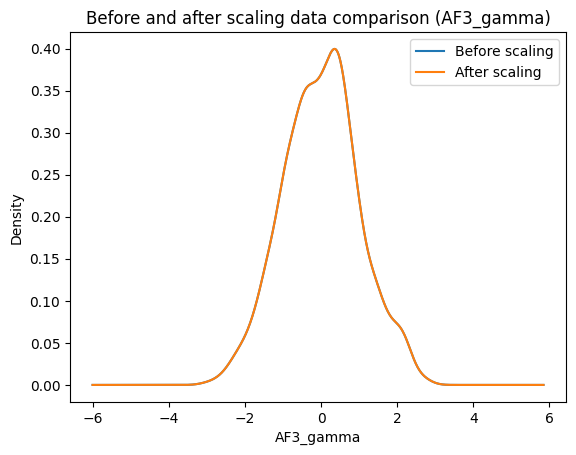

In [175]:
#check the data before and after: Density Plot 
fig, ax = plt.subplots()
df['AF3_gamma'].plot.density()
X_train_scaled_std['AF3_gamma'].plot.density()

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after scaling data comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

# Data scaling using yeo_john transformed data

In [176]:
df = df_yeo_john
df["Class"]= original_df["Class"]

**Minmax**

AF3_delta    AF3_theta    AF3_alpha     AF3_beta    AF3_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.036527     0.062349     0.138559     0.089275     0.106947   
std       0.111836     0.185266     0.218581     0.187480     0.148703   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.001426     0.003173     0.015477     0.013005     0.030651   
50%       0.003484     0.007761     0.045515     0.030528     0.059478   
75%       0.012745     0.020475     0.149336     0.071125     0.110169   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          F7_delta     F7_theta     F7_alpha      F7_beta     F7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.049861     0.056135     0.074328     0.051203     0.065117   
std       0.128452     0.169633     0.157760     0.137204     0.104838   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.002234     0.002847     0.008793     0.006791     0.016465   
50%       0.006649     0.005919     0.020840     0.014185     0.029990   
75%       0.028171     0.015207     0.057771     0.029157     0.067389   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          F3_delta     F3_theta     F3_alpha      F3_beta     F3_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.036175     0.042595     0.051624     0.054256     0.043950   
std       0.140271     0.177893     0.186598     0.197601     0.146716   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000313     0.000258     0.001315     0.001533     0.002765   
50%       0.000824     0.000543     0.003259     0.003011     0.004895   
75%       0.004088     0.001797     0.011850     0.007860     0.011388   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         FC5_delta    FC5_theta    FC5_alpha     FC5_beta    FC5_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.025823     0.014470     0.010679     0.023713     0.025856   
std       0.095925     0.069256     0.051711     0.089220     0.070374   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000447     0.000115     0.000246     0.000731     0.002305   
50%       0.001297     0.000228     0.000616     0.001615     0.004458   
75%       0.006548     0.000778     0.001593     0.008293     0.022464   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          T7_delta     T7_theta     T7_alpha      T7_beta     T7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.031324     0.039511     0.042840     0.042247     0.056987   
std       0.130366     0.177210     0.181523     0.177749     0.156976   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000260     0.000319     0.000987     0.001708     0.008916   
50%       0.000642     0.000553     0.002139     0.003050     0.016086   
75%       0.002799     0.001242     0.005217     0.005521     0.035435   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          P7_delta     P7_theta     P7_alpha      P7_beta     P7_gamma  \
count  2625.000000  2625.000000  2625.000000  2625.000000  2625.000000   
mean      0.031053     0.039517     0.044571     0.041789     0.053009   
std       0.130104     0.177394     0.181441     0.177679     0.156498   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000234     0.000272     0.001045     0.001538     0.007147   
50%       0.000554     0.000478     0.002680     0.002596     0.013321   
75%       0.002520     0.001041     0.007383     0.004918     0.026446   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

       

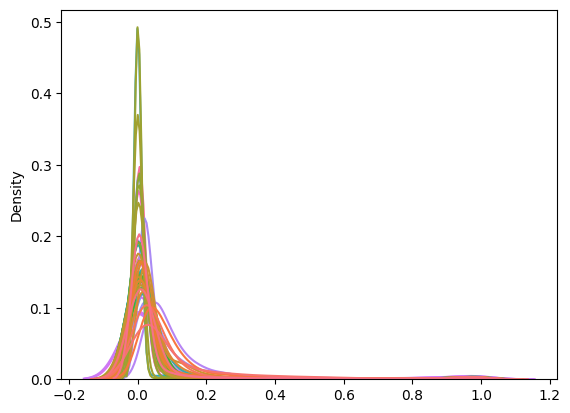

In [177]:
# Minmax 
scaler_minmax = MinMaxScaler().fit(df.drop(["Class"],axis=1))

# transform data
X_train_scaled_minmax = scaler_minmax.transform(df.drop(["Class"],axis=1))

# put them in dataframe 
X_train_scaled_minmax = pd.DataFrame(X_train_scaled_minmax, columns=df.drop(["Class"],axis=1).columns)

# plot
sns.kdeplot(X_train_scaled_minmax,legend=False)
X_train_scaled_minmax.describe()

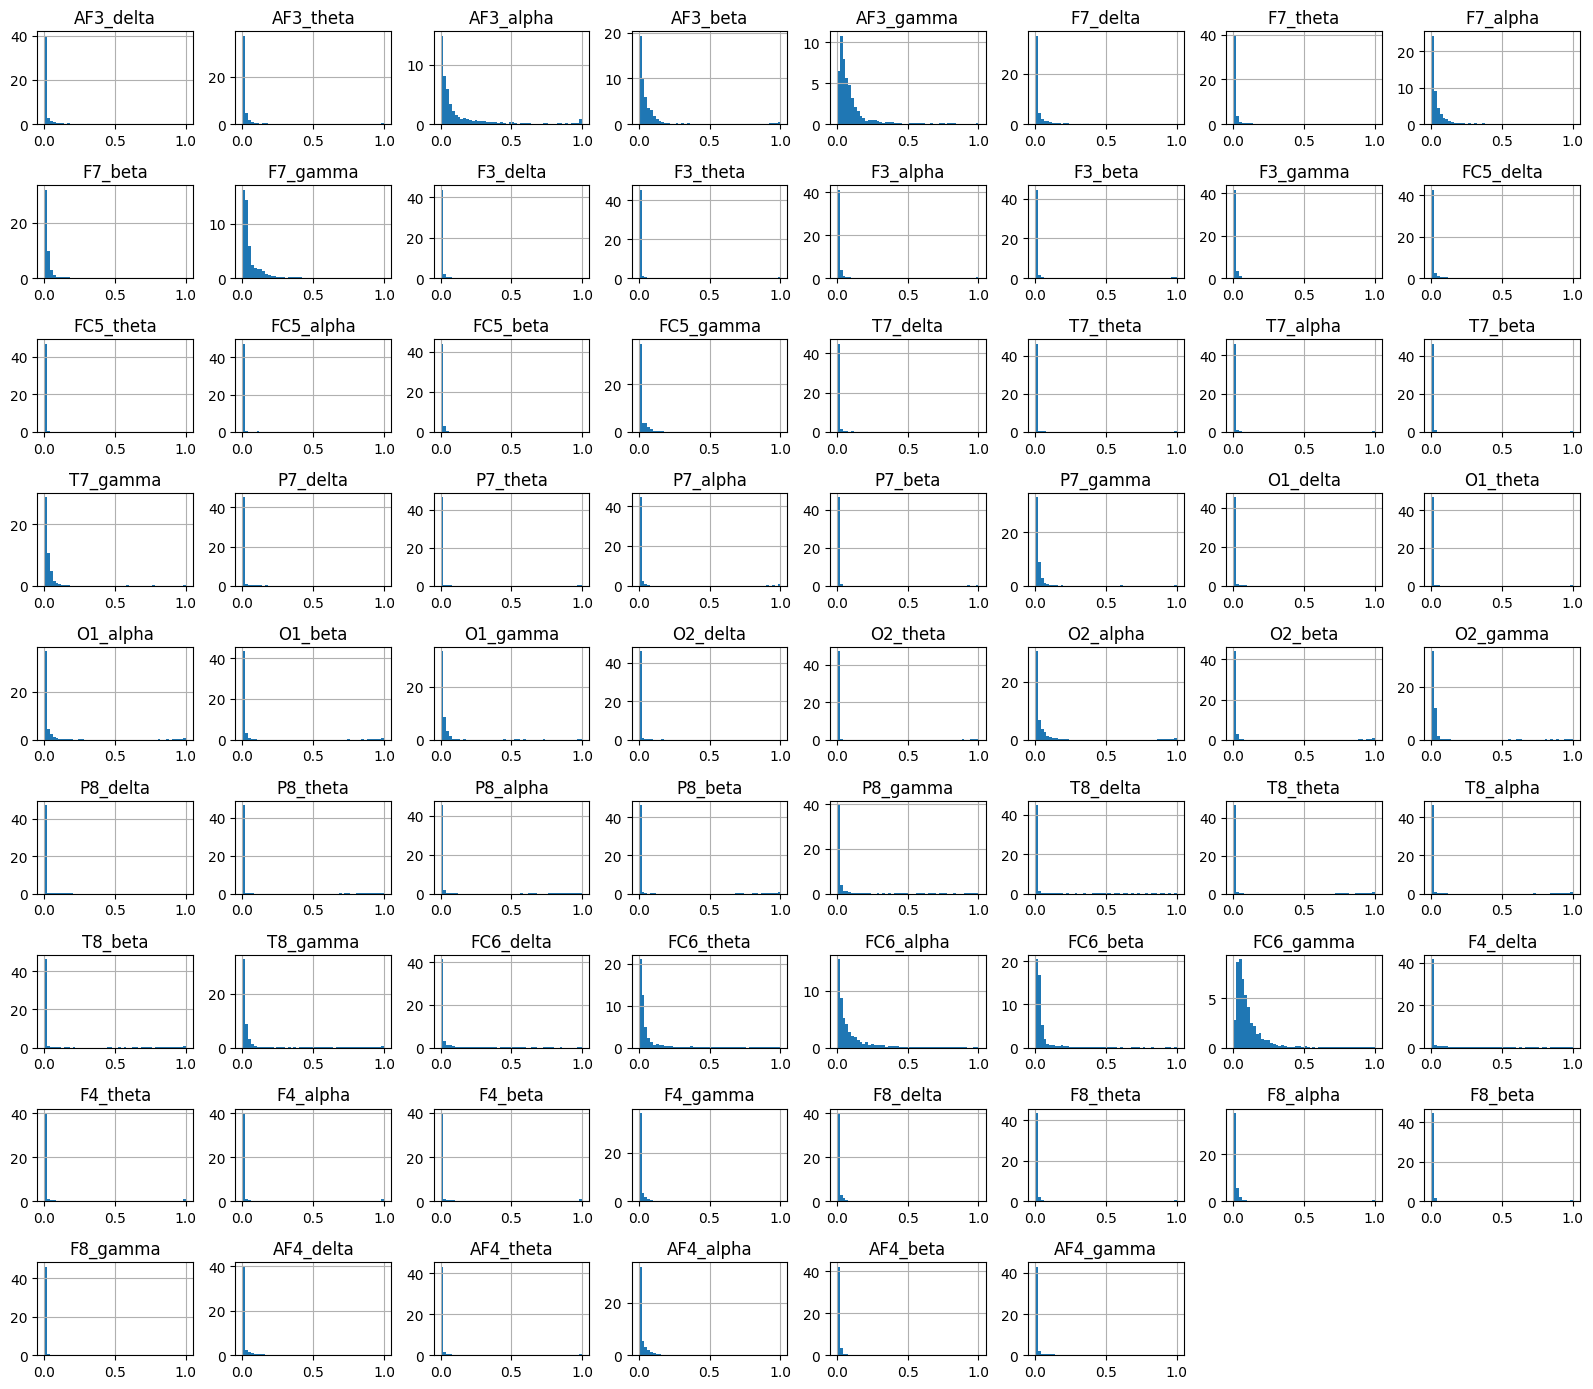

In [178]:
X_train_scaled_minmax.hist(bins=50, density=True, figsize=(16, 14))
plt.tight_layout()
plt.show()

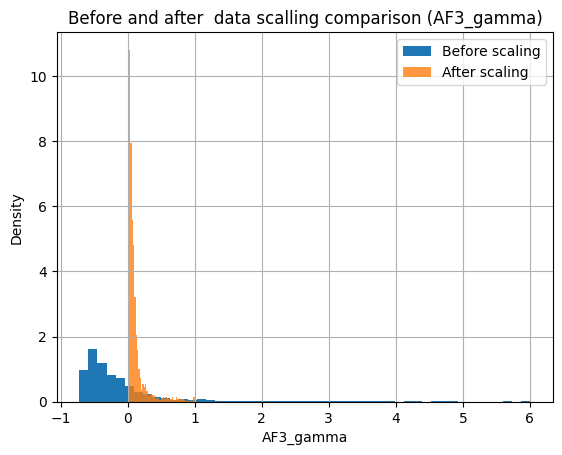

In [179]:
# check the data before and after: Histogram 
fig, ax = plt.subplots()
df['AF3_gamma'].hist(bins=50, density=True)
X_train_scaled_minmax['AF3_gamma'].hist(bins=50, density=True, alpha=0.8)

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after  data scalling comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

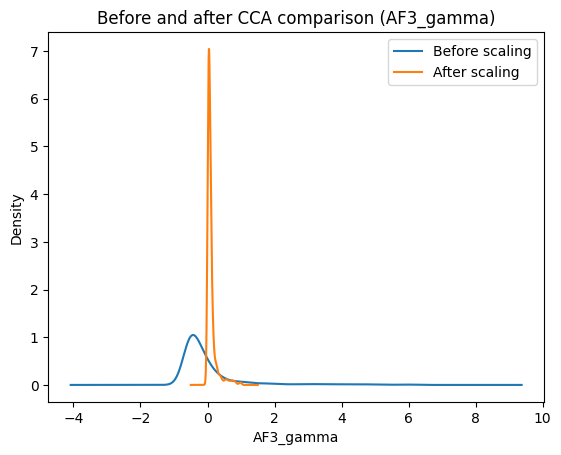

In [180]:
#check the data before and after: Density Plot 
fig, ax = plt.subplots()
df['AF3_gamma'].plot.density()
X_train_scaled_minmax['AF3_gamma'].plot.density()

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after CCA comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

**MaxAbsScaler**

AF3_delta     AF3_theta     AF3_alpha      AF3_beta     AF3_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   6.767074e-19  2.368476e-18  1.759439e-17  1.015061e-17 -1.894781e-17   
std    1.160755e-01  1.975857e-01  2.537388e-01  2.058575e-01  1.665113e-01   
min   -3.791233e-02 -6.649527e-02 -1.608451e-01 -9.802609e-02 -1.197544e-01   
25%   -3.643278e-02 -6.311091e-02 -1.428783e-01 -8.374666e-02 -8.543242e-02   
50%   -3.429612e-02 -5.821788e-02 -1.080097e-01 -6.450592e-02 -5.315336e-02   
75%   -2.468453e-02 -4.465874e-02  1.251087e-02 -1.992896e-02  3.608219e-03   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

           F7_delta      F7_theta      F7_alpha       F7_beta      F7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   7.274604e-18  2.030122e-18  1.353415e-18  2.537653e-18 -9.473903e-18   
std    1.351931e-01  1.797220e-01  1.704271e-01  1.446086e-01  1.121398e-01   
min   -5.247813e-02 -5.947315e-02 -8.029589e-02 -5.396657e-02 -6.965295e-02   
25%   -5.012700e-02 -5.645707e-02 -7.079670e-02 -4.680933e-02 -5.204105e-02   
50%   -4.548023e-02 -5.320200e-02 -5.778232e-02 -3.901581e-02 -3.757365e-02   
75%   -2.282838e-02 -4.336167e-02 -1.788603e-02 -2.323650e-02  2.430339e-03   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

           F3_delta      F3_theta      F3_alpha      F3_beta      F3_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2625.000000  2.625000e+03   
mean   6.767074e-18  1.691768e-18  1.691768e-18     0.000000 -1.691768e-19   
std    1.455354e-01  1.858076e-01  1.967556e-01     0.208938  1.534606e-01   
min   -3.753244e-02 -4.449002e-02 -5.443362e-02    -0.057368 -4.597044e-02   
25%   -3.720768e-02 -4.422007e-02 -5.304748e-02    -0.055748 -4.307883e-02   
50%   -3.667758e-02 -4.392320e-02 -5.099751e-02    -0.054185 -4.085033e-02   
75%   -3.329125e-02 -4.261276e-02 -4.193822e-02    -0.049058 -3.405917e-02   
max    1.000000e+00  1.000000e+00  1.000000e+00     1.000000  1.000000e+00   

          FC5_delta     FC5_theta     FC5_alpha      FC5_beta     FC5_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean  -6.767074e-19  1.691768e-18  8.458842e-19 -6.767074e-19 -5.413659e-18   
std    9.846797e-02  7.027267e-02  5.226900e-02  9.138676e-02  7.224235e-02   
min   -2.650741e-02 -1.468253e-02 -1.079422e-02 -2.428872e-02 -2.654227e-02   
25%   -2.604892e-02 -1.456595e-02 -1.054551e-02 -2.354005e-02 -2.417643e-02   
50%   -2.517581e-02 -1.445131e-02 -1.017167e-02 -2.263415e-02 -2.196561e-02   
75%   -1.978572e-02 -1.389348e-02 -9.184064e-03 -1.579457e-02 -3.481911e-03   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

           T7_delta      T7_theta      T7_alpha       T7_beta      T7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean   4.398598e-18 -3.383537e-19 -2.368476e-18  4.060244e-18  5.075305e-18   
std    1.345817e-01  1.844997e-01  1.896480e-01  1.855894e-01  1.664619e-01   
min   -3.233715e-02 -4.113580e-02 -4.475778e-02 -4.411022e-02 -6.043102e-02   
25%   -3.206867e-02 -4.080341e-02 -4.372708e-02 -4.232716e-02 -5.097659e-02   
50%   -3.167439e-02 -4.056053e-02 -4.252254e-02 -4.092550e-02 -4.337302e-02   
75%   -2.944784e-02 -3.984222e-02 -3.930778e-02 -3.834569e-02 -2.285458e-02   
max    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   

           P7_delta      P7_theta      P7_alpha       P7_beta      P7_gamma  \
count  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03  2.625000e+03   
mean  -6.767074e-19  2.706829e-18  4.398598e-18 -5.752013e-18  4.398598e-18   
std    1.342740e-01  1.846925e-01  1.899053e-01  1.854277e-01  1.652582e-01   
min   -3.204797e-02 -4.114249e-02 -4.665025e-02 -4.361141e-02 -5.597577e-02   
25%   -3.180603e-02 -4.085930e-02 -4.555614e-02 -4.200628e-02 -4

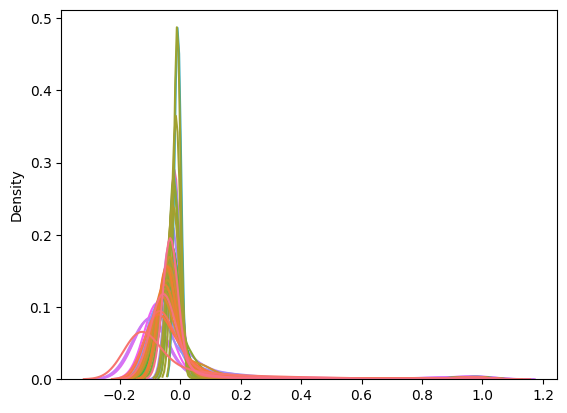

In [181]:
scaler_maxabs = MaxAbsScaler().fit(df.drop(["Class"],axis=1))

# transform data
X_train_scaled_maxabs = scaler_maxabs.transform(df.drop(["Class"],axis=1))

# put them in dataframe 
X_train_scaled_maxabs = pd.DataFrame(X_train_scaled_maxabs, columns=df.drop(["Class"],axis=1).columns)

# plot
sns.kdeplot(X_train_scaled_maxabs,legend=False)
X_train_scaled_maxabs.describe()


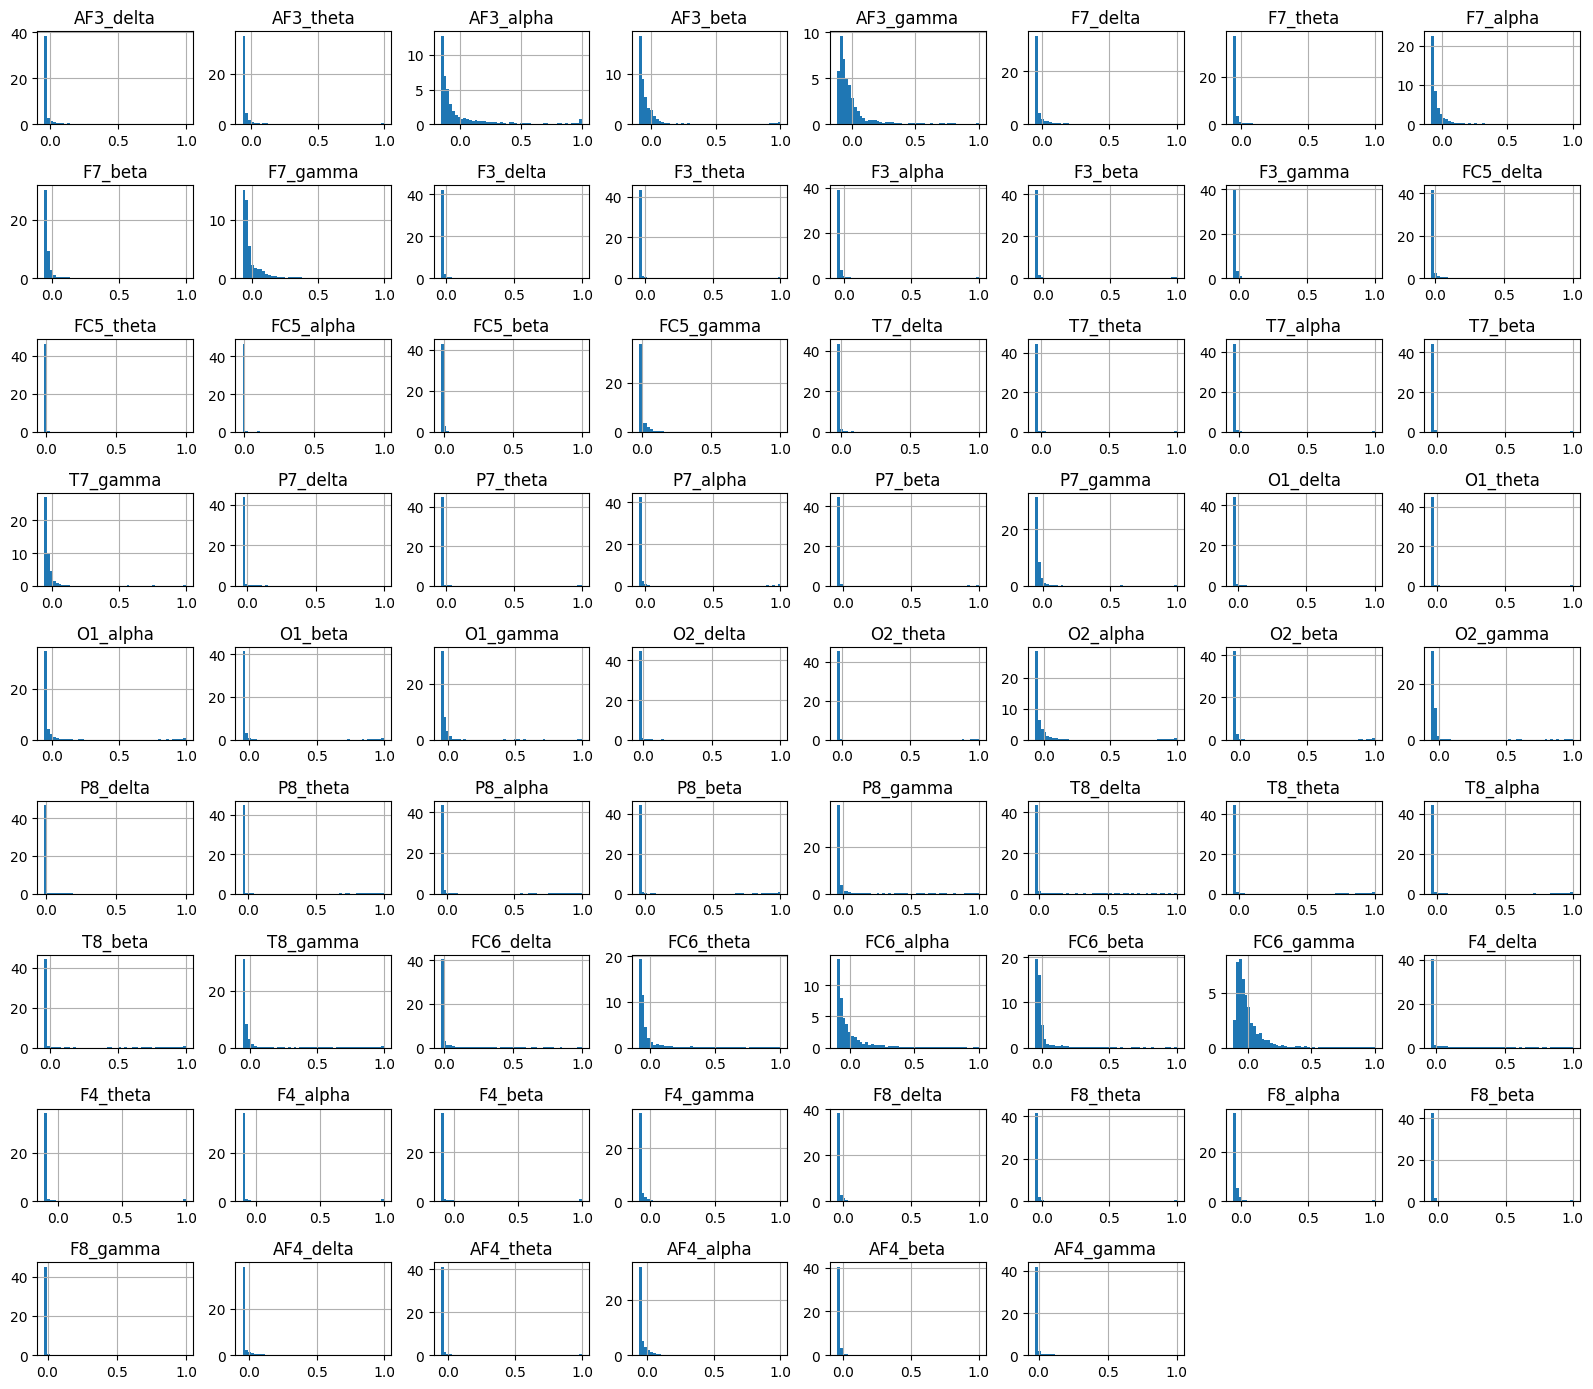

In [182]:
X_train_scaled_maxabs.hist(bins=50, density=True, figsize=(16, 14))
plt.tight_layout()
plt.show()

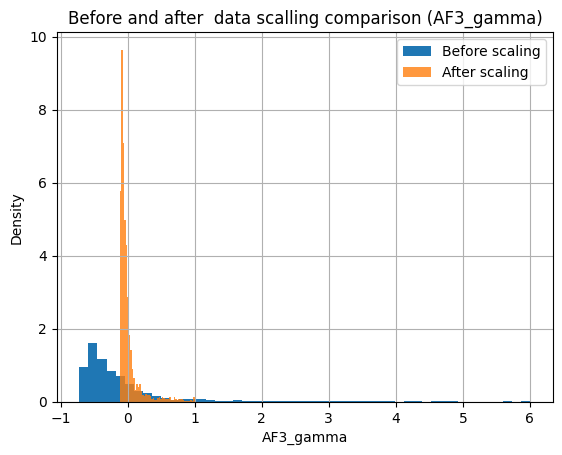

In [183]:
# check the data before and after: Histogram 
fig, ax = plt.subplots()
df['AF3_gamma'].hist(bins=50, density=True)
X_train_scaled_maxabs['AF3_gamma'].hist(bins=50, density=True, alpha=0.8)

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after  data scalling comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

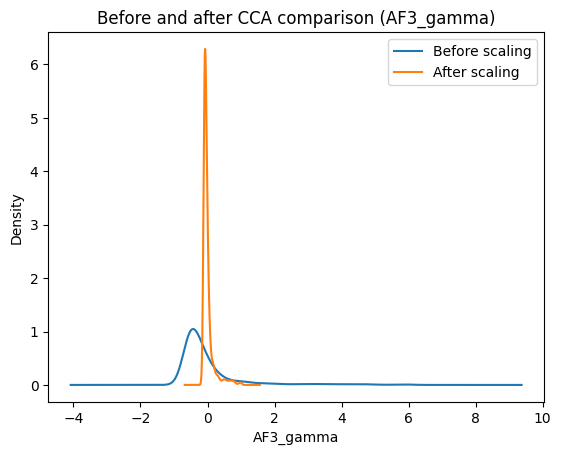

In [184]:
#check the data before and after: Density Plot 
fig, ax = plt.subplots()
df['AF3_gamma'].plot.density()
X_train_scaled_maxabs['AF3_gamma'].plot.density()

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after CCA comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

**StandardScaler**

<Axes: ylabel='Density'>

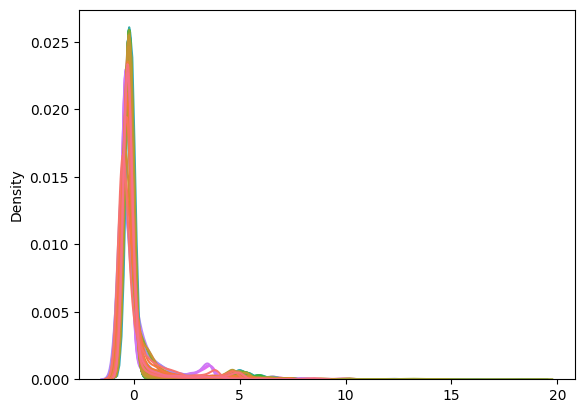

In [185]:
scaler_std = StandardScaler().fit(df.drop(["Class"],axis=1))

# transform data
X_train_scaled_std = scaler_std.transform(df.drop(["Class"],axis=1))

# put them in dataframe 
X_train_scaled_std = pd.DataFrame(X_train_scaled_std, columns=df.drop(["Class"],axis=1).columns)

# plot 
sns.kdeplot(X_train_scaled_std,legend=False)

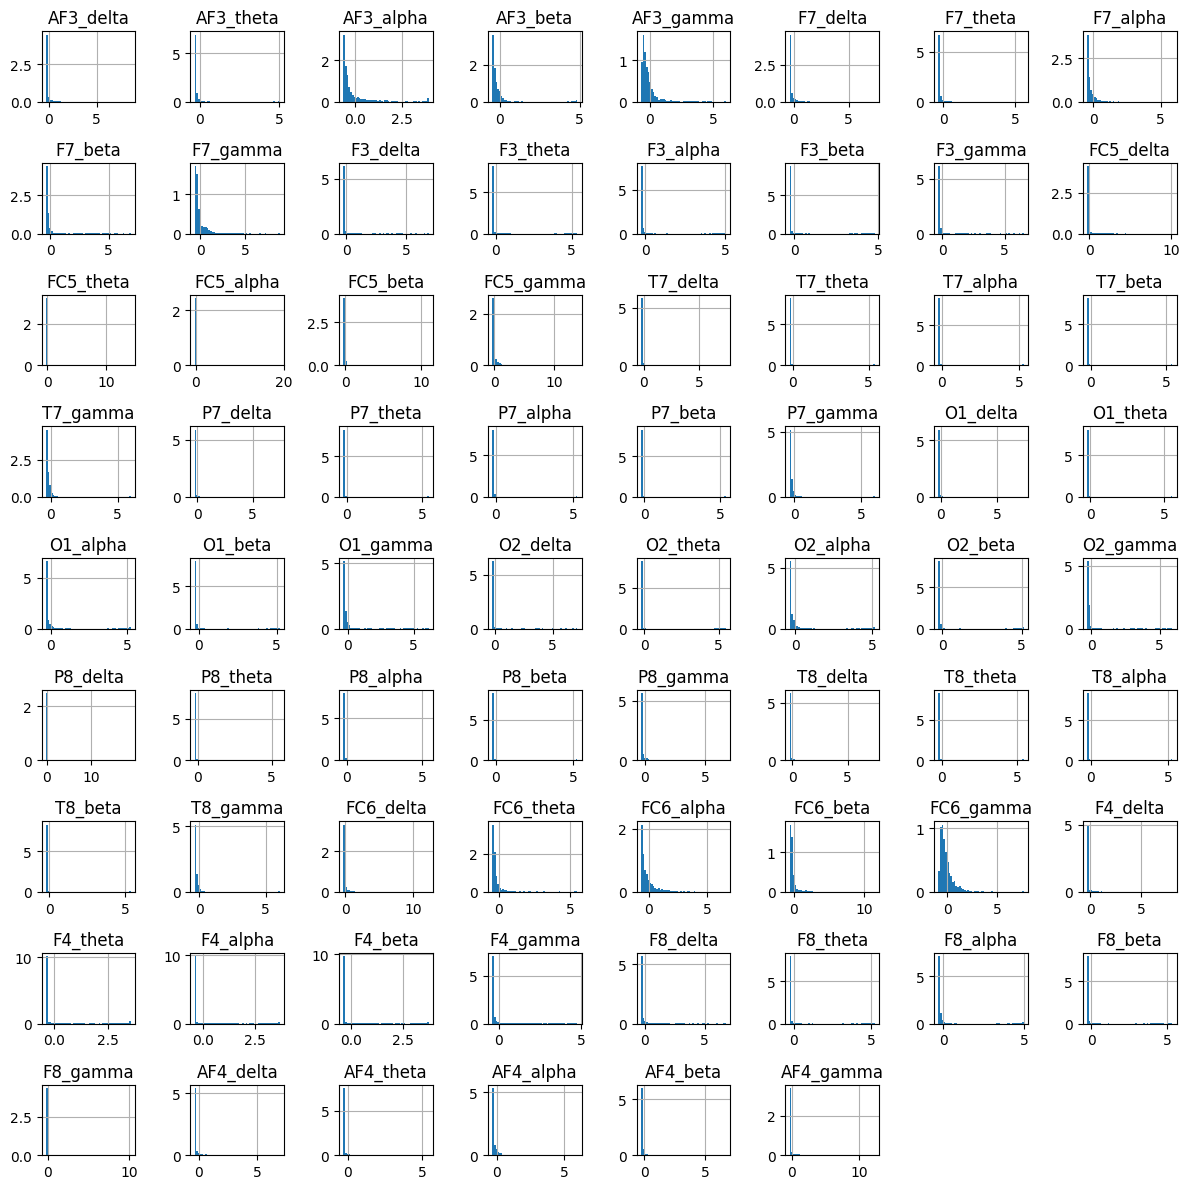

In [186]:
X_train_scaled_std.hist(bins=50, density=True, figsize=(12, 12))
plt.tight_layout()
plt.show()

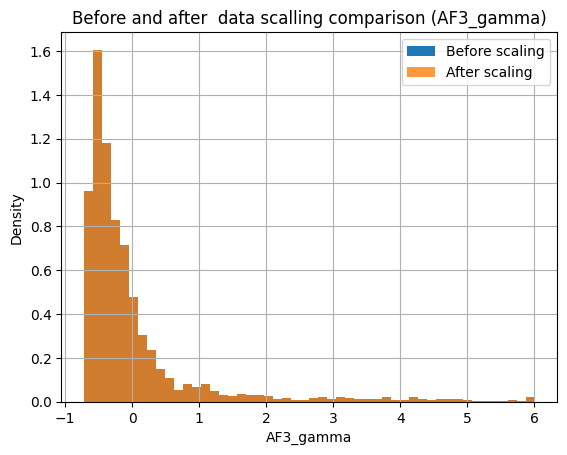

In [187]:
# check the data before and after: Histogram 
fig, ax = plt.subplots()
df['AF3_gamma'].hist(bins=50, density=True)
X_train_scaled_std['AF3_gamma'].hist(bins=50, density=True, alpha=0.8)

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after  data scalling comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()

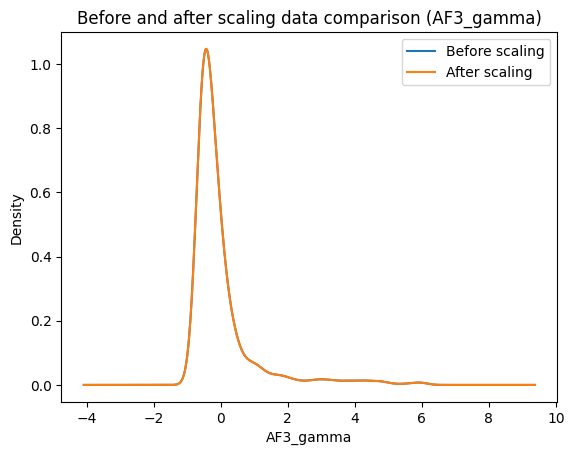

In [188]:
#check the data before and after: Density Plot 
fig, ax = plt.subplots()
df['AF3_gamma'].plot.density()
X_train_scaled_std['AF3_gamma'].plot.density()

ax.set_xlabel('AF3_gamma')
ax.set_ylabel('Density')
ax.set_title('Before and after scaling data comparison (AF3_gamma)')
ax.legend(['Before scaling', 'After scaling'])
plt.show()